# Analysis and visualization of the physio-chemical parameters
## 1. Library imports and setup

In [2]:
library(tidyverse)

In [3]:
Sys.setenv(LANGUAGE="en")
Sys.setlocale("LC_TIME", "English")

theme_set(theme_bw())

[1] "English_United States.1252"

#### Flag determining if plots are to be dumped in the form of files

In [4]:
#flag.make.plots <- TRUE
flag.make.plots <- FALSE

#### Determining the dpi and the image output path for publication high quality plots

In [5]:
dpi.opt <- 1000

In [6]:
IMG.path <- "../../IMG"

## 2. Import of the clean data

In [7]:
data.path <- "../../data"

file.name <- "df_chem_merged.rds"
df.chem.merged <- readRDS(paste0(data.path,"/",file.name))
head(df.chem.merged)

ix     date_time           ec      temp light  oxygen pH   water_level
1 7m_G-1 2021-08-12 08:00:00 31194.1 4.71  688.9 13.50  8.35 216.510    
2 7m_G-2 2021-08-12 08:30:00 31219.2 4.32  667.4 13.54  8.34 216.356    
3 7m_G-3 2021-08-12 08:59:59 31319.6 5.29  796.5 13.31  8.35 179.936    
4 7m_G-4 2021-08-12 09:30:00 31323.7 5.38 1097.9 13.21  8.36 180.658    
5 7m_G-5 2021-08-12 10:00:00 31246.3 4.95  602.8 13.34  8.35 181.589    
6 7m_G-6 2021-08-12 10:29:59 31267.2 5.50  699.7 13.21  8.36 182.965    
  chlorophyll.a chlorophyll.red ⋯ pH.upd light.upd salinity.upd sensor.depth
1 6             11              ⋯ NA     NA        NA           NA          
2 8             21              ⋯ NA     NA        NA           NA          
3 6             54              ⋯ NA     NA        NA           NA          
4 7             38              ⋯ NA     NA        NA           NA          
5 6             24              ⋯ NA     NA        NA           NA          
6 7             38              ⋯ NA     NA        NA           NA          
  depth kelp  site m.yr.factor w.yr.factor water.depth
1 7 [m] FALSE GF   Aug21       W32-21            NA   
2 7 [m] FALSE GF   Aug21       W32-21            NA   
3 7 [m] FALSE GF   Aug21       W32-21      8.068685   
4 7 [m] FALSE GF   Aug21       W32-21      8.140133   
5 7 [m] FALSE GF   Aug21       W32-21      8.232264   
6 7 [m] FALSE GF   Aug21       W32-21      8.368431

## 3. Theme and colouring setup

In [8]:
site.color <- c(`GF`='#E41A1C', `H`='#FF7F00', `S1`="blue" , `S2`='#377EB8')

In [9]:
axis.text.size <- 17
axis.title.size <- 18
strip.text.size <- 20
legend.title.size <- axis.title.size
legend.text.size <- axis.text.size

In [10]:
time_series_theme <- theme(panel.grid.minor.x = element_blank(), 
      panel.grid.major.x = element_blank(),
      
      axis.text = element_text(size=18),
      axis.title = element_text(size = 19),
      
      strip.text=element_text(size=20),
      legend.position="none")

In [11]:
hist_theme <- theme(legend.position = "none",
      panel.grid.minor.x = element_blank(), 
      panel.grid.major.x = element_blank(),
      axis.text = element_text(size=18),
      axis.title = element_text(size = 19),
      strip.text=element_text(size=20))

In [12]:
boxplot_theme <- theme(axis.title = element_text(size=22),
                 axis.text = element_text(size=20),
                 strip.text=element_text(size=23),
                 panel.grid.minor.x = element_blank(),
                 panel.grid.major.x = element_blank(),
                 legend.position="right",
                 legend.key.size = unit(1.2, 'cm'),
                 legend.title = element_text(size=18), 
                 legend.text = element_text(size=17))

#### Determinaion of the month ranges for proper display of the boxplots

In [13]:
#levels(df.chem.merged$m.yr.factor)
c1 <- df.chem.merged$m.yr.factor >= 'Jul21' & df.chem.merged$m.yr.factor <= 'Mar22'
lev.m.yr.f <- levels(df.chem.merged$m.yr.factor)
lev.c1 <- lev.m.yr.f[ match('Jul21',lev.m.yr.f):match('Mar22',lev.m.yr.f)]

c2 <- df.chem.merged$m.yr.factor >=  'Apr22' & df.chem.merged$m.yr.factor <= 'Dec22'
lev.m.yr.f <- factor(levels(df.chem.merged$m.yr.factor),ordered=TRUE)
lev.c2 <-  lev.m.yr.f[ match('Apr22',lev.m.yr.f):match('Dec22',lev.m.yr.f)]

c3 <- df.chem.merged$m.yr.factor >=  'Jan23' & df.chem.merged$m.yr.factor <= 'Aug23'
lev.m.yr.f <- levels(df.chem.merged$m.yr.factor)
lev.c3 <-  lev.m.yr.f[ match( 'Jan23',lev.m.yr.f):match('Aug23',lev.m.yr.f)]

### EC

In [14]:
feat.label <- "electrical conductivity [μS/cm]"
feat <- "ec"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 1148 rows containing non-finite outside the scale range (`stat_bin()`)."


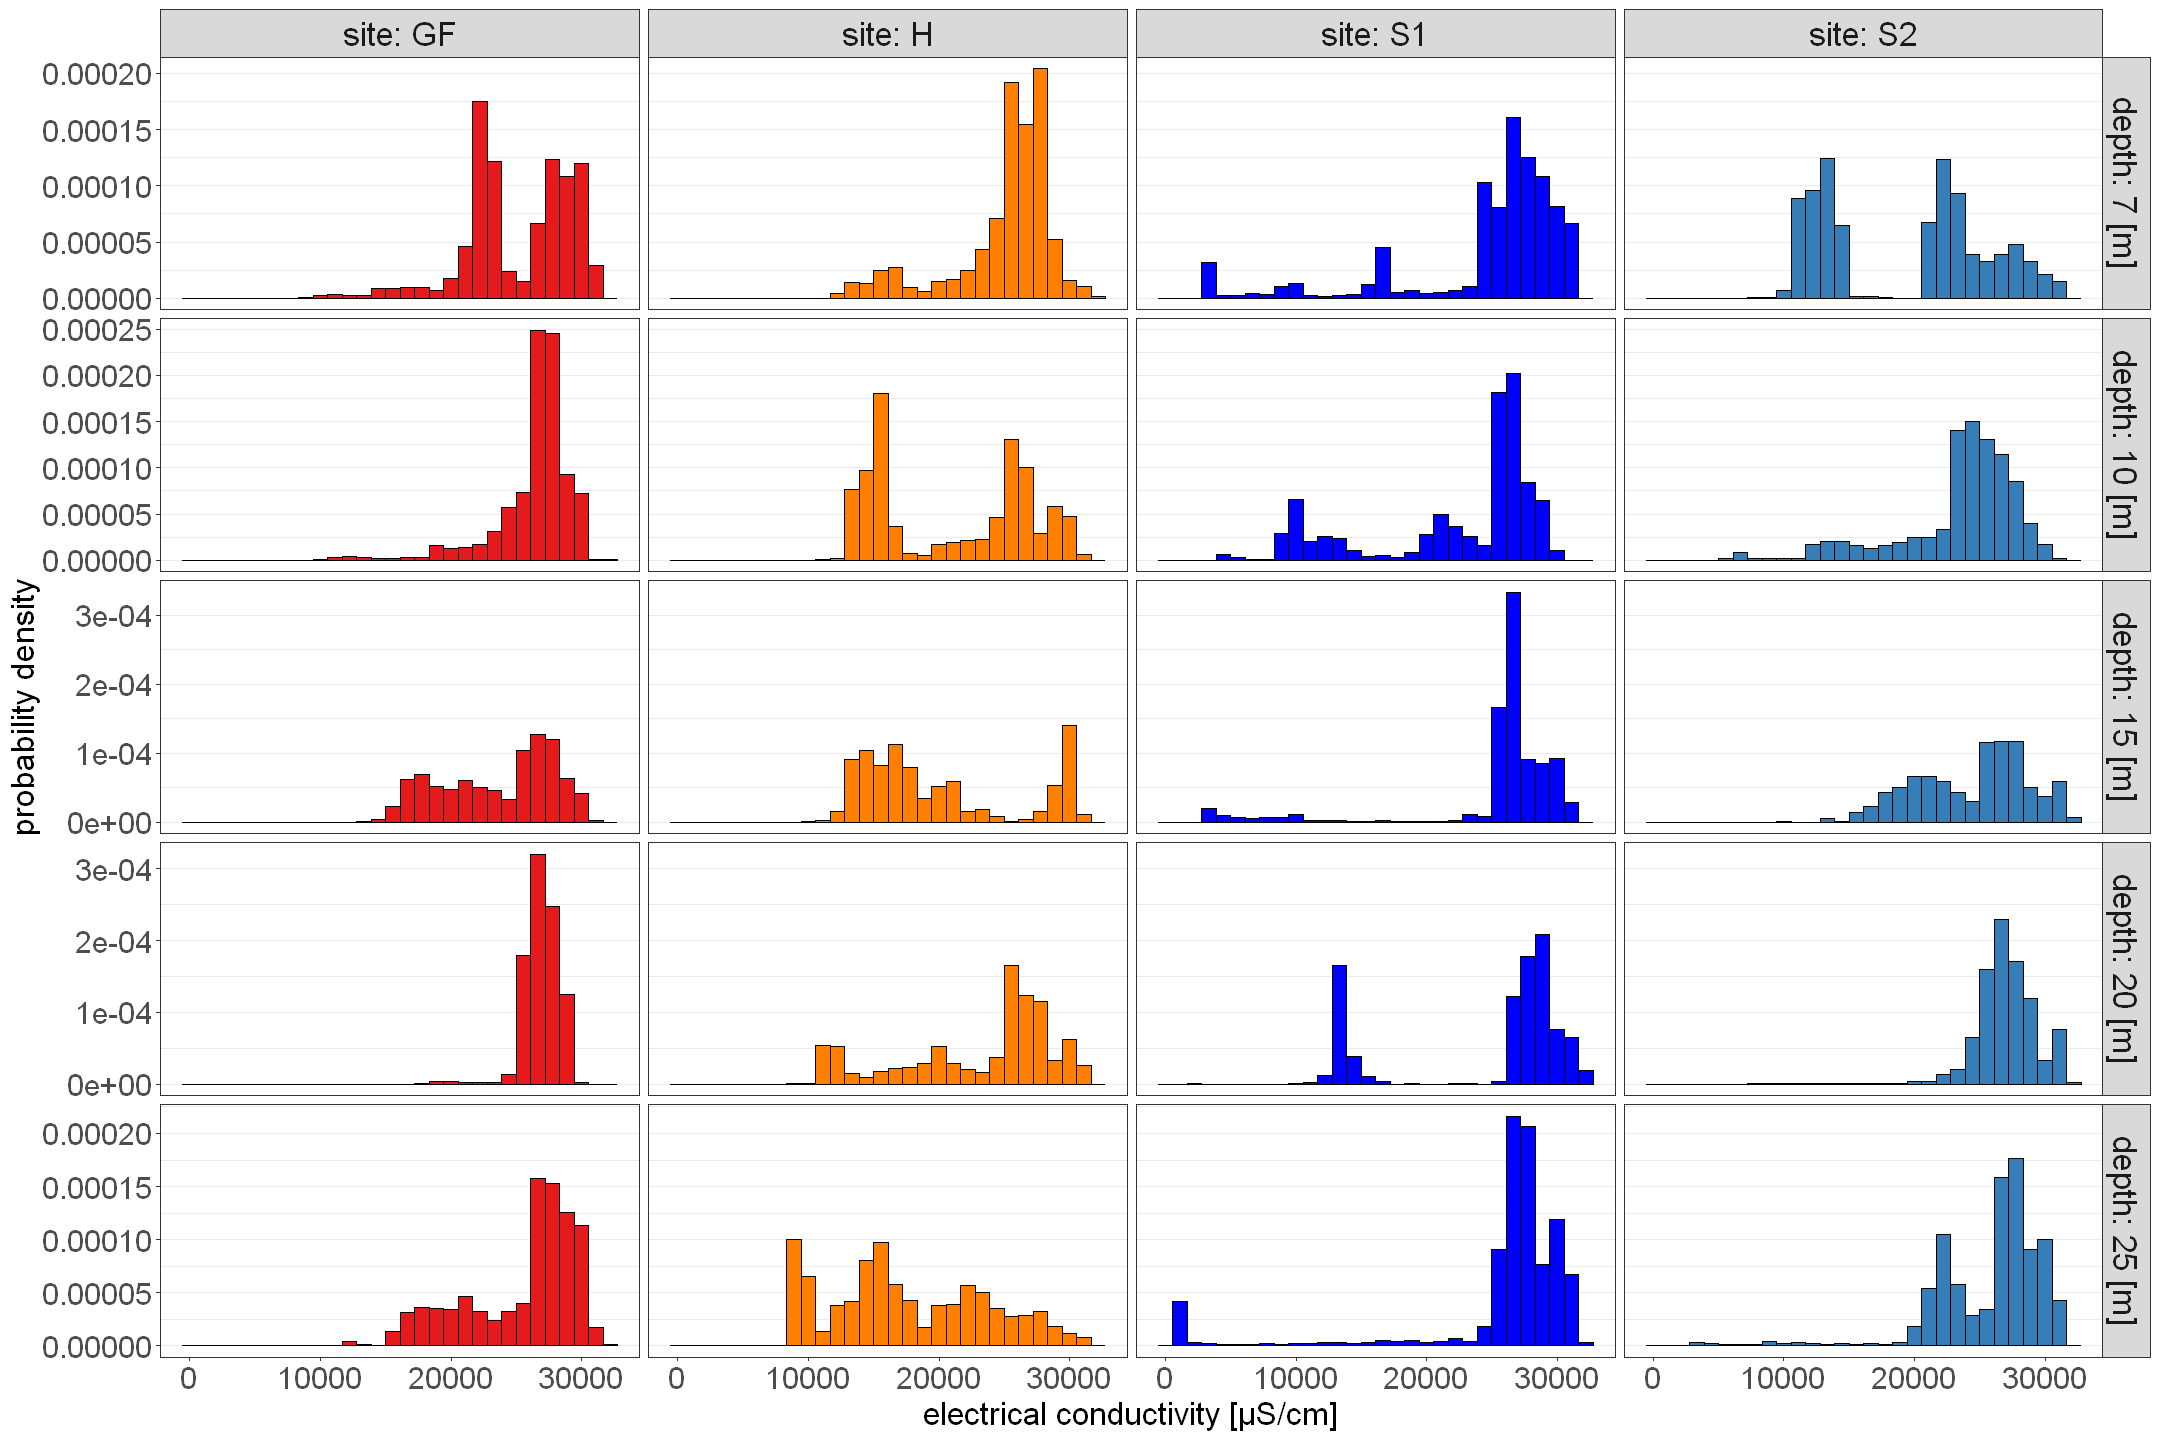

In [15]:
options(repr.plot.width=18,repr.plot.height=12)

ggplot(df.chem.merged ,aes(x=get(feat),y=after_stat(density),fill=site)) + geom_histogram(show.legend = FALSE,col="black") + 
facet_grid(depth~site,labeller = label_both,scale="free_y") +
scale_fill_manual(values=site.color) +
xlab(feat.label) + ylab("probability density")  +
hist_theme

if (flag.make.plots) {
    ggsave(paste0(IMG.path,"/hist/",feat,"_hist.tiff"),height = 12, width = 18,dpi = dpi.opt,compression = "lzw") # TIFF
    ggsave(paste0(IMG.path,"/hist/small/",feat,"_hist.jpg"),height = 12, width = 18,dpi = 150) # JPG
    #ggsave(paste0("../../graphical_abstract/",feat,"_hist.svg"),height = 12, width = 18) 
}

`summarise()` has grouped output by 'day', 'site'. You can override using the
`.groups` argument.
Warning message:
"Removed 1148 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 20 rows containing missing values or values outside the scale range
(`geom_point()`)."


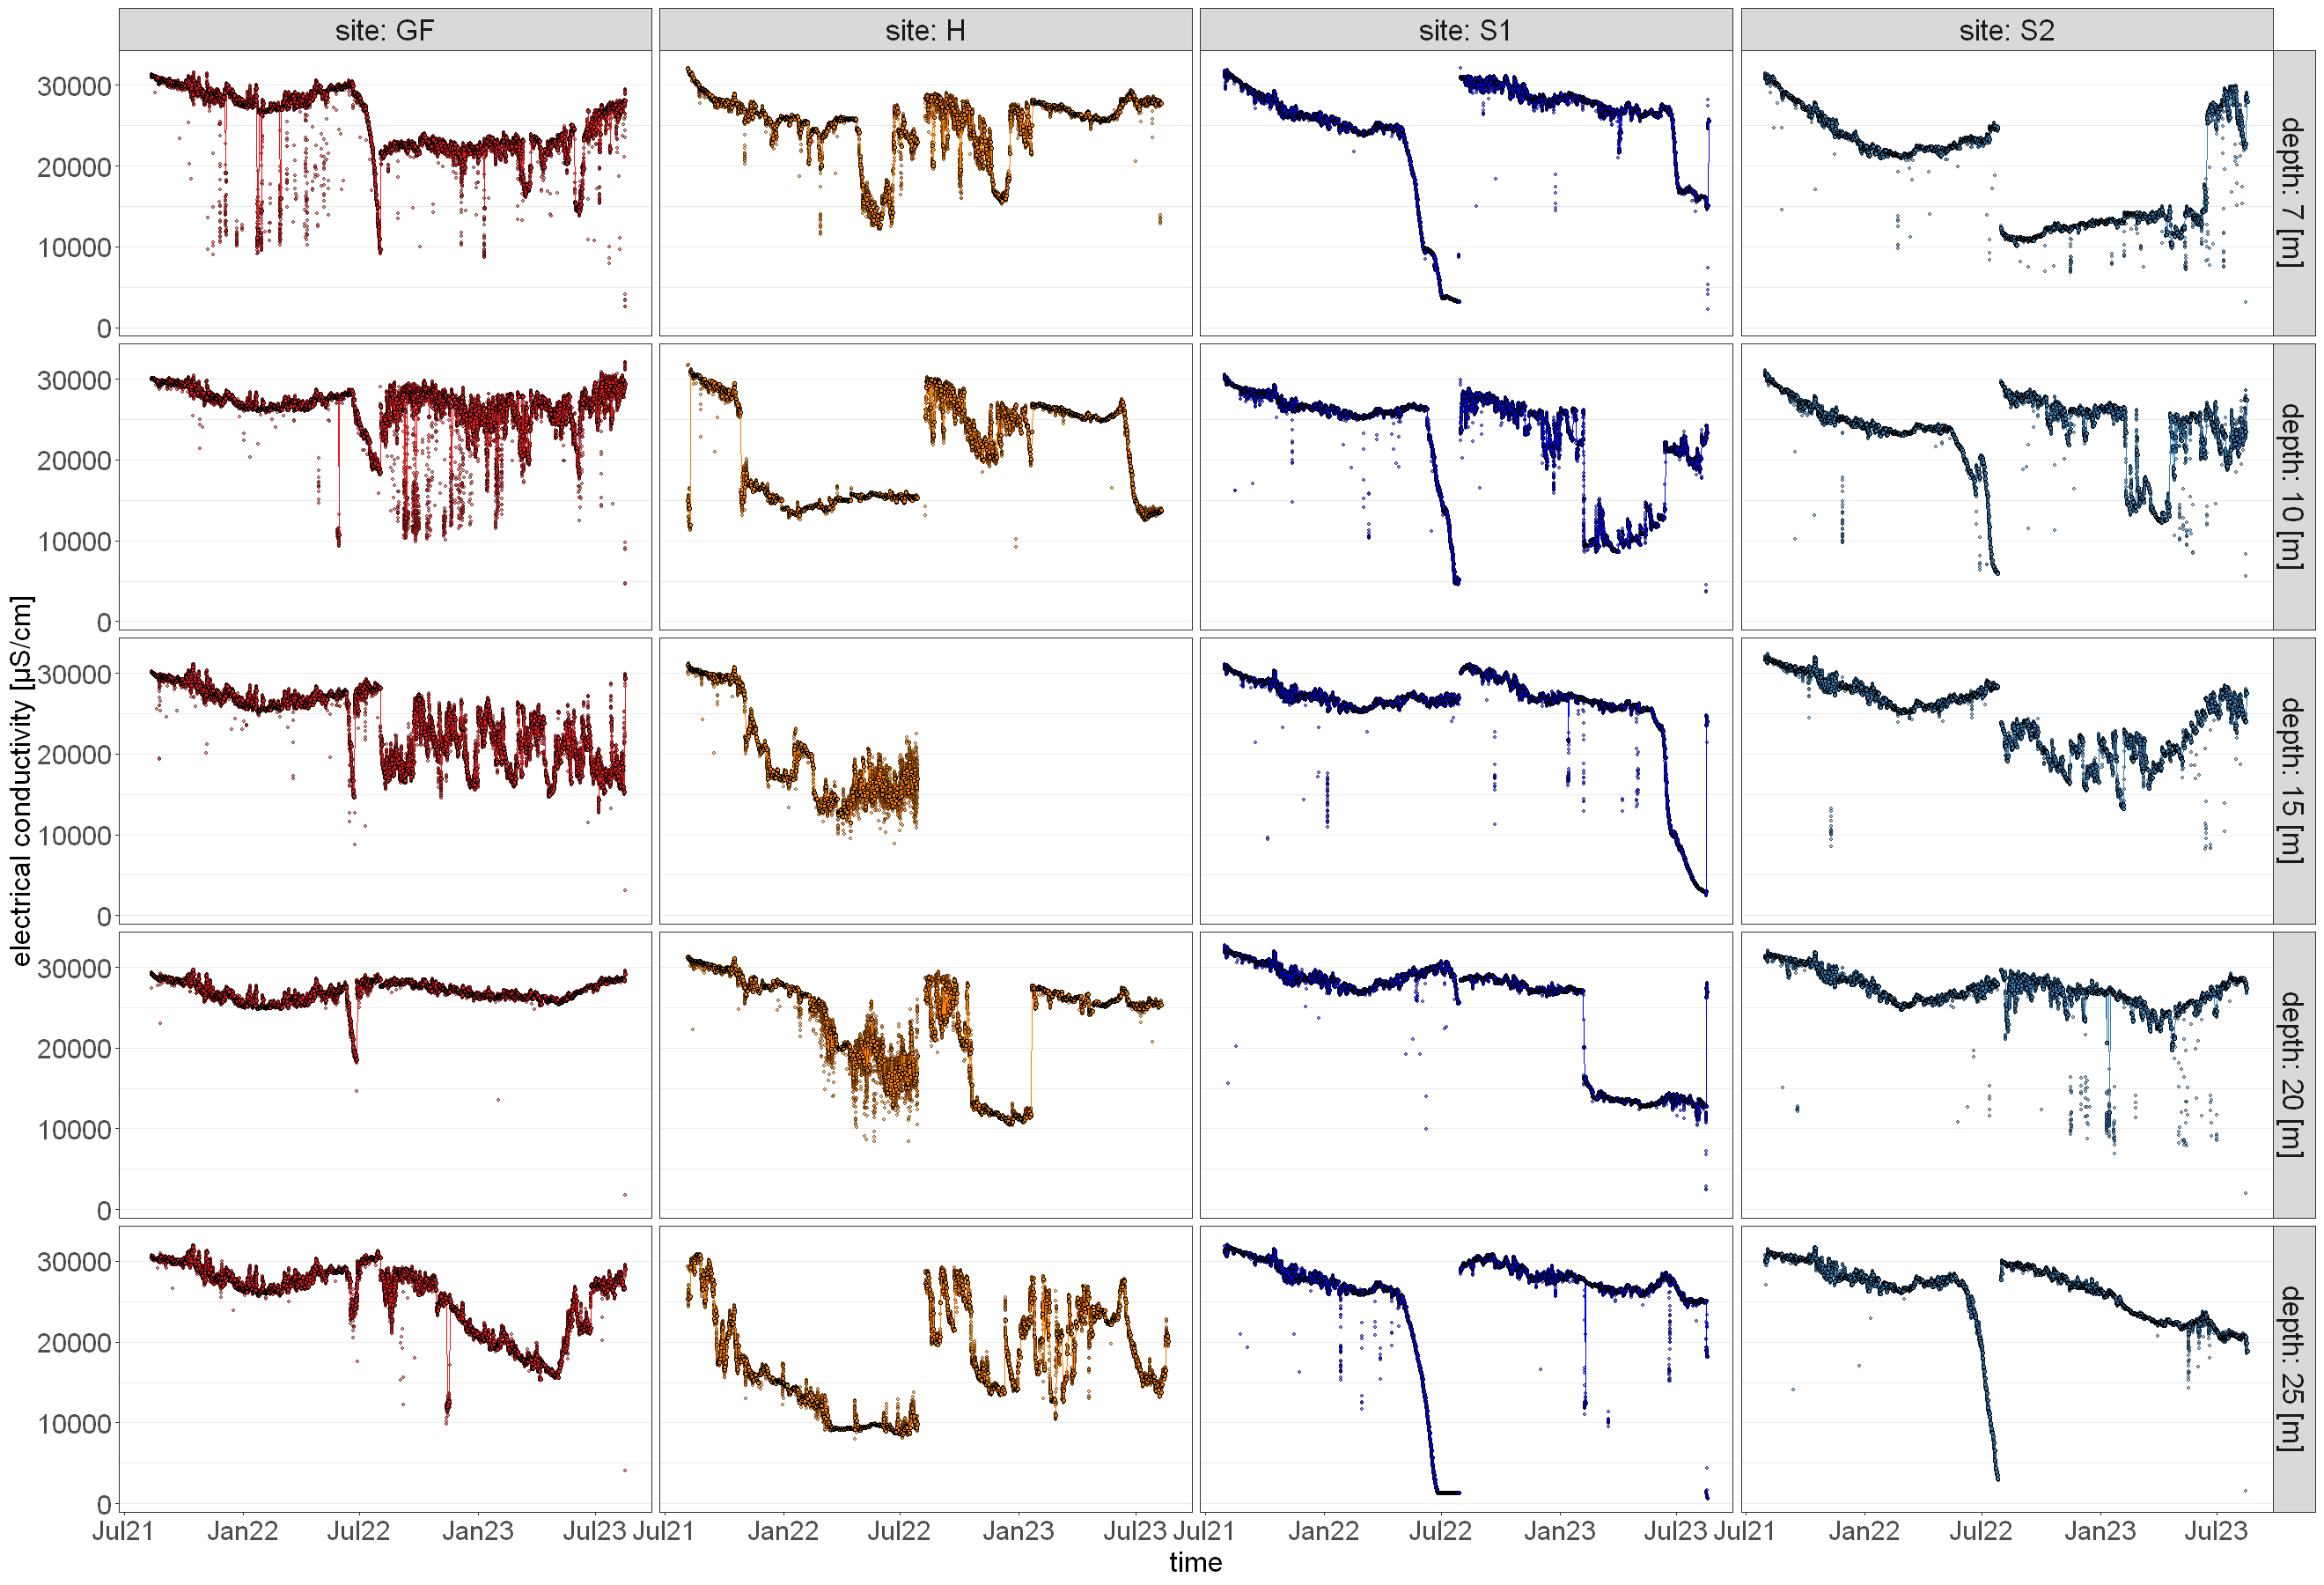

In [16]:
options(repr.plot.height=15,repr.plot.width=22)

df.days <- df.chem.merged %>% 
group_by(day=floor_date(date_time,unit="day"),site,depth) %>% 
summarize(means=mean(get(feat),na.rm = TRUE),medians=median(get(feat),na.rm = TRUE))

ggplot() +
geom_point(aes(x=date_time,y=get(feat),fill=site),data=df.chem.merged,alpha=0.5,shape=21,size=0.7) + 
geom_line(aes(x=day+ddays(0.5),y=medians,col=site),data=df.days,linewidth=0.5) + 
scale_color_manual(values=site.color) +
geom_point(aes(x=day+ddays(0.5),y=medians,fill=site),data=df.days,size=1.2,shape=21)+
scale_fill_manual(values=site.color) +
ylab(feat.label)+ xlab("time") +facet_grid(depth~site,labeller = label_both) + #,scales = "free" 
scale_x_datetime(date_labels = "%b%y") +
time_series_theme

if (flag.make.plots) {
     ggsave(paste0(IMG.path,"/time_series/",feat,"_time_series_grid.tiff"),height = 12, width = 20,dpi = dpi.opt,compression = "lzw") # TIFF
     ggsave(paste0(IMG.path,"/time_series/small/",feat,"_time_series_grid.jpg"),height = 12, width = 20,dpi = 150) # JPG
}

Warning message:
"Removed 40 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 1033 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


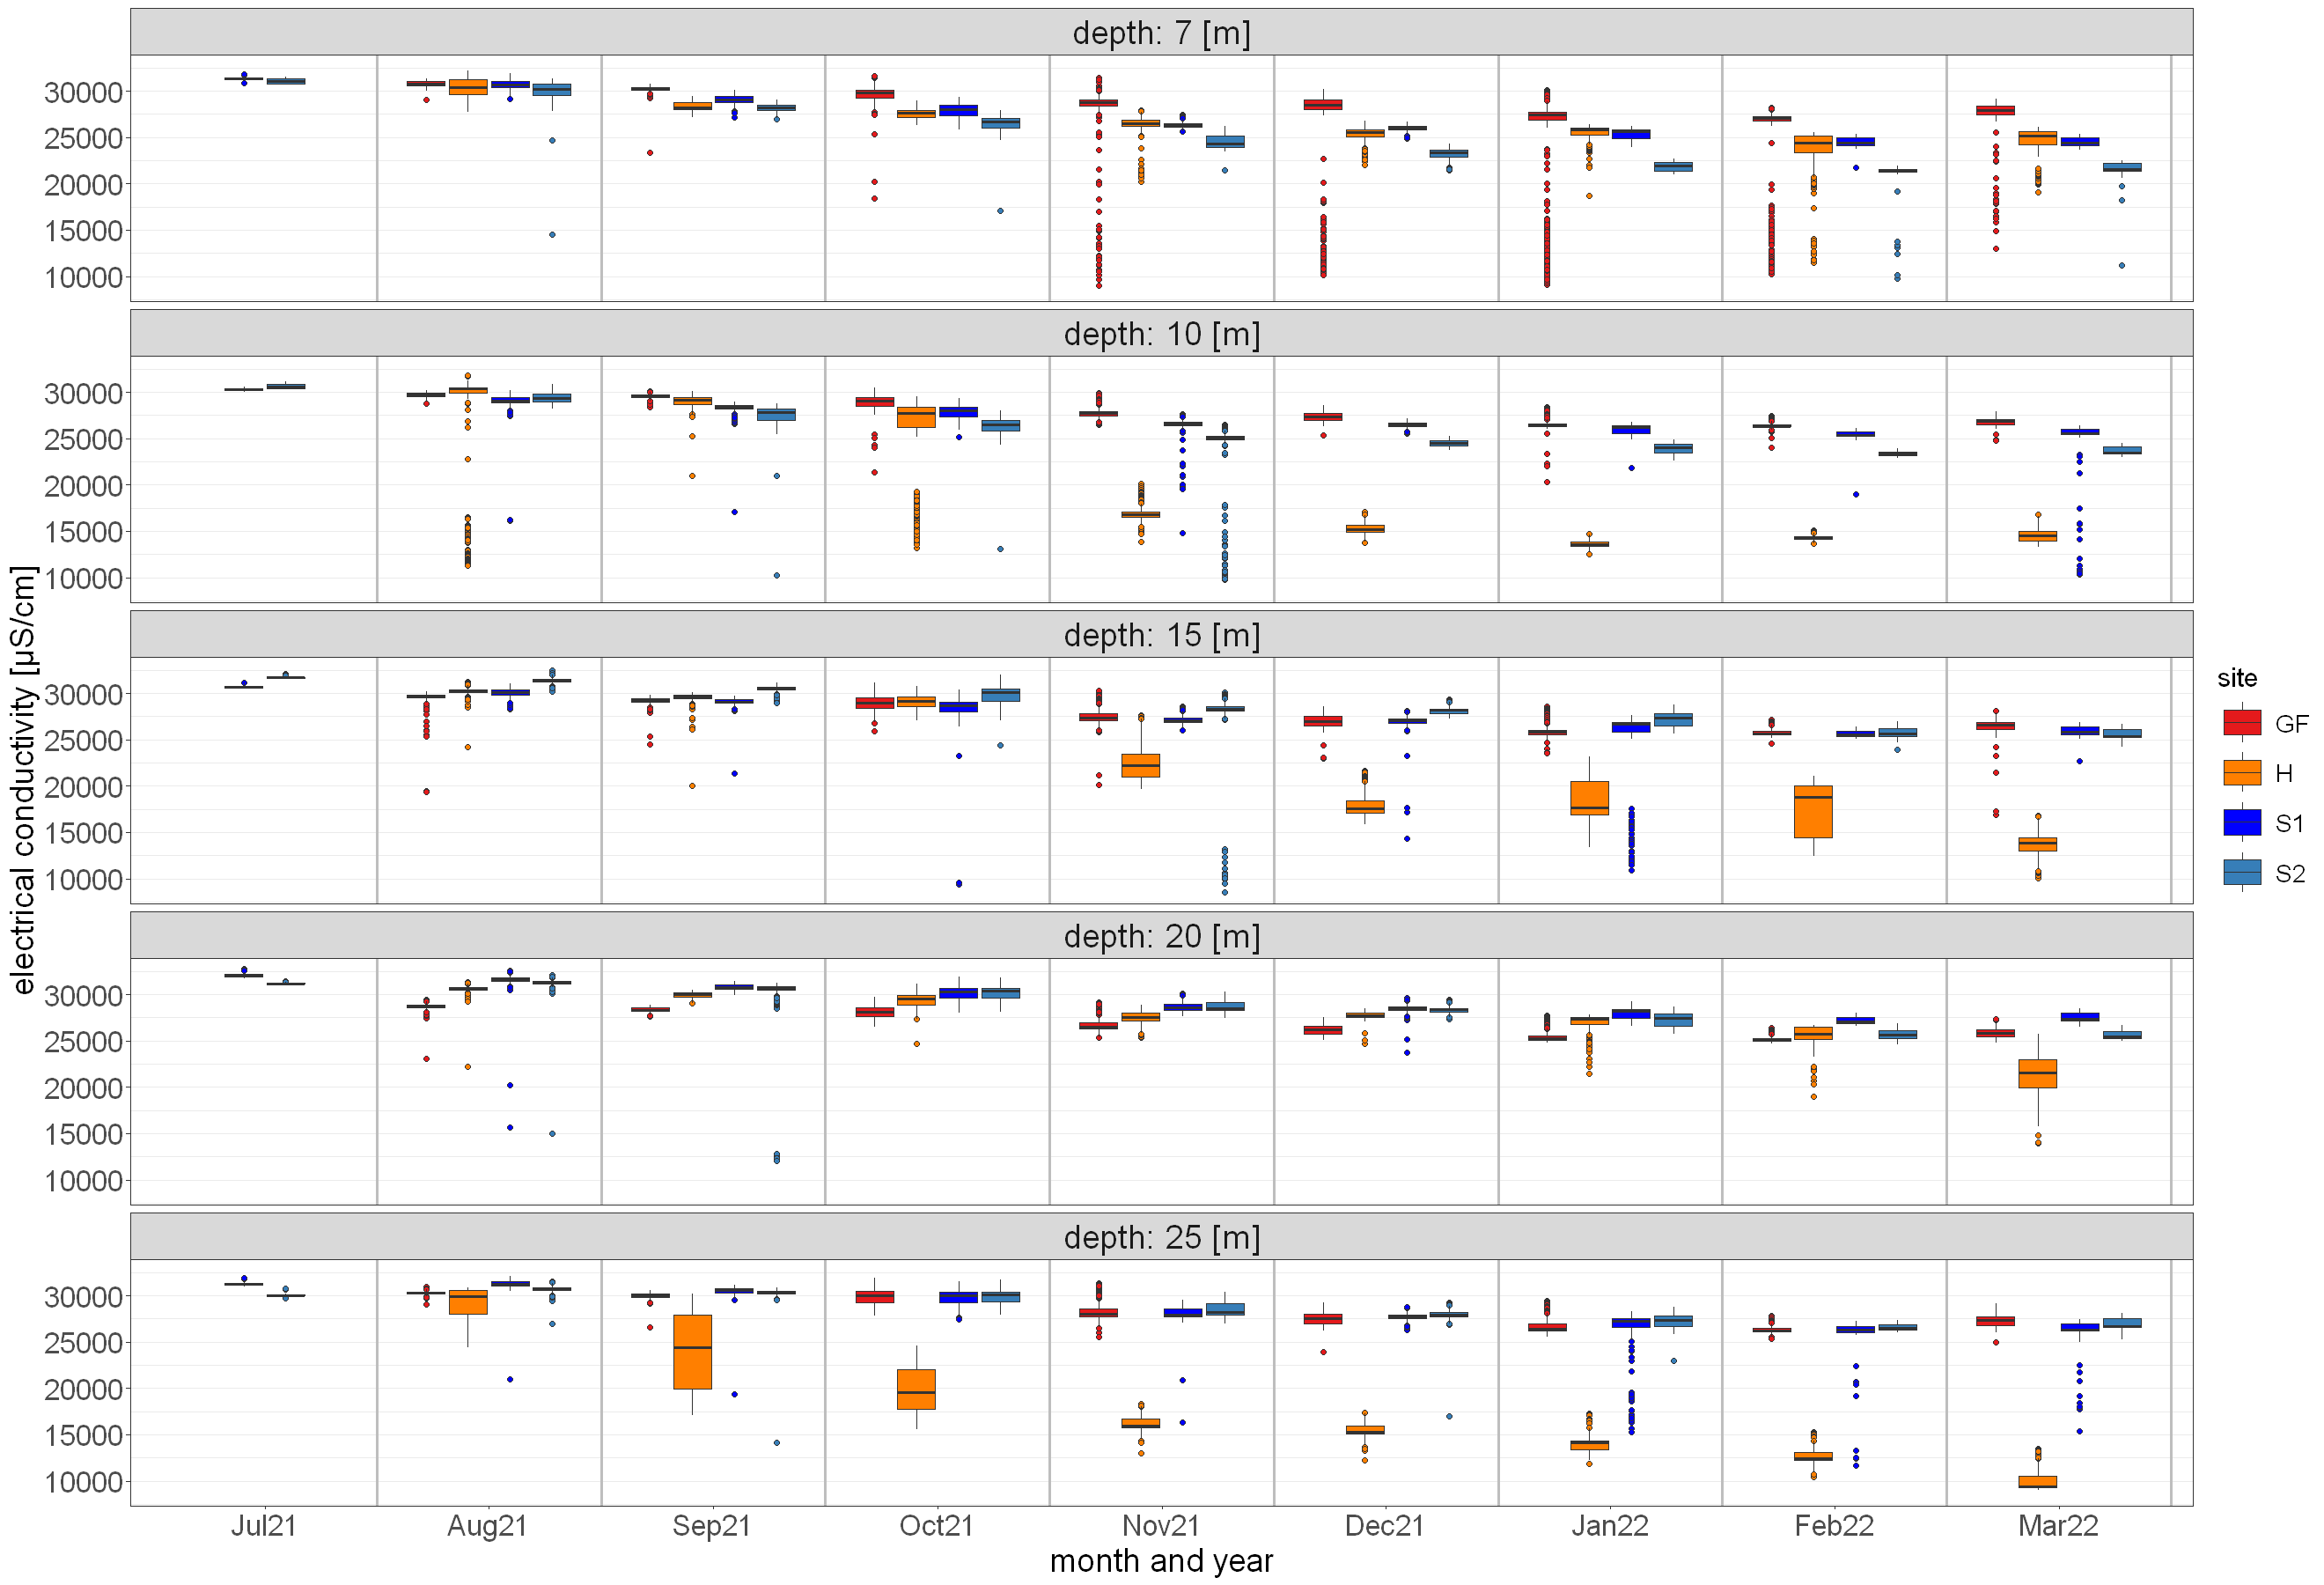

Warning message:
"Removed 75 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


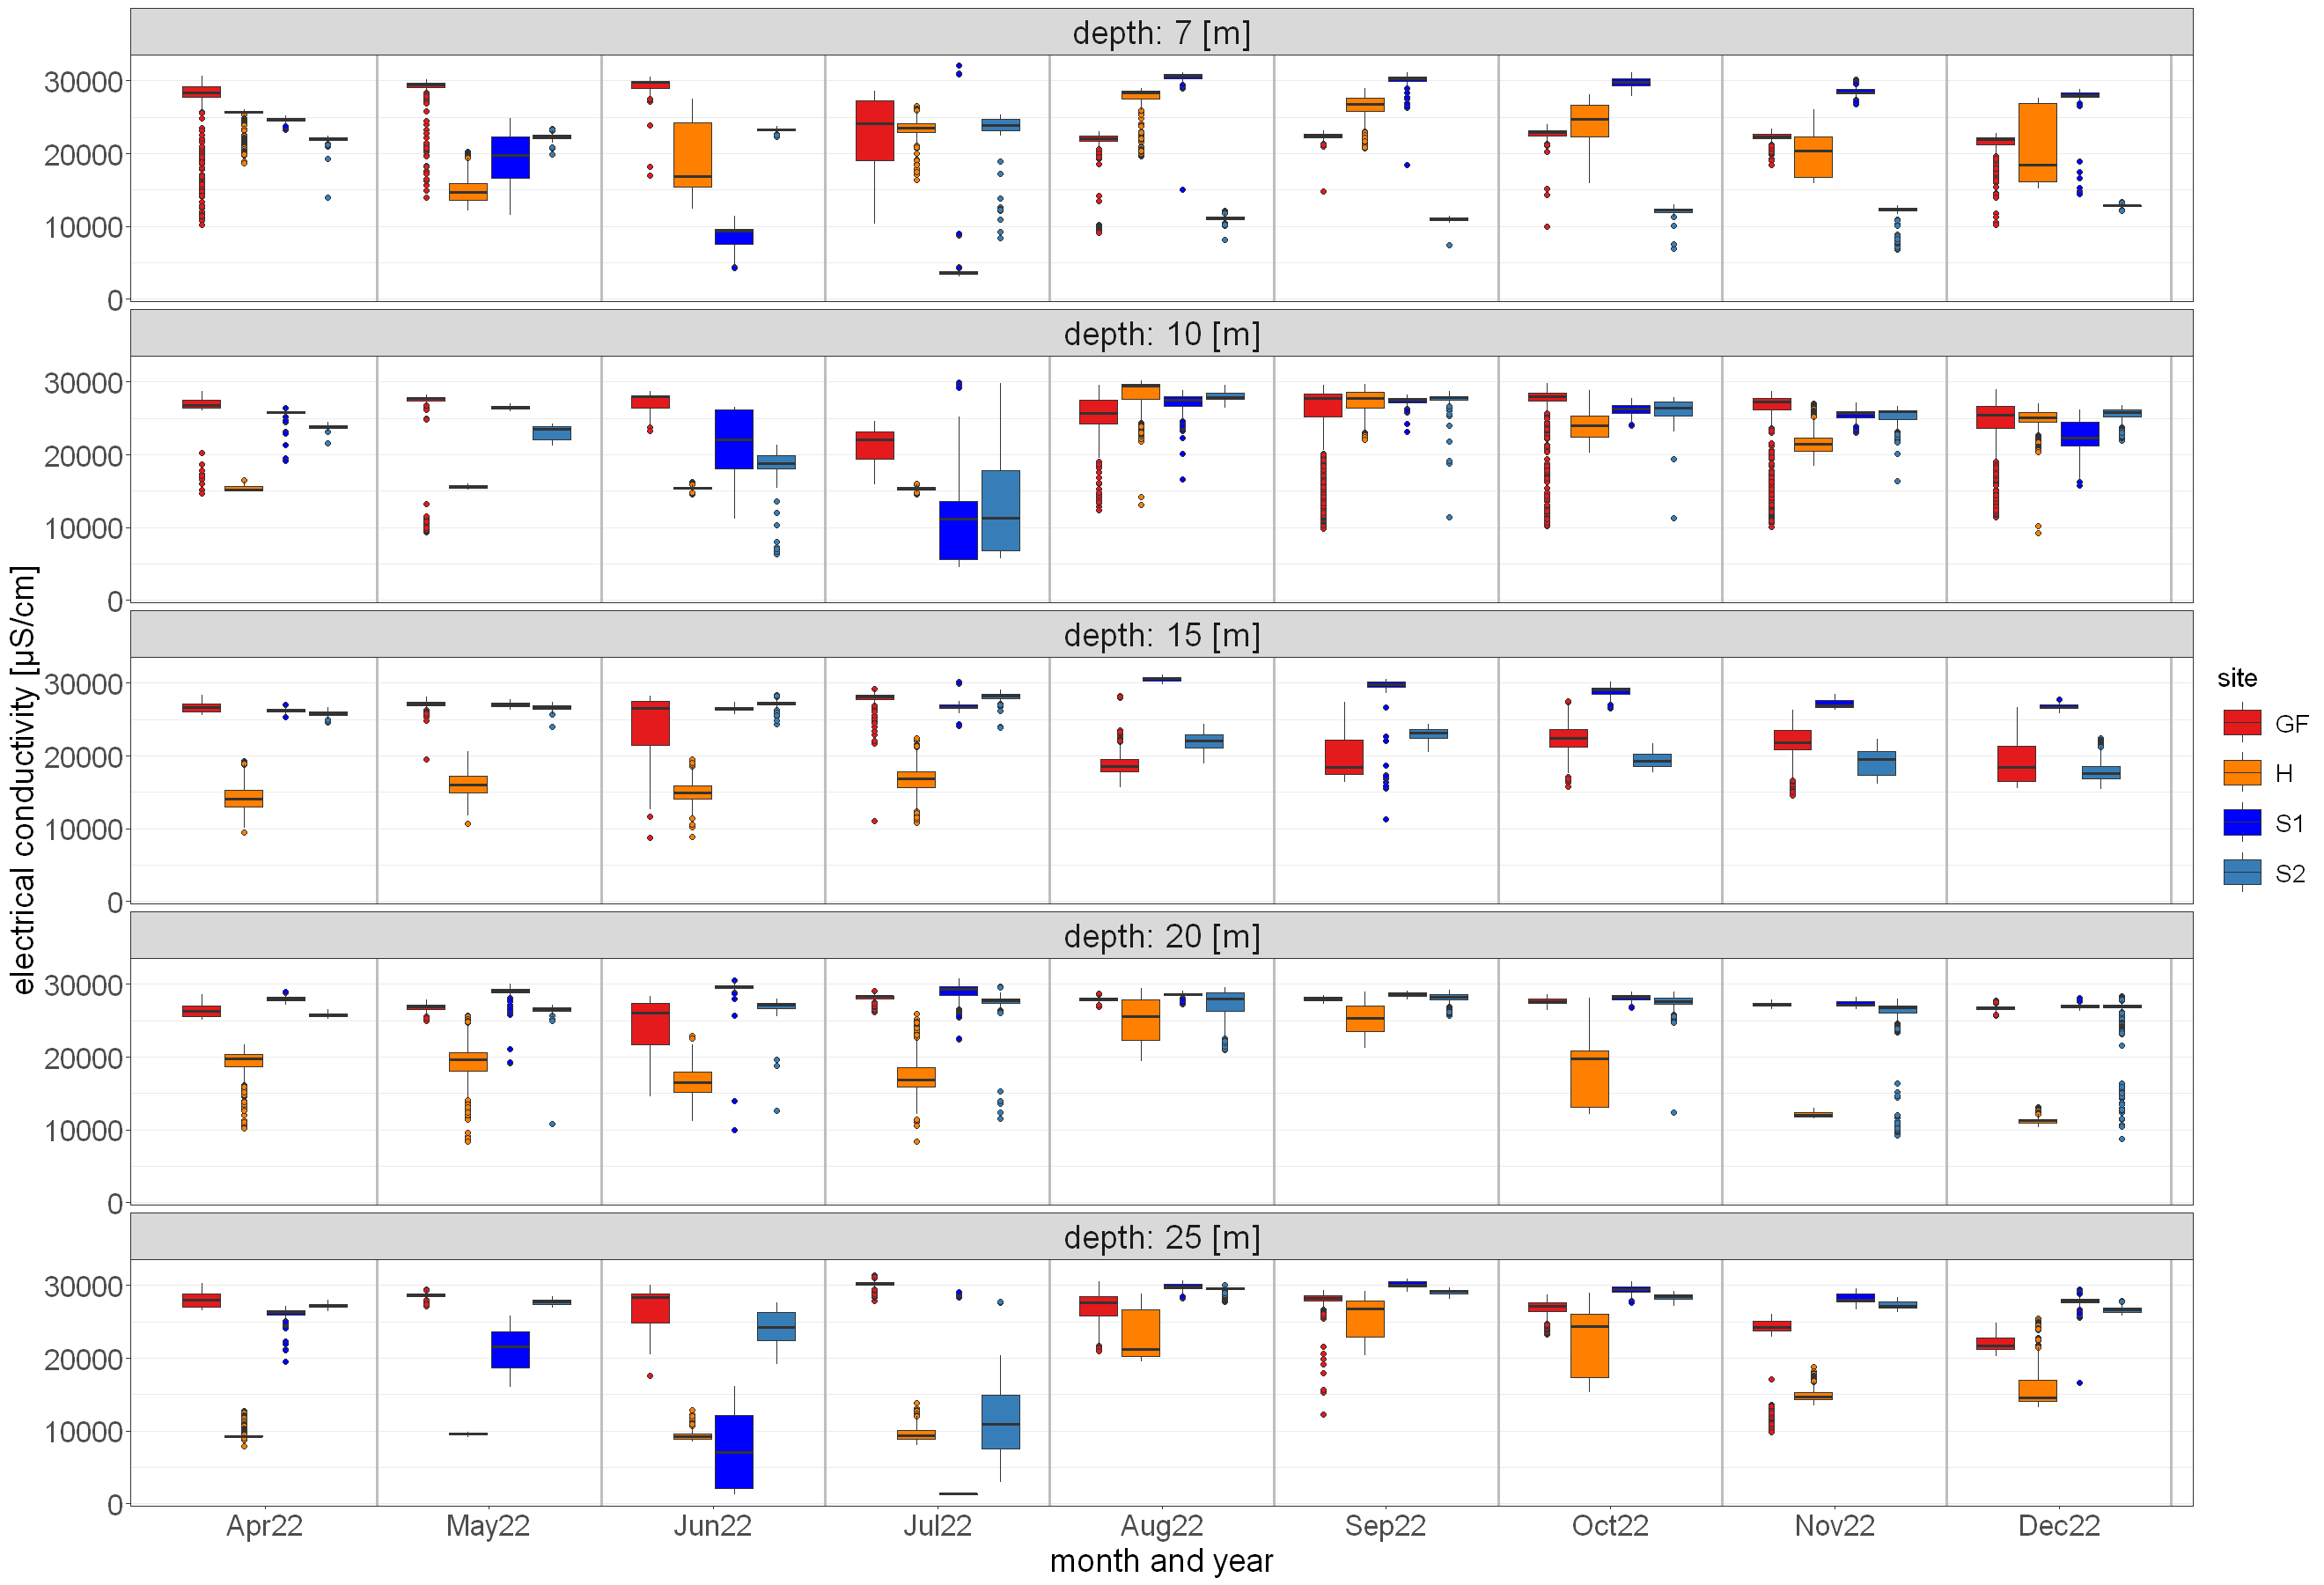

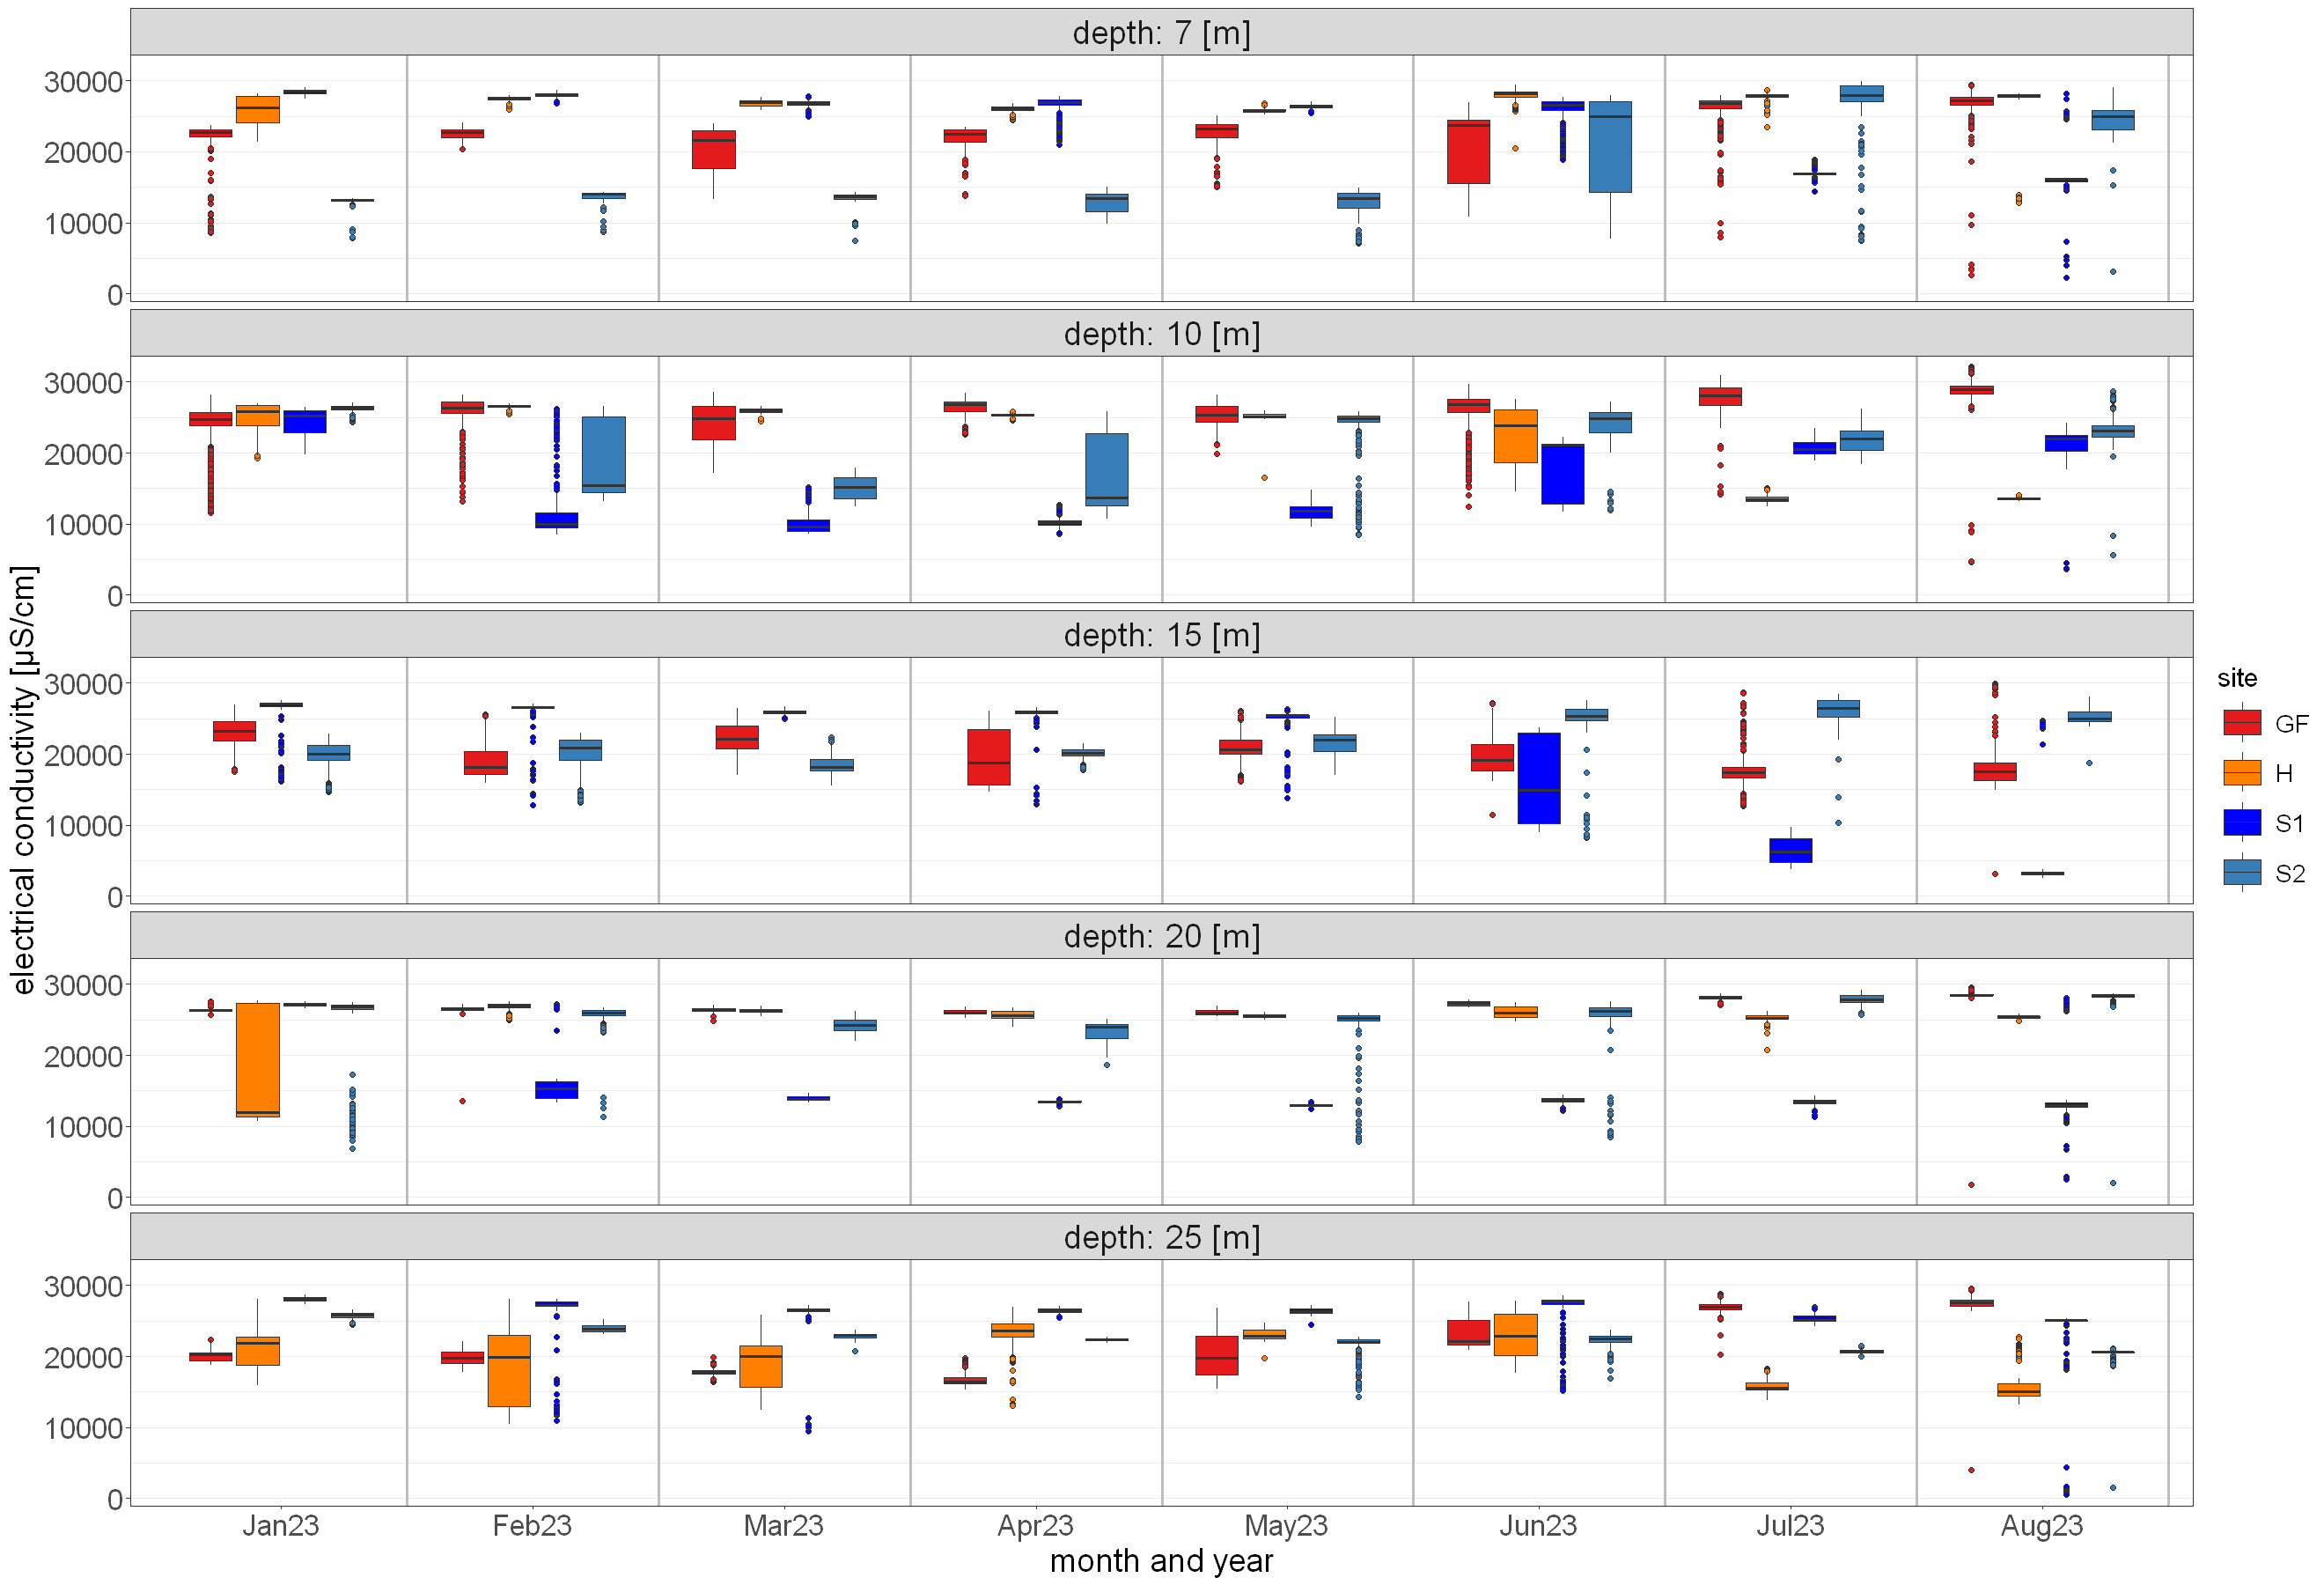

In [17]:
options(repr.plot.height=15,repr.plot.width=22)


tmp.df <- df.chem.merged %>% filter(c1)
tmp.df$m.yr.factor.tmp <- factor(tmp.df$m.yr.factor,levels = lev.c1, ordered = TRUE)
ggplot(tmp.df,
       aes(x=m.yr.factor.tmp,y=get(feat),fill=site)) + geom_boxplot(position = position_dodge2(preserve = "single"),outlier.shape = 21) +            
           scale_fill_manual(values=site.color) +
           facet_wrap(~depth,labeller = label_both,ncol=1) +
# labels set-up
           xlab("month and year") + ylab(feat.label) + scale_x_discrete(drop = FALSE)+
# viz adjustments
           geom_vline(xintercept=seq(1.5, length(levels(tmp.df$w.yr.factor))-0.5, 1),lwd=1, colour="gray") +
           boxplot_theme

if (flag.make.plots) {
    bp.fig <- 1 
    ggsave(paste0(IMG.path,"/boxplots/",feat,"_boxplots",bp.fig,".tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/boxplots/small/",feat,"_boxplots",bp.fig,".jpg"),height = 15, width = 22,dpi = 150)
}


tmp.df <- df.chem.merged %>% filter(c2)
tmp.df$m.yr.factor.tmp <- factor(tmp.df$m.yr.factor,levels = lev.c2, ordered = TRUE)
ggplot(tmp.df ,
       aes(x=m.yr.factor.tmp,y=get(feat),fill=site)) + geom_boxplot(position = position_dodge2(preserve = "single"),outlier.shape = 21) +            
           scale_fill_manual(values=site.color) +
           facet_wrap(~depth,labeller = label_both,ncol=1) + 
# labels set-up
           xlab("month and year") + ylab(feat.label) + scale_x_discrete(drop = FALSE)+
# viz adjustments
           geom_vline(xintercept=seq(1.5, length(levels(tmp.df$w.yr.factor))-0.5, 1),lwd=1, colour="gray") +
           boxplot_theme

if (flag.make.plots) {
    bp.fig <- 2 
    ggsave(paste0(IMG.path,"/boxplots/",feat,"_boxplots",bp.fig,".tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/boxplots/small/",feat,"_boxplots",bp.fig,".jpg"),height = 15, width = 22,dpi = 150)
}

tmp.df <- df.chem.merged %>% filter(c3)
tmp.df$m.yr.factor.tmp <- factor(tmp.df$m.yr.factor,levels = lev.c3, ordered = TRUE)
ggplot(tmp.df,
       aes(x=m.yr.factor.tmp,y=get(feat),fill=site)) + geom_boxplot(position = position_dodge2(preserve = "single"),outlier.shape = 21) +            
           scale_fill_manual(values=site.color) +
           facet_wrap(~depth,labeller = label_both,ncol=1) + 
# labels set-up
           xlab("month and year") + ylab(feat.label) + scale_x_discrete(drop = FALSE)+
# viz adjustments
           geom_vline(xintercept=seq(1.5, length(levels(tmp.df$w.yr.factor))-0.5, 1),lwd=1, colour="gray") +
           boxplot_theme

if (flag.make.plots) {
    bp.fig <- 3 
    ggsave(paste0(IMG.path,"/boxplots/",feat,"_boxplots",bp.fig,".tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/boxplots/small/",feat,"_boxplots",bp.fig,".jpg"),height = 15, width = 22,dpi = 150)
}

### pH

In [18]:
feat.label <- "pH [-]"
feat <- "pH"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 237896 rows containing non-finite outside the scale range
(`stat_bin()`)."
Warning message:
"Removed 40 rows containing missing values or values outside the scale range
(`geom_bar()`)."


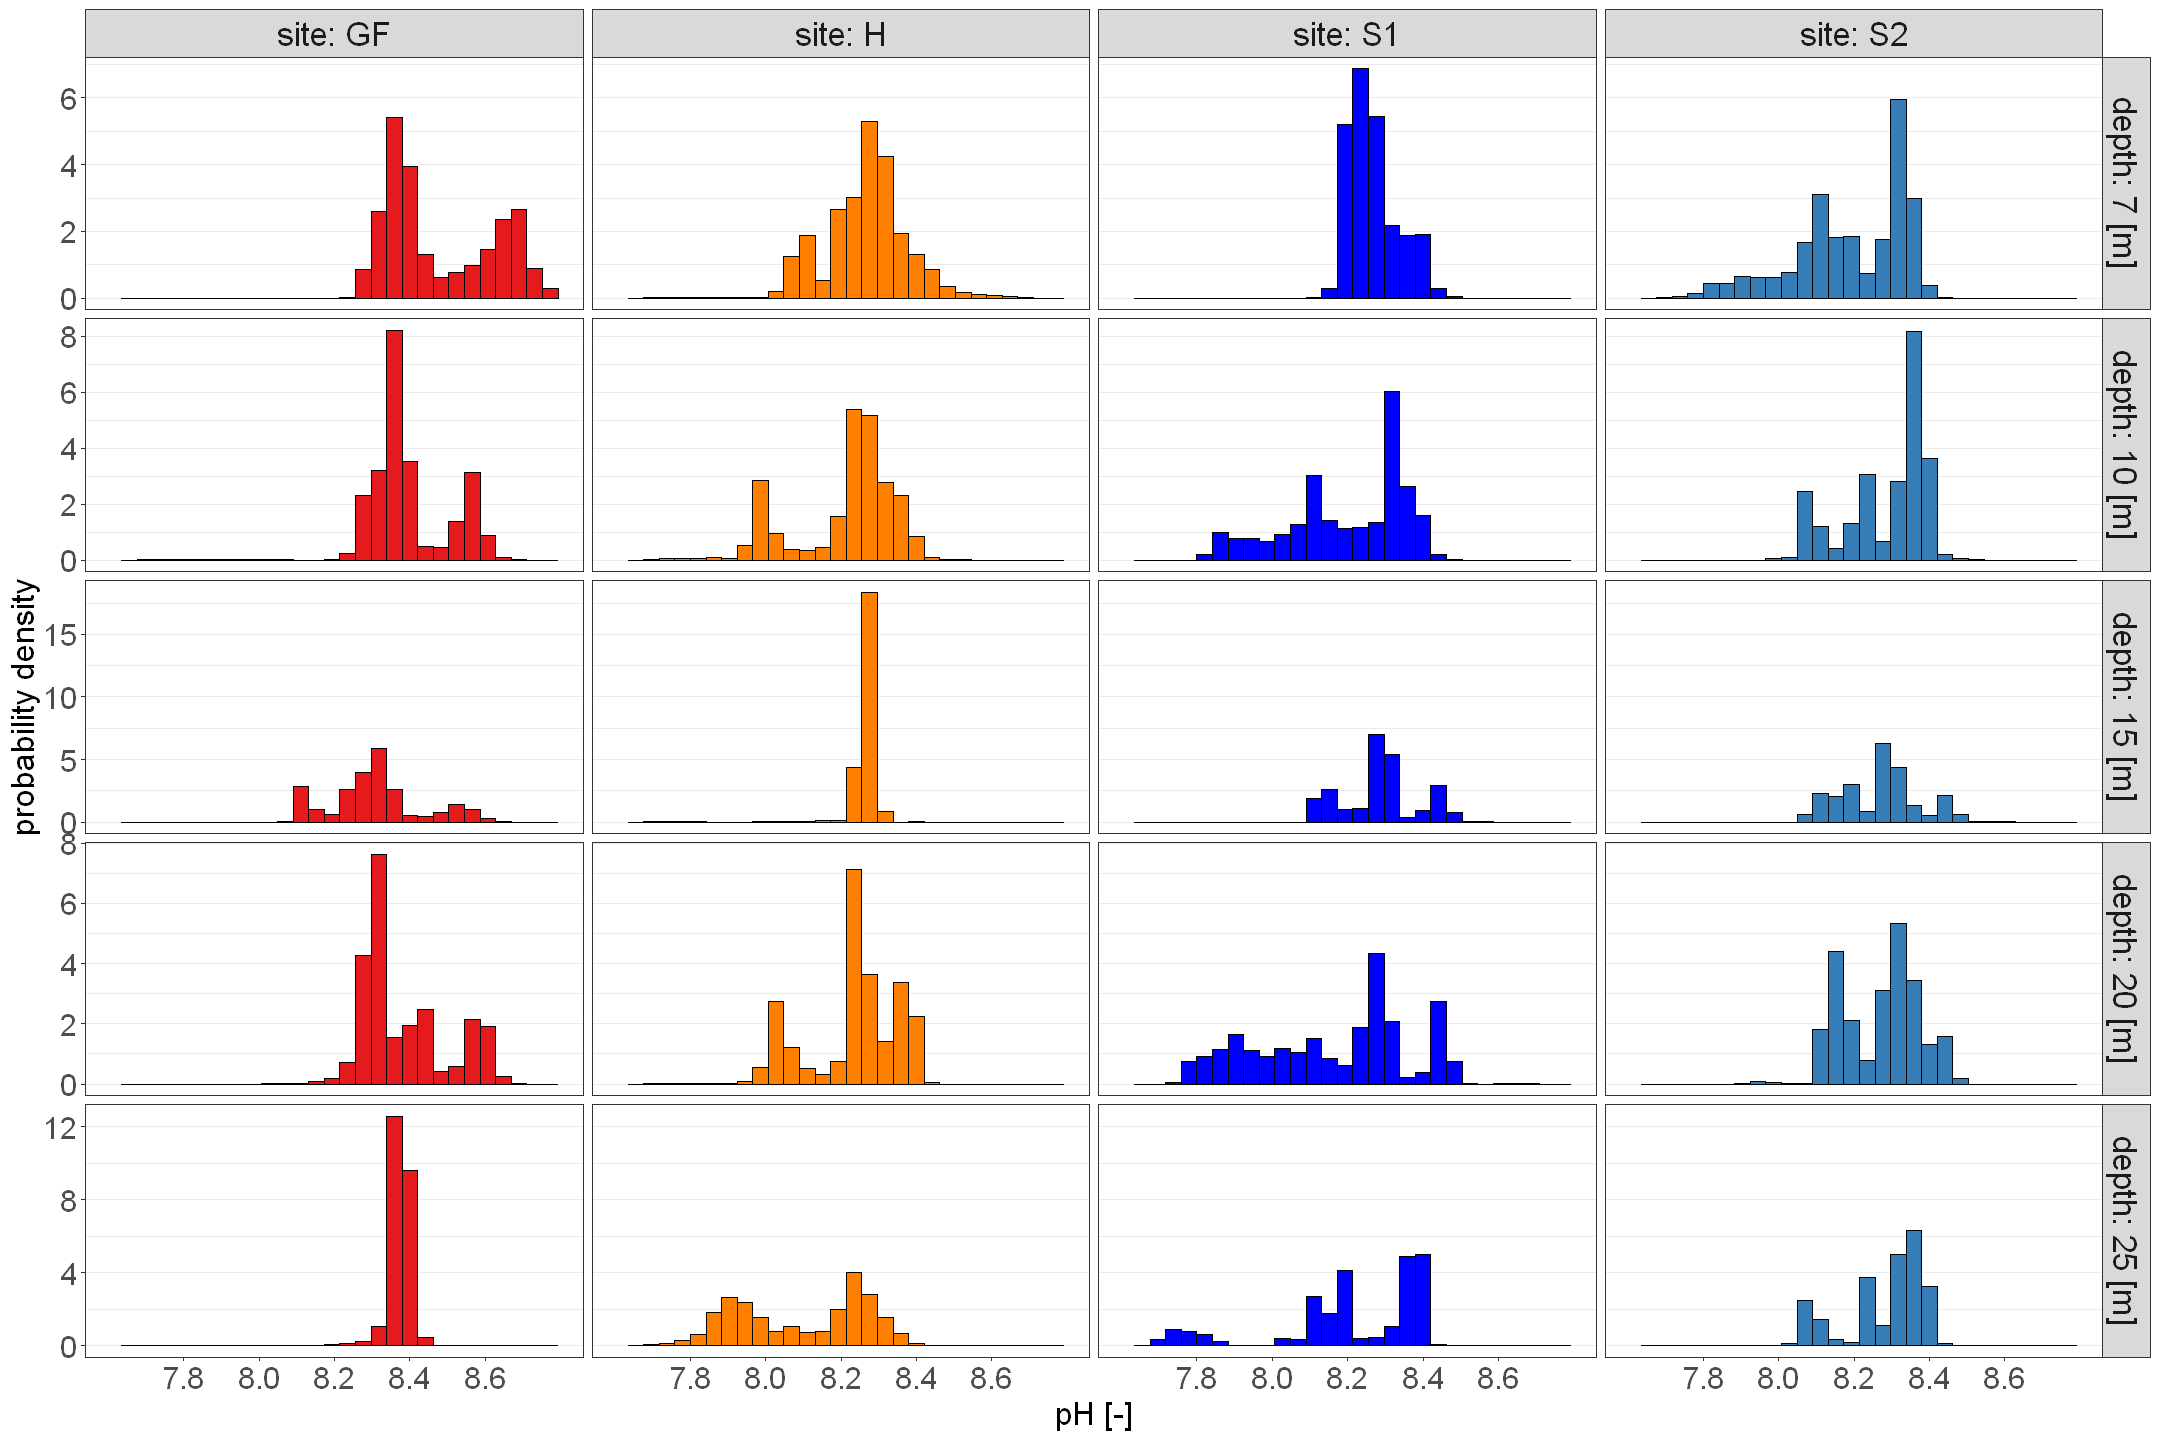

In [19]:
options(repr.plot.width=18,repr.plot.height=12)

ggplot(df.chem.merged ,aes(x=get(feat),y=after_stat(density),fill=site)) + geom_histogram(show.legend = FALSE,col="black") + 
facet_grid(depth~site,labeller = label_both,scale="free_y") +
scale_fill_manual(values=site.color) + scale_x_continuous(limits = c(7.6, 8.8), breaks = c(7.8,8.0, 8.2, 8.4, 8.6))+
xlab(feat.label) + ylab("probability density")  +
hist_theme

if (flag.make.plots) {
    ggsave(paste0(IMG.path,"/hist/",feat,"_hist.tiff"),height = 12, width = 18,dpi = dpi.opt,compression = "lzw") # TIFF
    ggsave(paste0(IMG.path,"/hist/small/",feat,"_hist.jpg"),height = 12, width = 18,dpi = 150) # JPG
}

`summarise()` has grouped output by 'day', 'site'. You can override using the
`.groups` argument.
Warning message:
"Removed 237604 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 569 rows containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 4906 rows containing missing values or values outside the scale range
(`geom_point()`)."


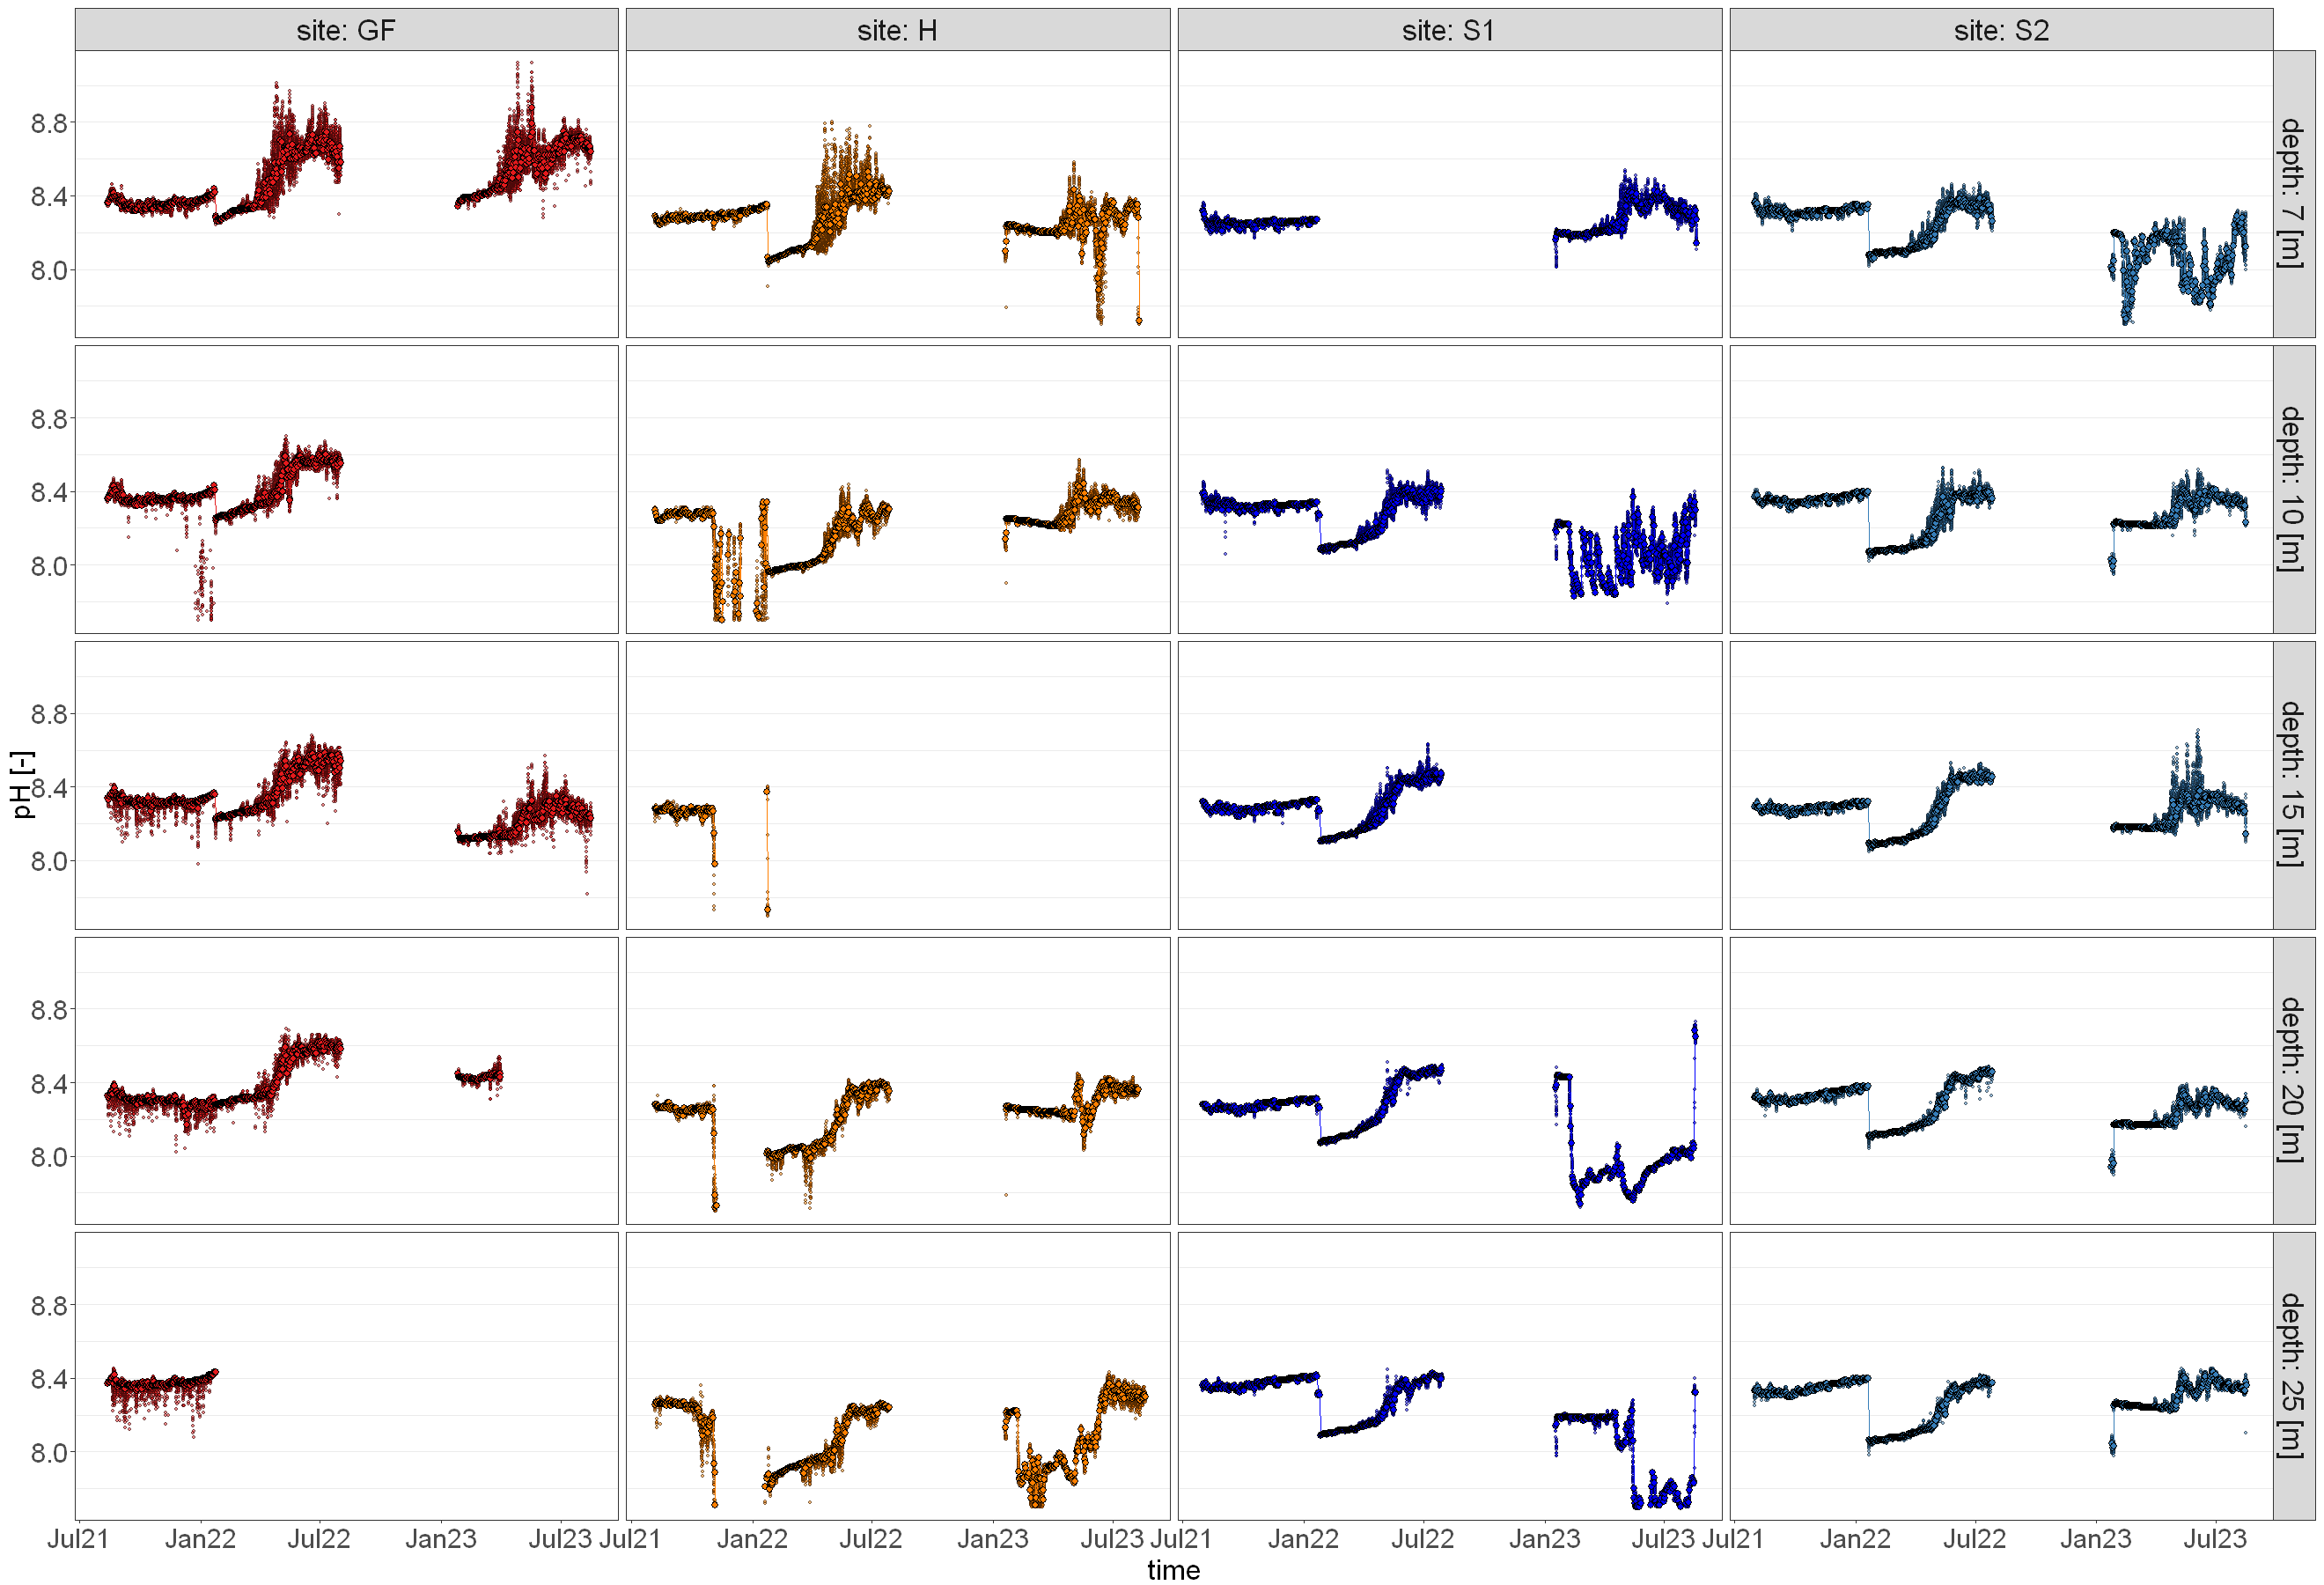

In [20]:
options(repr.plot.height=15,repr.plot.width=22)

df.days <- df.chem.merged %>% 
group_by(day=floor_date(date_time,unit="day"),site,depth) %>% 
summarize(means=mean(get(feat),na.rm = TRUE),medians=median(get(feat),na.rm = TRUE))

df.days$day <- as.Date(df.days$day)

ggplot() +
geom_point(aes(x=date_time,y=get(feat),fill=site),data=df.chem.merged,alpha=0.5,shape=21,size=0.7) + 
geom_line(aes(x=day+ddays(0.5),y=medians,col=site),data=df.days,linewidth=0.5) + 
scale_color_manual(values=site.color) +
geom_point(aes(x=day+ddays(0.5),y=medians,fill=site),data=df.days,size=2,shape=21)+
scale_fill_manual(values=site.color) +
ylab(feat.label)+ xlab("time") +facet_grid(depth~site,labeller = label_both) + #,scales = "free" 
scale_x_datetime(date_labels = "%b%y") +
time_series_theme

if (flag.make.plots) {
    ggsave(paste0(IMG.path,"/time_series/",feat,"_time_series_grid.tiff"),height = 12, width = 20,dpi = dpi.opt,compression = "lzw") # TIFF
    ggsave(paste0(IMG.path,"/time_series/small/",feat,"_time_series_grid.jpg"),height = 12, width = 20,dpi = 150) # JPG
}

Warning message:
"Removed 24235 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 156015 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


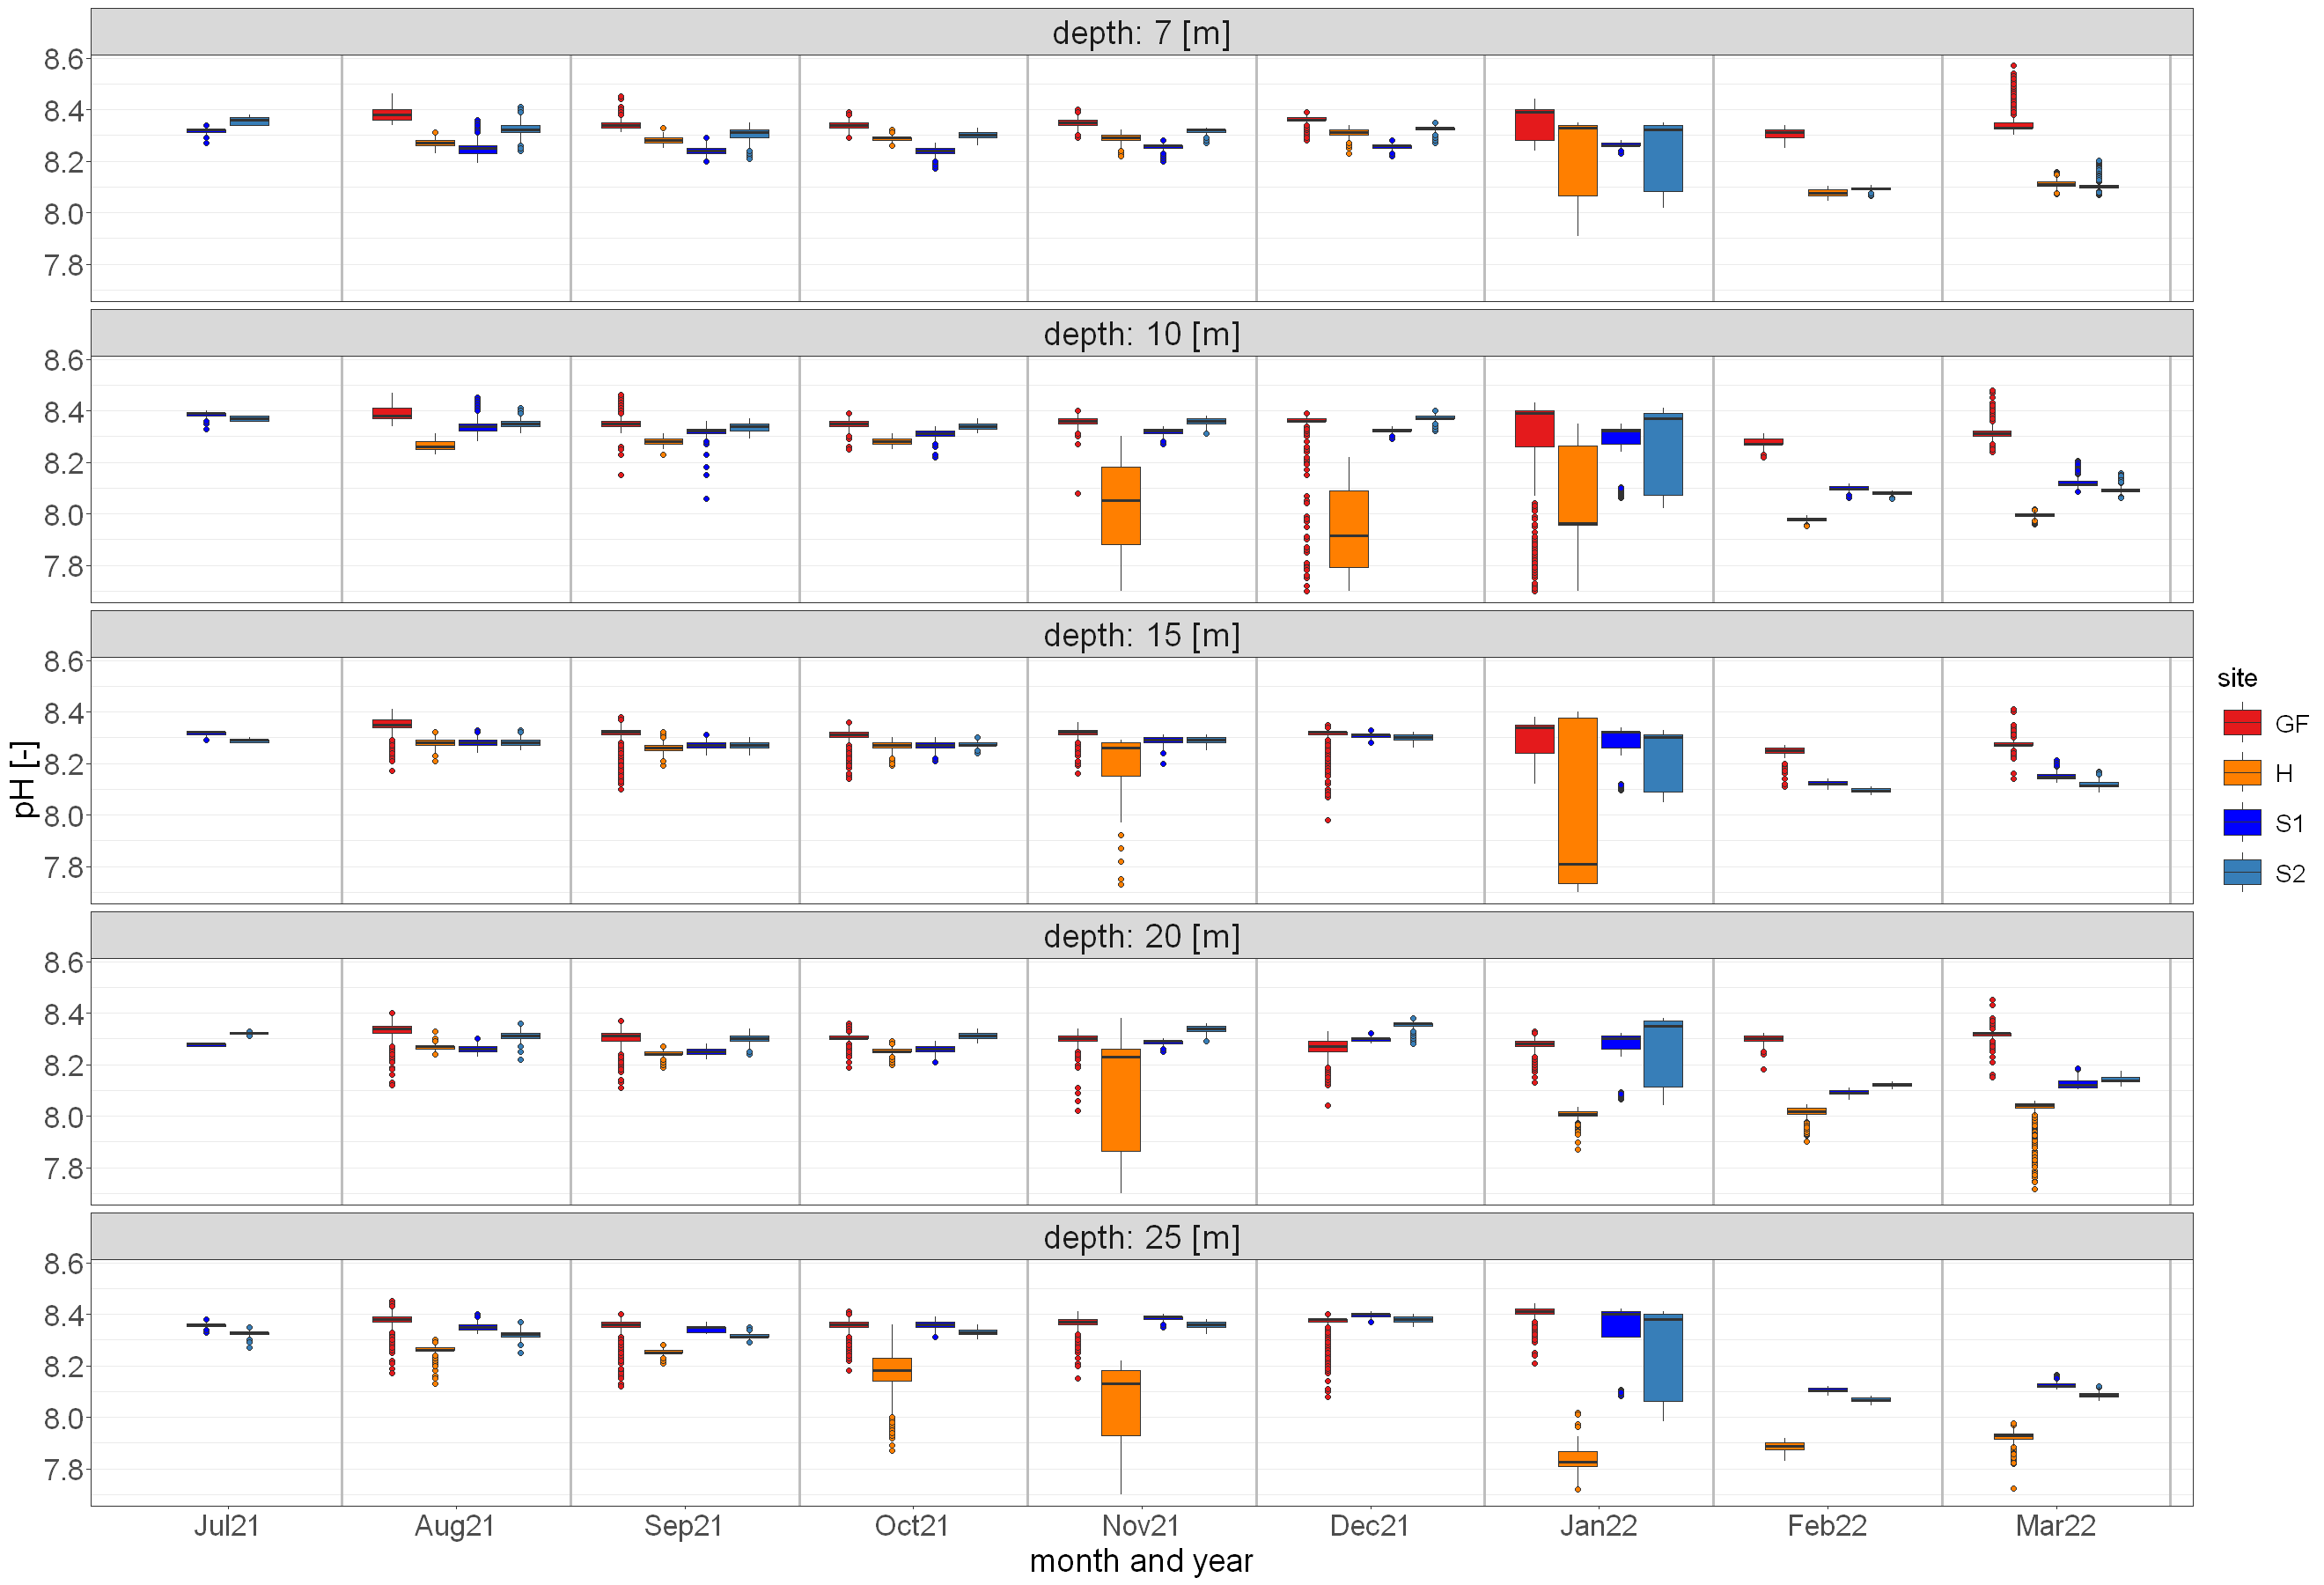

Warning message:
"Removed 57354 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


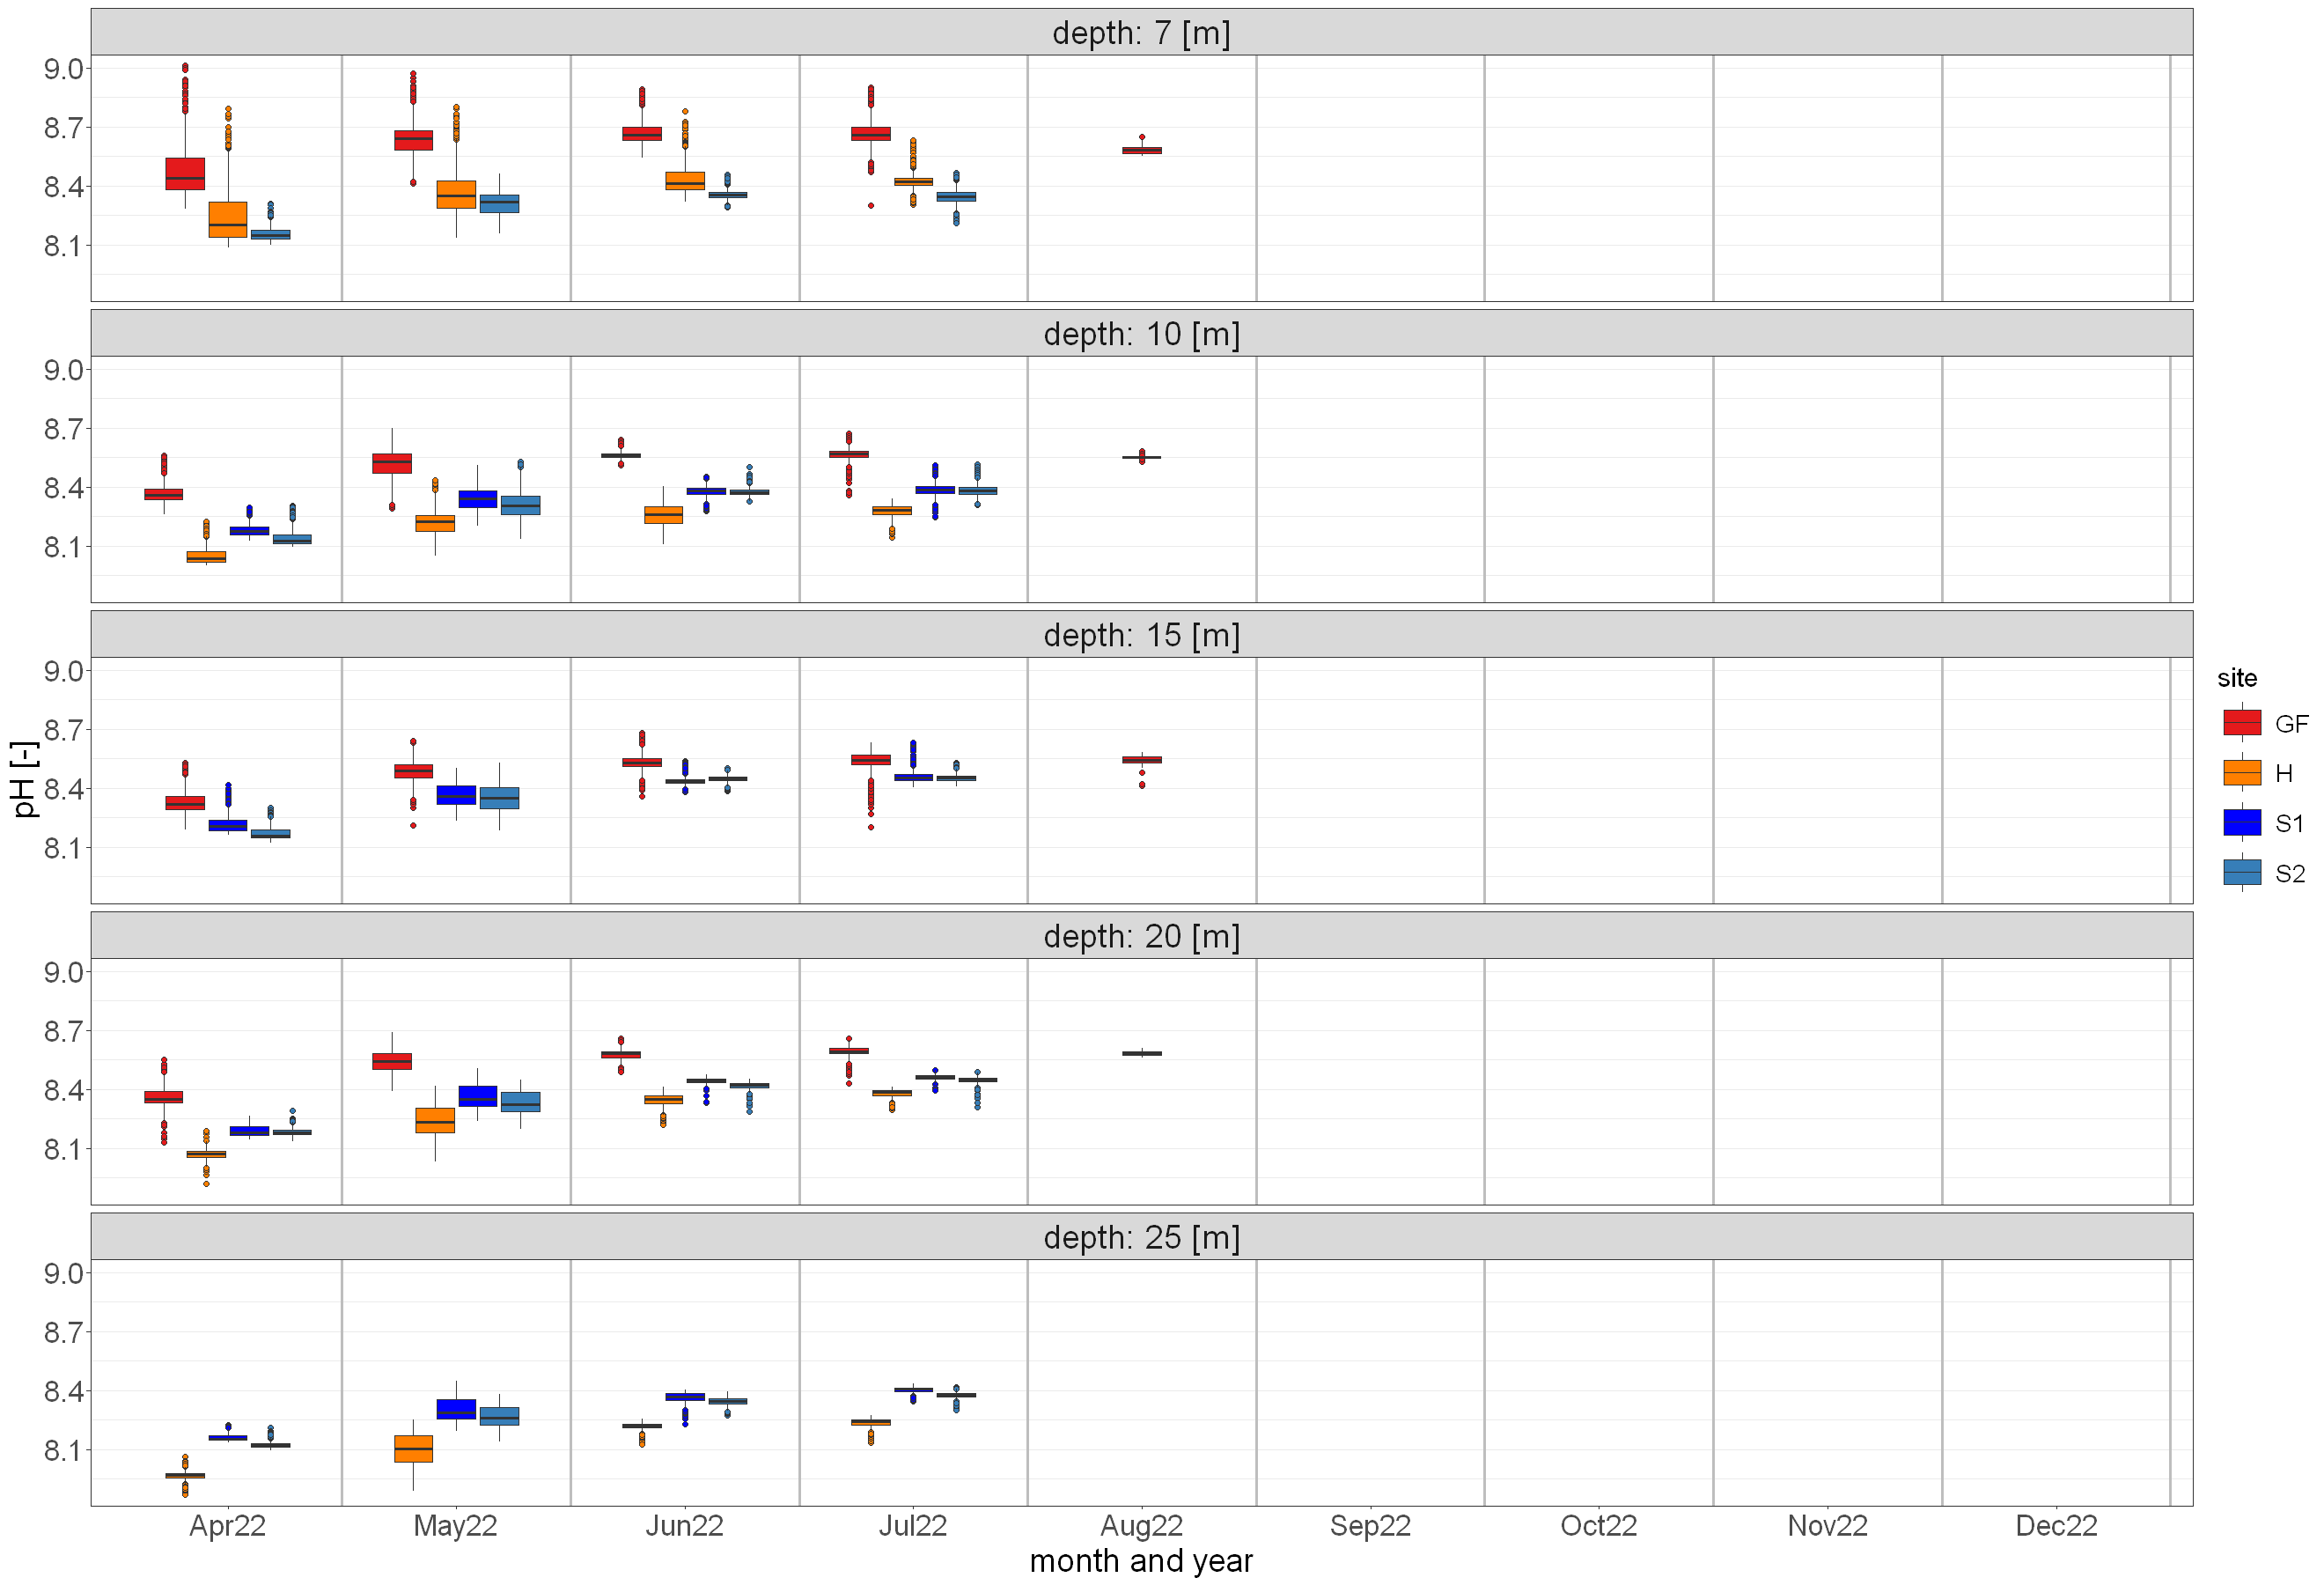

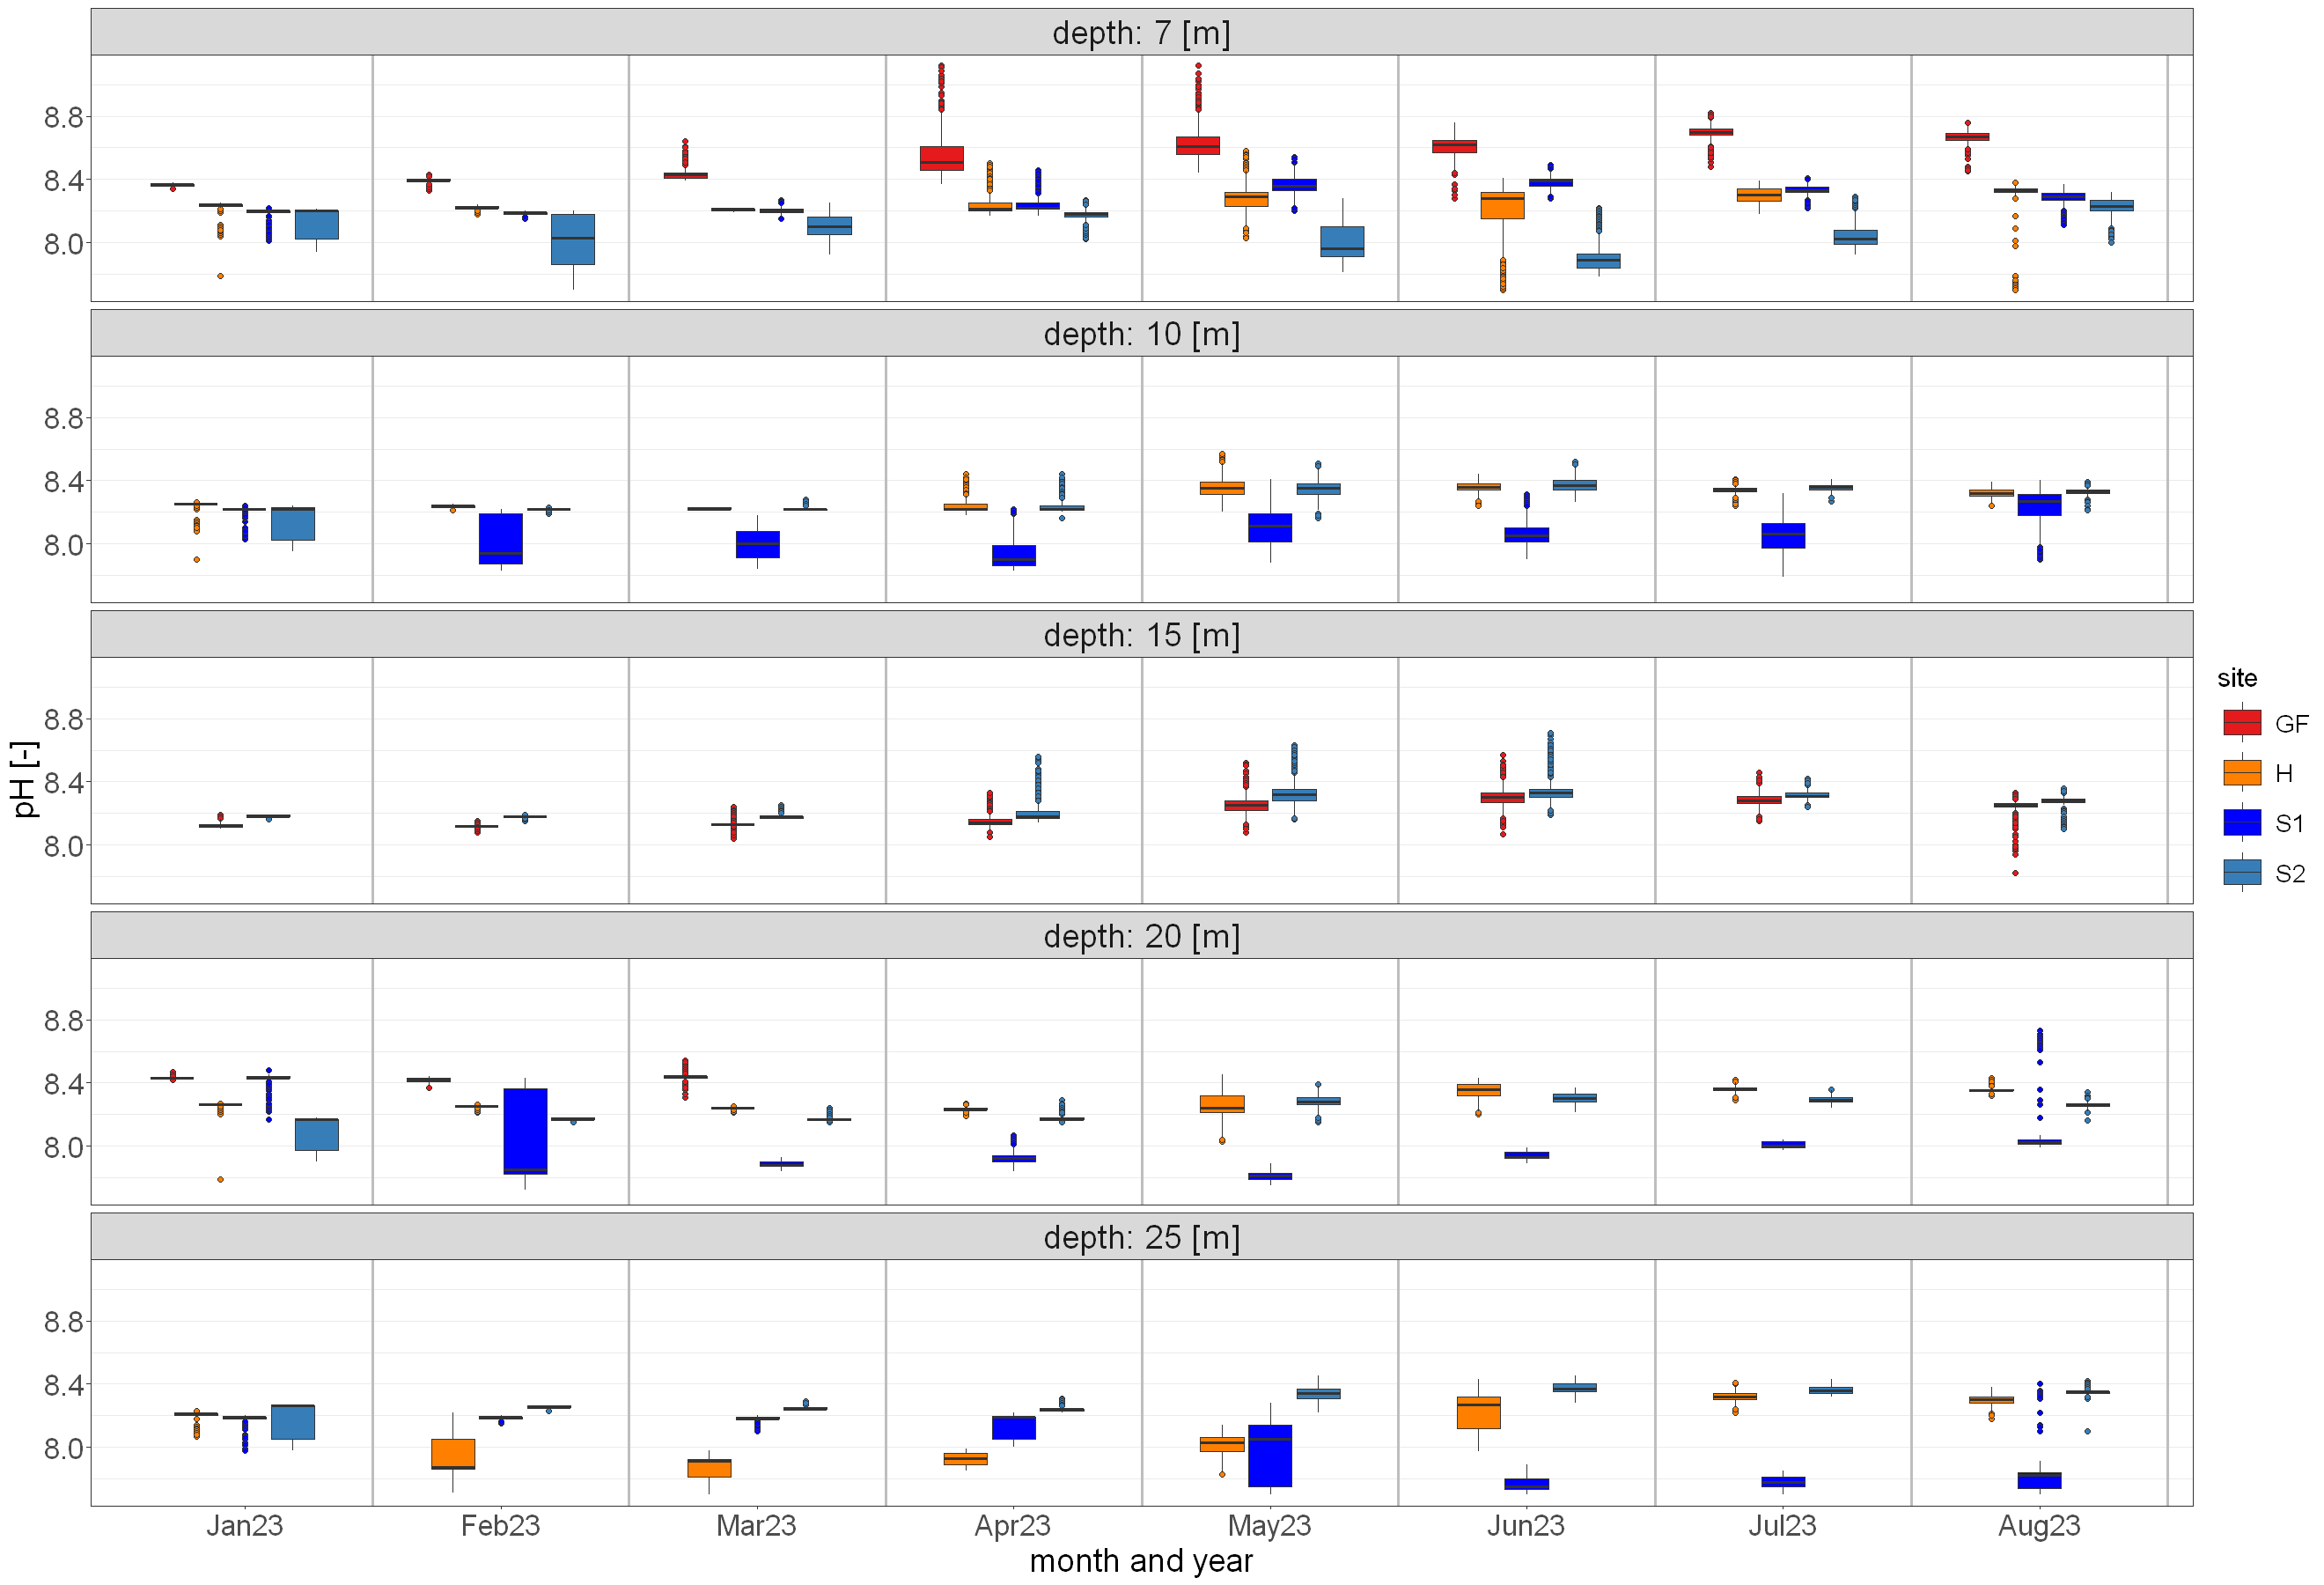

In [21]:
options(repr.plot.height=15,repr.plot.width=22)

tmp.df <- df.chem.merged %>% filter(c1)
tmp.df$m.yr.factor.tmp <- factor(tmp.df$m.yr.factor,levels = lev.c1, ordered = TRUE)
ggplot(tmp.df,
       aes(x=m.yr.factor.tmp,y=get(feat),fill=site)) + geom_boxplot(position = position_dodge2(preserve = "single"),outlier.shape = 21) +            
           scale_fill_manual(values=site.color) +
           facet_wrap(~depth,labeller = label_both,ncol=1) +
# labels set-up
           xlab("month and year") + ylab(feat.label) + scale_x_discrete(drop = FALSE)+
# viz adjustments
           geom_vline(xintercept=seq(1.5, length(levels(tmp.df$w.yr.factor))-0.5, 1),lwd=1, colour="gray") +
           boxplot_theme

if (flag.make.plots) {
    bp.fig <- 1 
    ggsave(paste0(IMG.path,"/boxplots/",feat,"_boxplots",bp.fig,".tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/boxplots/small/",feat,"_boxplots",bp.fig,".jpg"),height = 15, width = 22,dpi = 150)
}

tmp.df <- df.chem.merged %>% filter(c2)
tmp.df$m.yr.factor.tmp <- factor(tmp.df$m.yr.factor,levels = lev.c2, ordered = TRUE)
ggplot(tmp.df ,
       aes(x=m.yr.factor.tmp,y=get(feat),fill=site)) + geom_boxplot(position = position_dodge2(preserve = "single"),outlier.shape = 21) +            
           scale_fill_manual(values=site.color) +
           facet_wrap(~depth,labeller = label_both,ncol=1) + 
# labels set-up
           xlab("month and year") + ylab(feat.label) + scale_x_discrete(drop = FALSE)+
# viz adjustments
           geom_vline(xintercept=seq(1.5, length(levels(tmp.df$w.yr.factor))-0.5, 1),lwd=1, colour="gray") +
           boxplot_theme

if (flag.make.plots) {
    bp.fig <- 2 
    ggsave(paste0(IMG.path,"/boxplots/",feat,"_boxplots",bp.fig,".tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/boxplots/small/",feat,"_boxplots",bp.fig,".jpg"),height = 15, width = 22,dpi = 150)
}

tmp.df <- df.chem.merged %>% filter(c3)
tmp.df$m.yr.factor.tmp <- factor(tmp.df$m.yr.factor,levels = lev.c3, ordered = TRUE)
ggplot(tmp.df,
       aes(x=m.yr.factor.tmp,y=get(feat),fill=site)) + geom_boxplot(position = position_dodge2(preserve = "single"),outlier.shape = 21) +            
           scale_fill_manual(values=site.color) +
           facet_wrap(~depth,labeller = label_both,ncol=1) + 
# labels set-up
           xlab("month and year") + ylab(feat.label) + scale_x_discrete(drop = FALSE)+
# viz adjustments
           geom_vline(xintercept=seq(1.5, length(levels(tmp.df$w.yr.factor))-0.5, 1),lwd=1, colour="gray") +
           boxplot_theme

if (flag.make.plots) {
    bp.fig <- 3 
    ggsave(paste0(IMG.path,"/boxplots/",feat,"_boxplots",bp.fig,".tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/boxplots/small/",feat,"_boxplots",bp.fig,".jpg"),height = 15, width = 22,dpi = 150)
}

### Temperature

In [22]:
feat.label <- "temperature [°C]"
feat <- "temp"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 7847 rows containing non-finite outside the scale range (`stat_bin()`)."


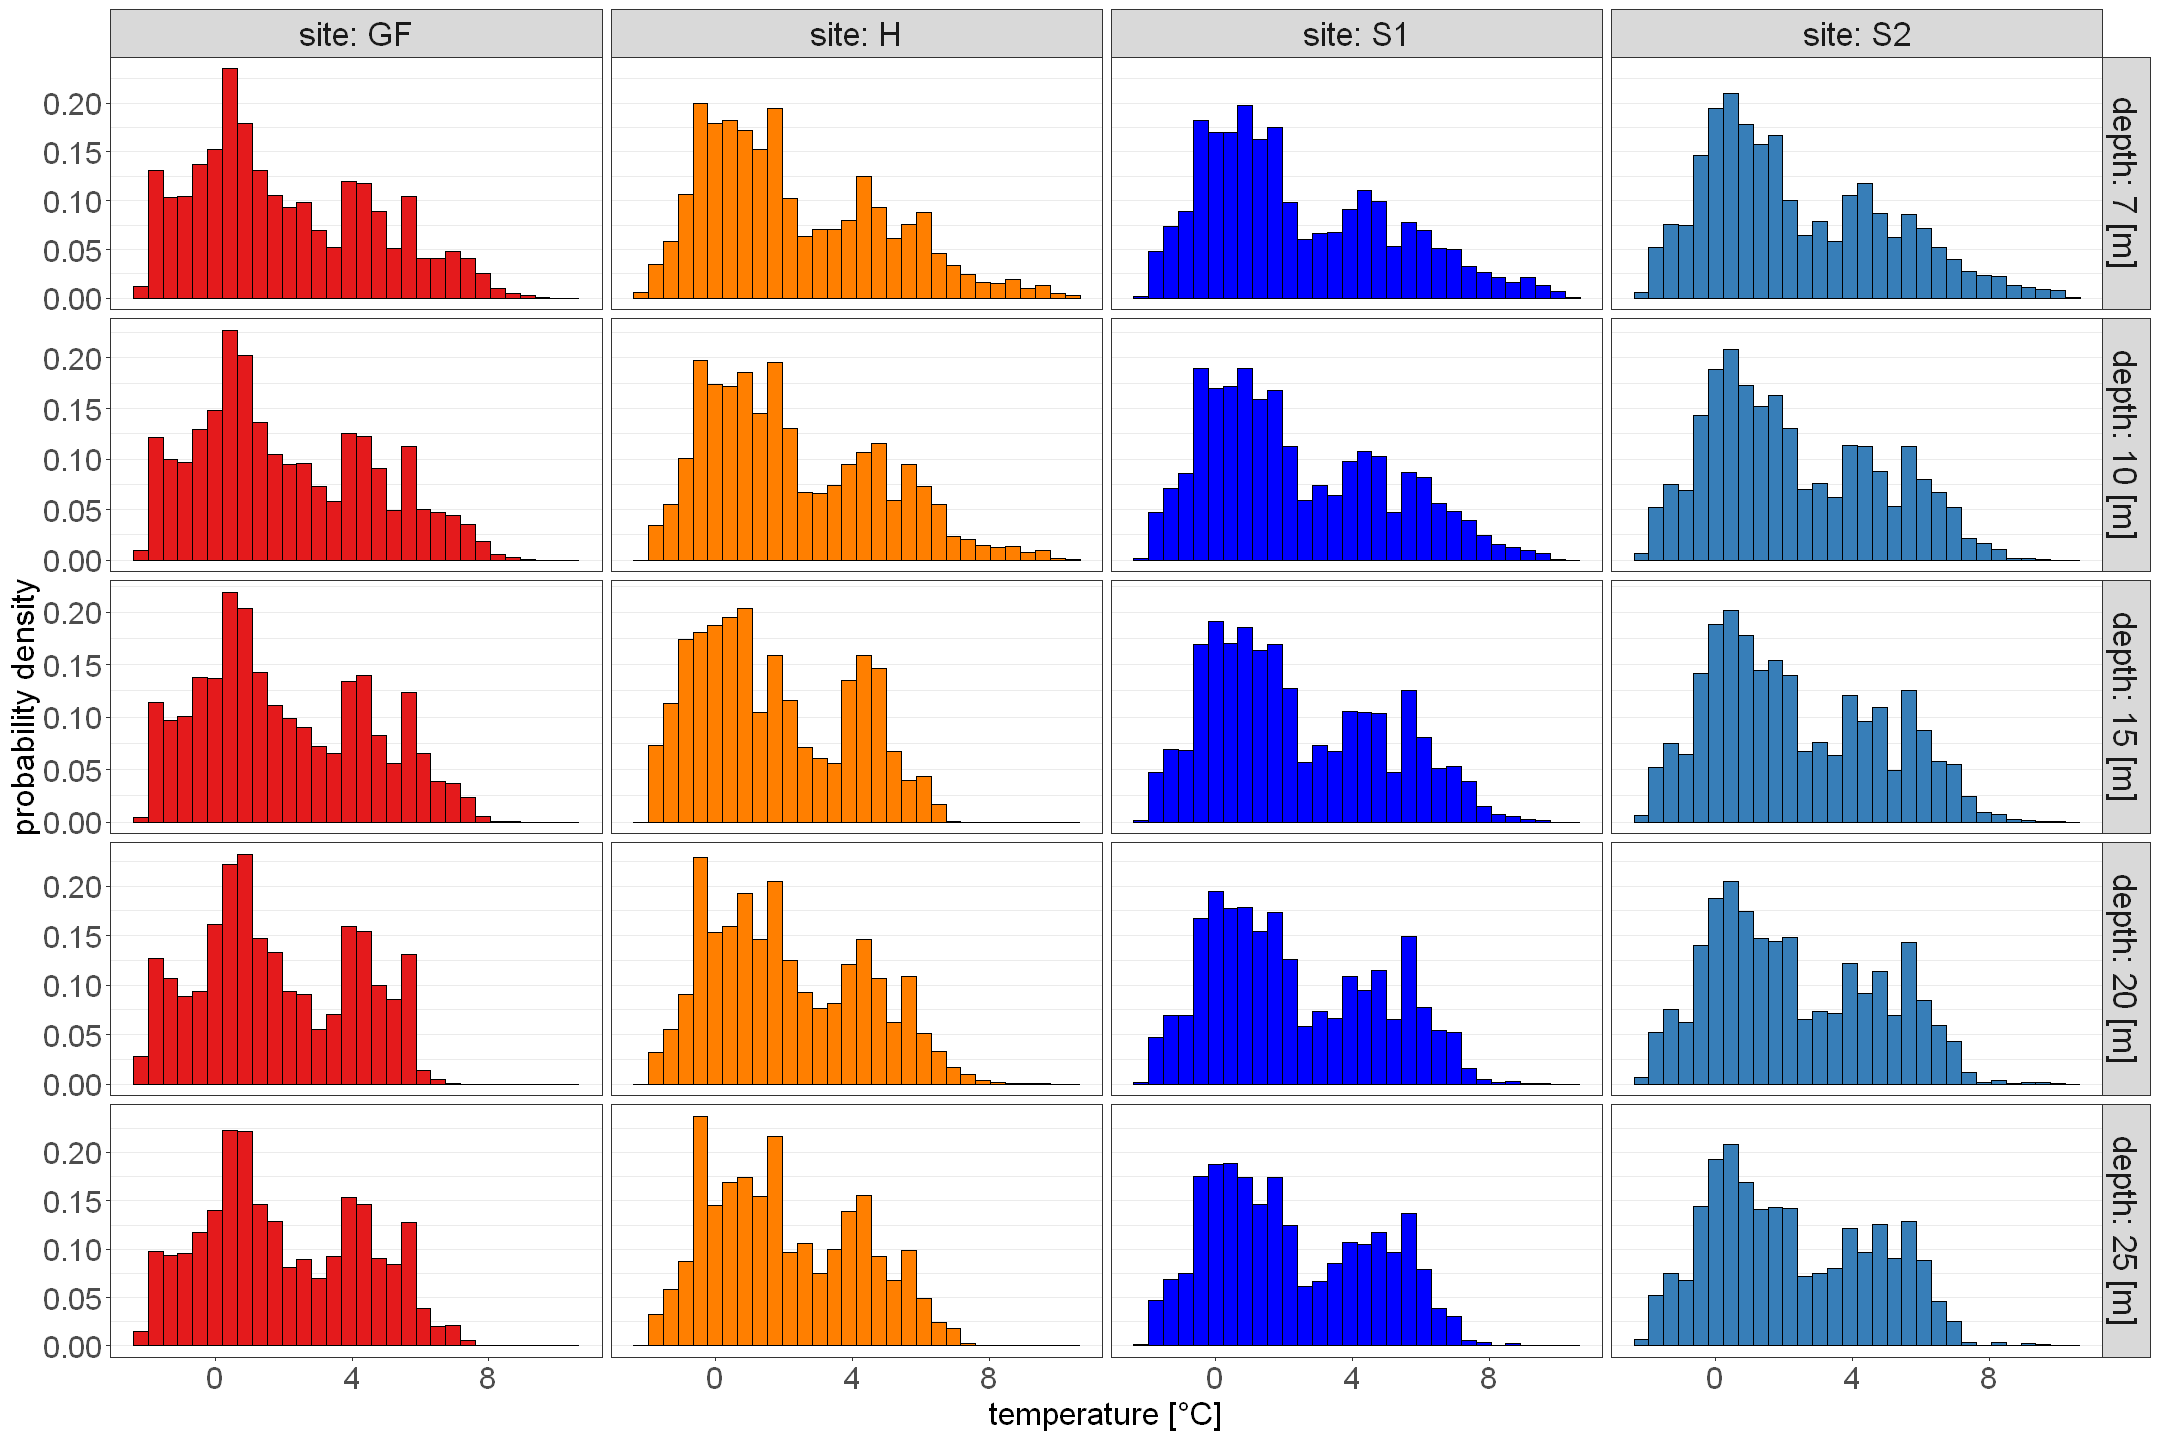

In [23]:
options(repr.plot.width=18,repr.plot.height=12)

ggplot(df.chem.merged ,aes(x=get(feat),y=after_stat(density),fill=site)) + geom_histogram(show.legend = FALSE,col="black") + 
facet_grid(depth~site,labeller = label_both,scale="free_y") +
scale_fill_manual(values=site.color) +
xlab(feat.label) + ylab("probability density")  +
hist_theme

if (flag.make.plots) {
    ggsave(paste0(IMG.path,"/hist/",feat,"_hist.tiff"),height = 12, width = 18,dpi = dpi.opt,compression = "lzw") # TIFF
    ggsave(paste0(IMG.path,"/hist/small/",feat,"_hist.jpg"),height = 12, width = 18,dpi = 150) # JPG
}

`summarise()` has grouped output by 'day', 'site'. You can override using the
`.groups` argument.
Warning message:
"Removed 7847 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 153 rows containing missing values or values outside the scale range
(`geom_point()`)."


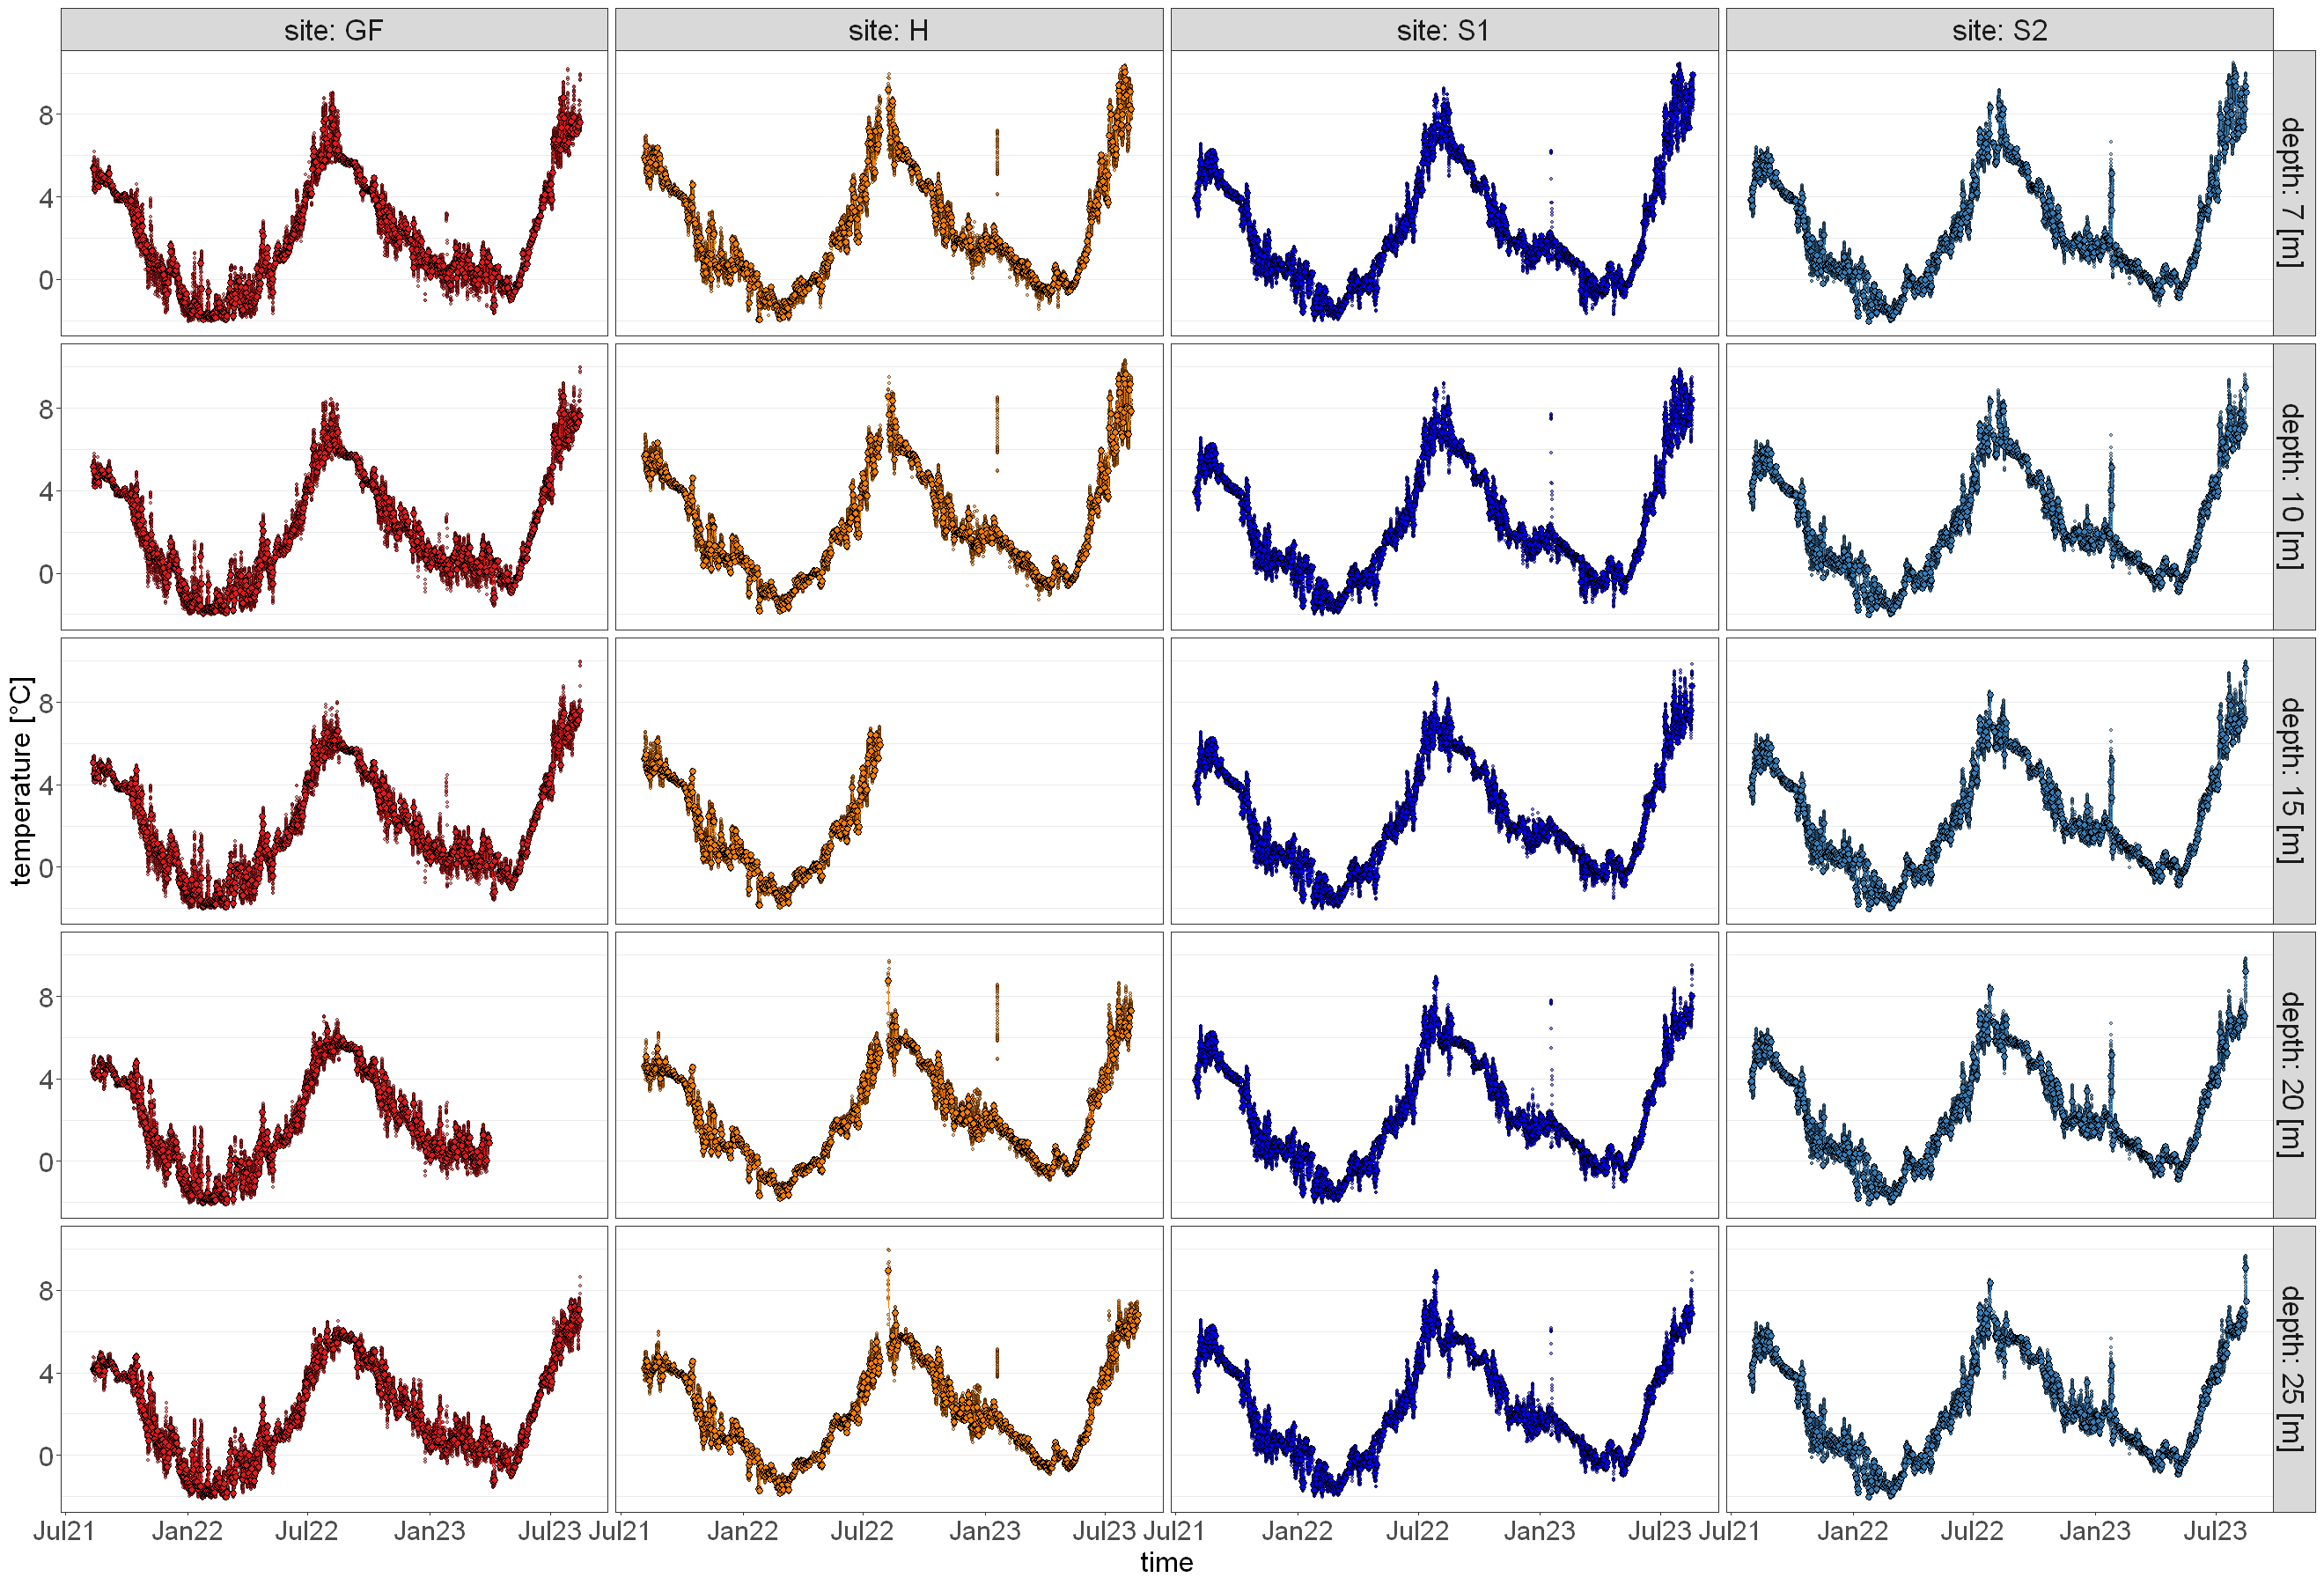

In [24]:
options(repr.plot.height=15,repr.plot.width=22)

df.days <- df.chem.merged %>% 
group_by(day=floor_date(date_time,unit="day"),site,depth) %>% 
summarize(means=mean(get(feat),na.rm = TRUE),medians=median(get(feat),na.rm = TRUE))

ggplot() +
geom_point(aes(x=date_time,y=get(feat),fill=site),data=df.chem.merged,alpha=0.5,shape=21,size=0.7) + 
geom_line(aes(x=day+ddays(0.5),y=medians,col=site),data=df.days,linewidth=0.5) +  
scale_color_manual(values=site.color) +
geom_point(aes(x=day+ddays(0.5),y=medians,fill=site),data=df.days,size=2,shape=21)+
scale_fill_manual(values=site.color) +
ylab(feat.label)+ xlab("time") +facet_grid(depth~site,labeller = label_both) + #,scales = "free" 

scale_x_datetime(date_labels = "%b%y") +

time_series_theme

if (flag.make.plots) {
    ggsave(paste0(IMG.path,"/time_series/",feat,"_time_series_grid.tiff"),height = 12, width = 20,dpi = dpi.opt,compression = "lzw") # TIFF
    ggsave(paste0(IMG.path,"/time_series/small/",feat,"_time_series_grid.jpg"),height = 12, width = 20,dpi = 150) # JPG
    #ggsave(paste0("../graphical_abstract/",feat,"_time_series_grid.svg"),height = 12, width = 18) 
}

Warning message:
"Removed 40 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 974 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


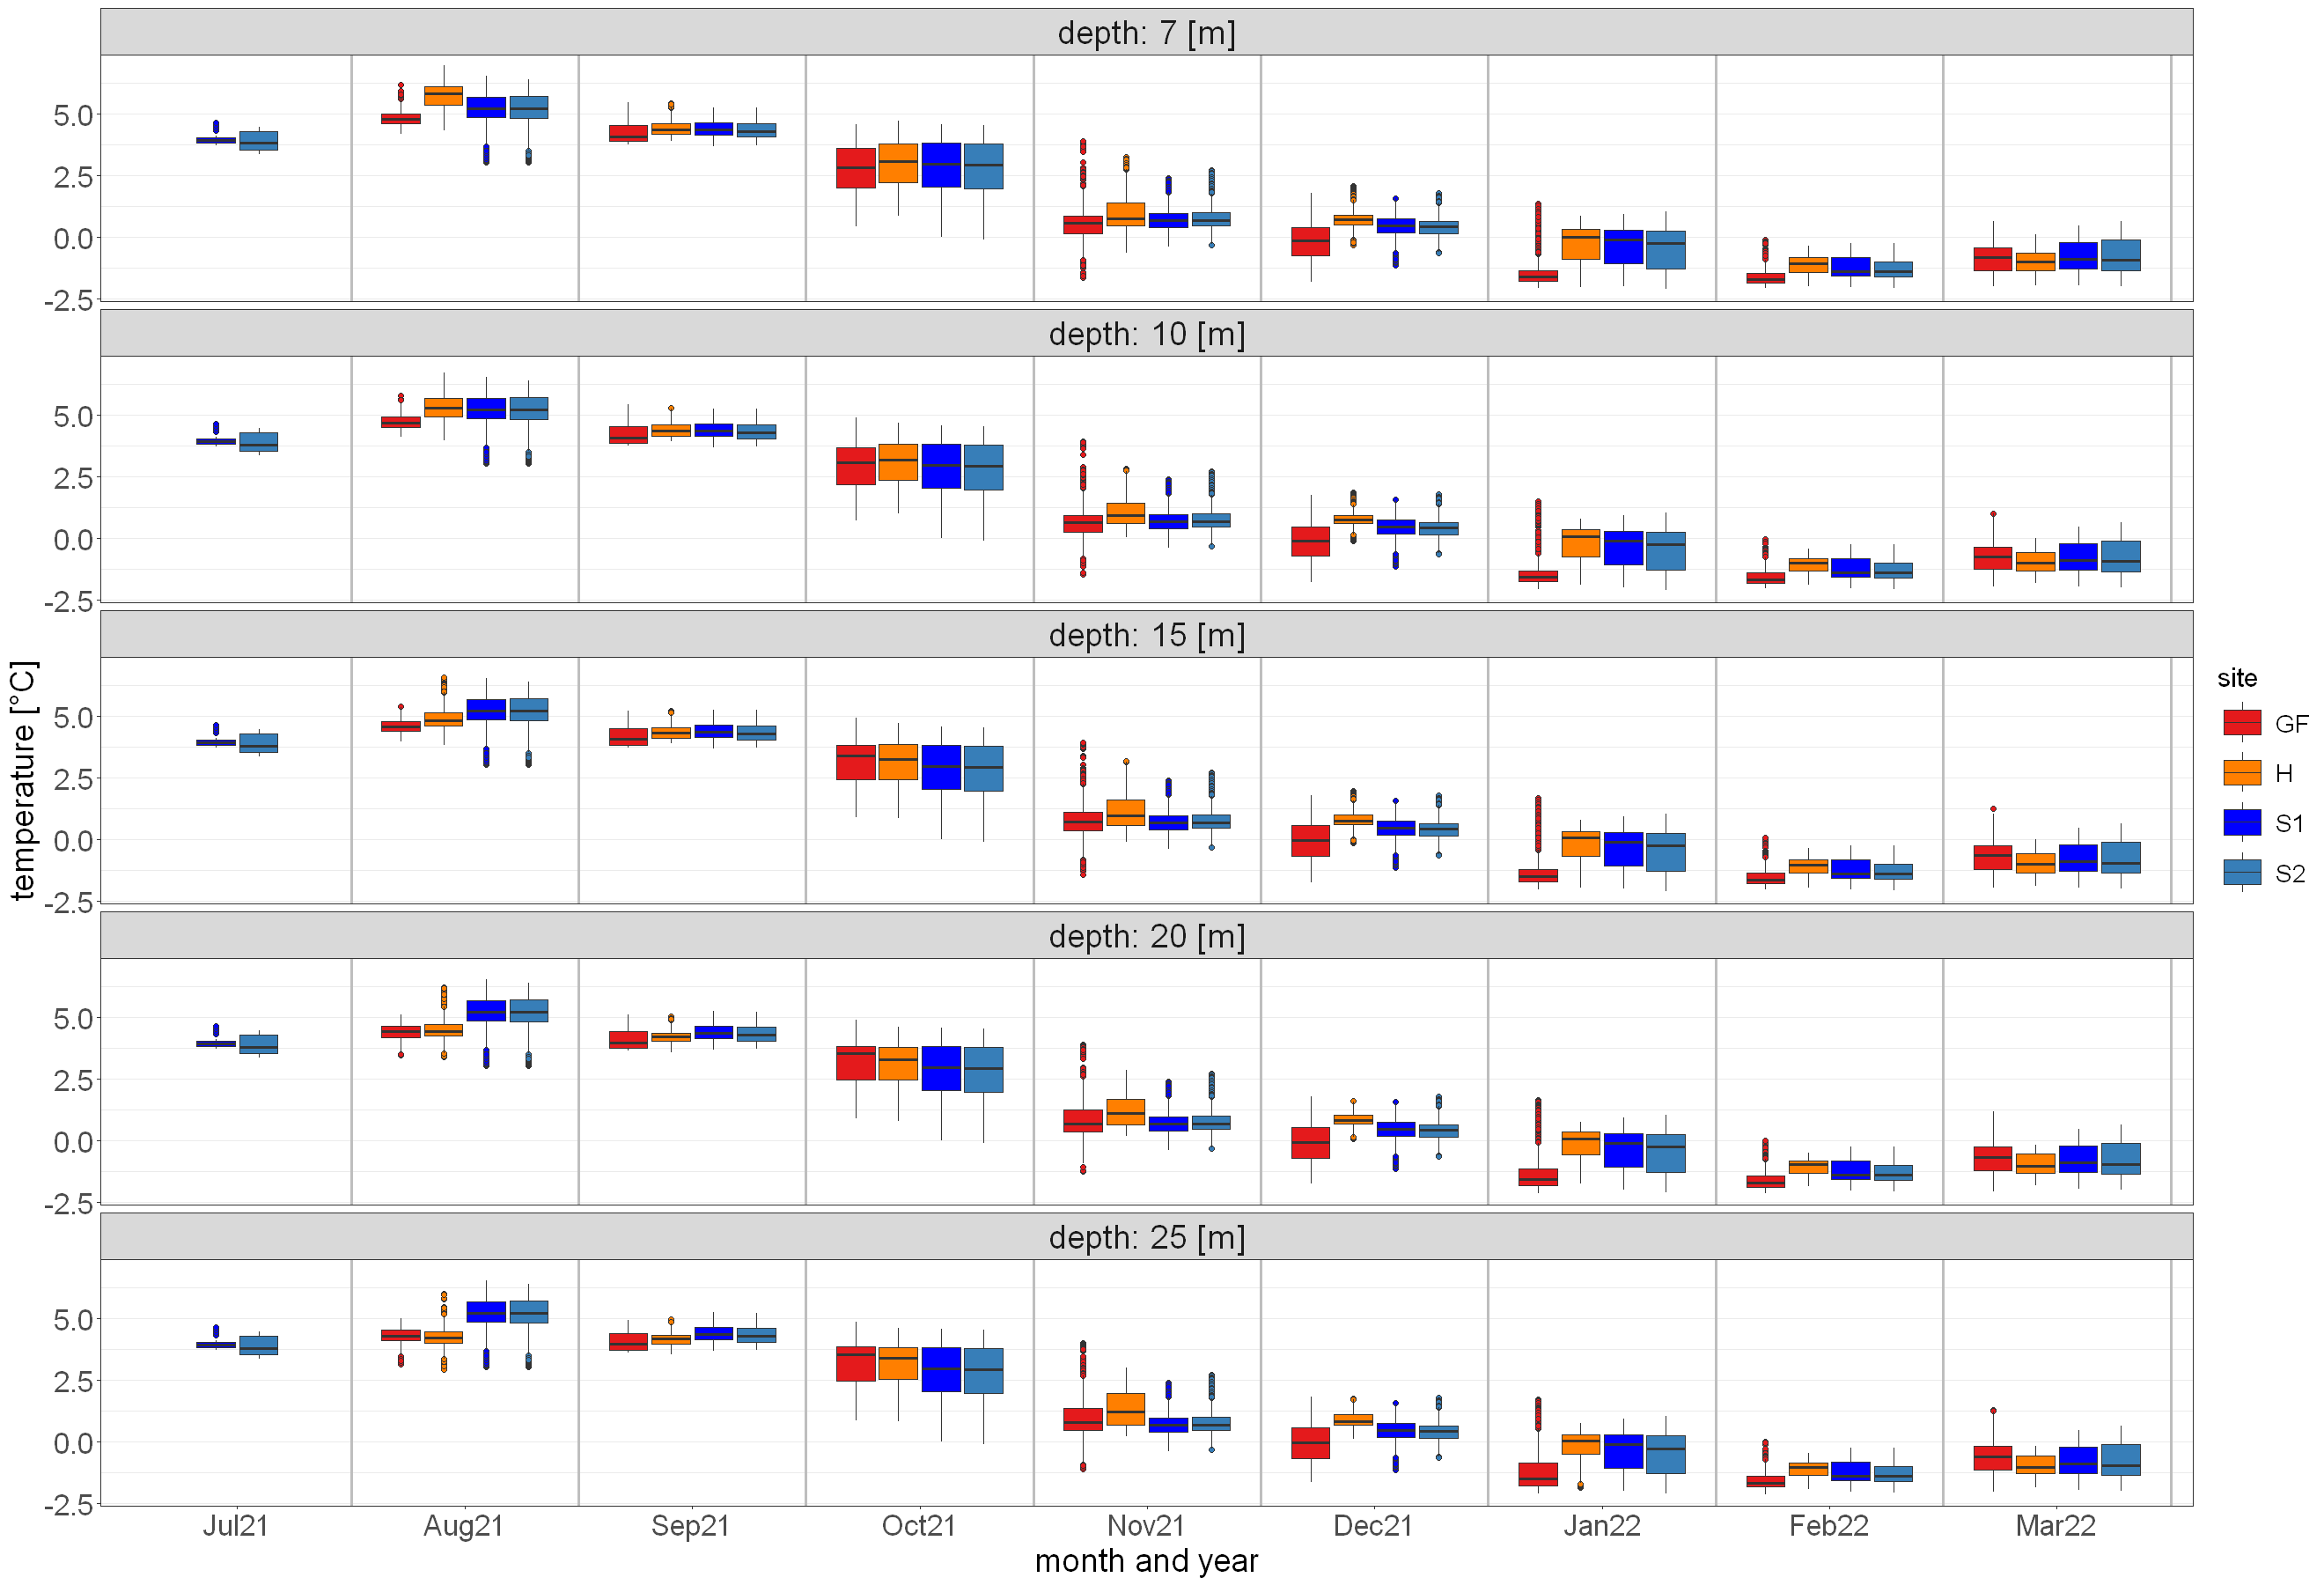

Warning message:
"Removed 6833 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


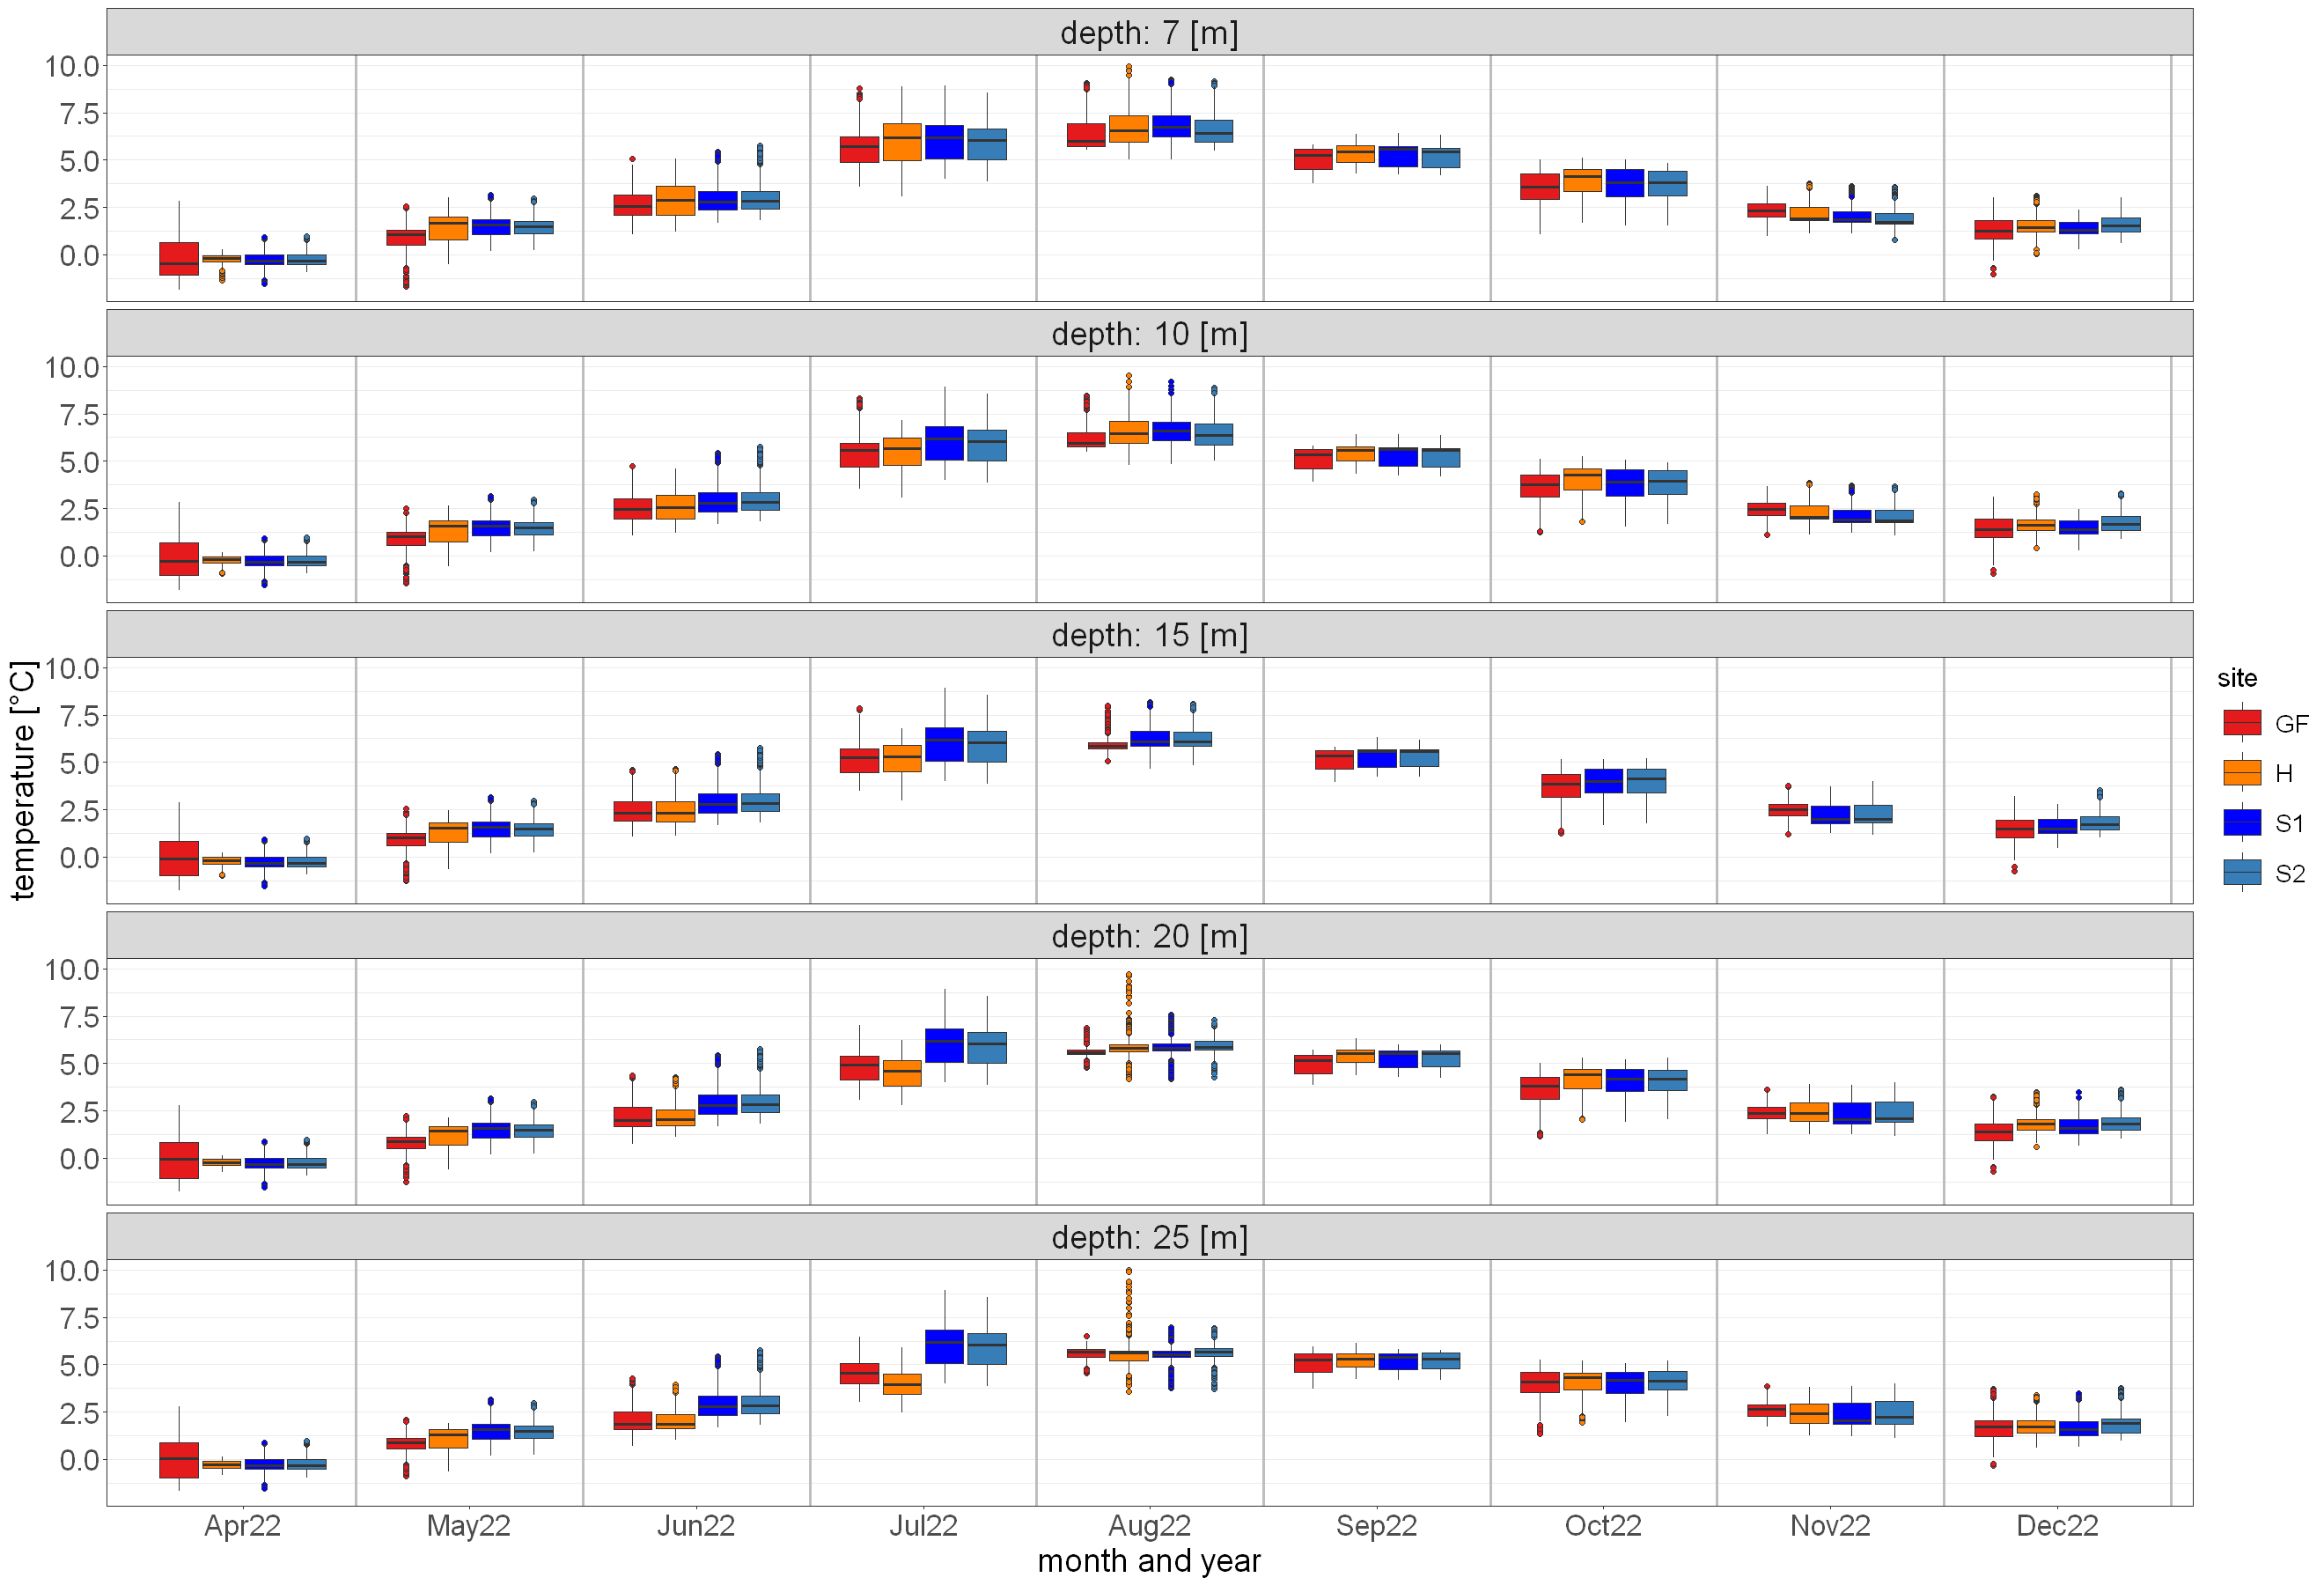

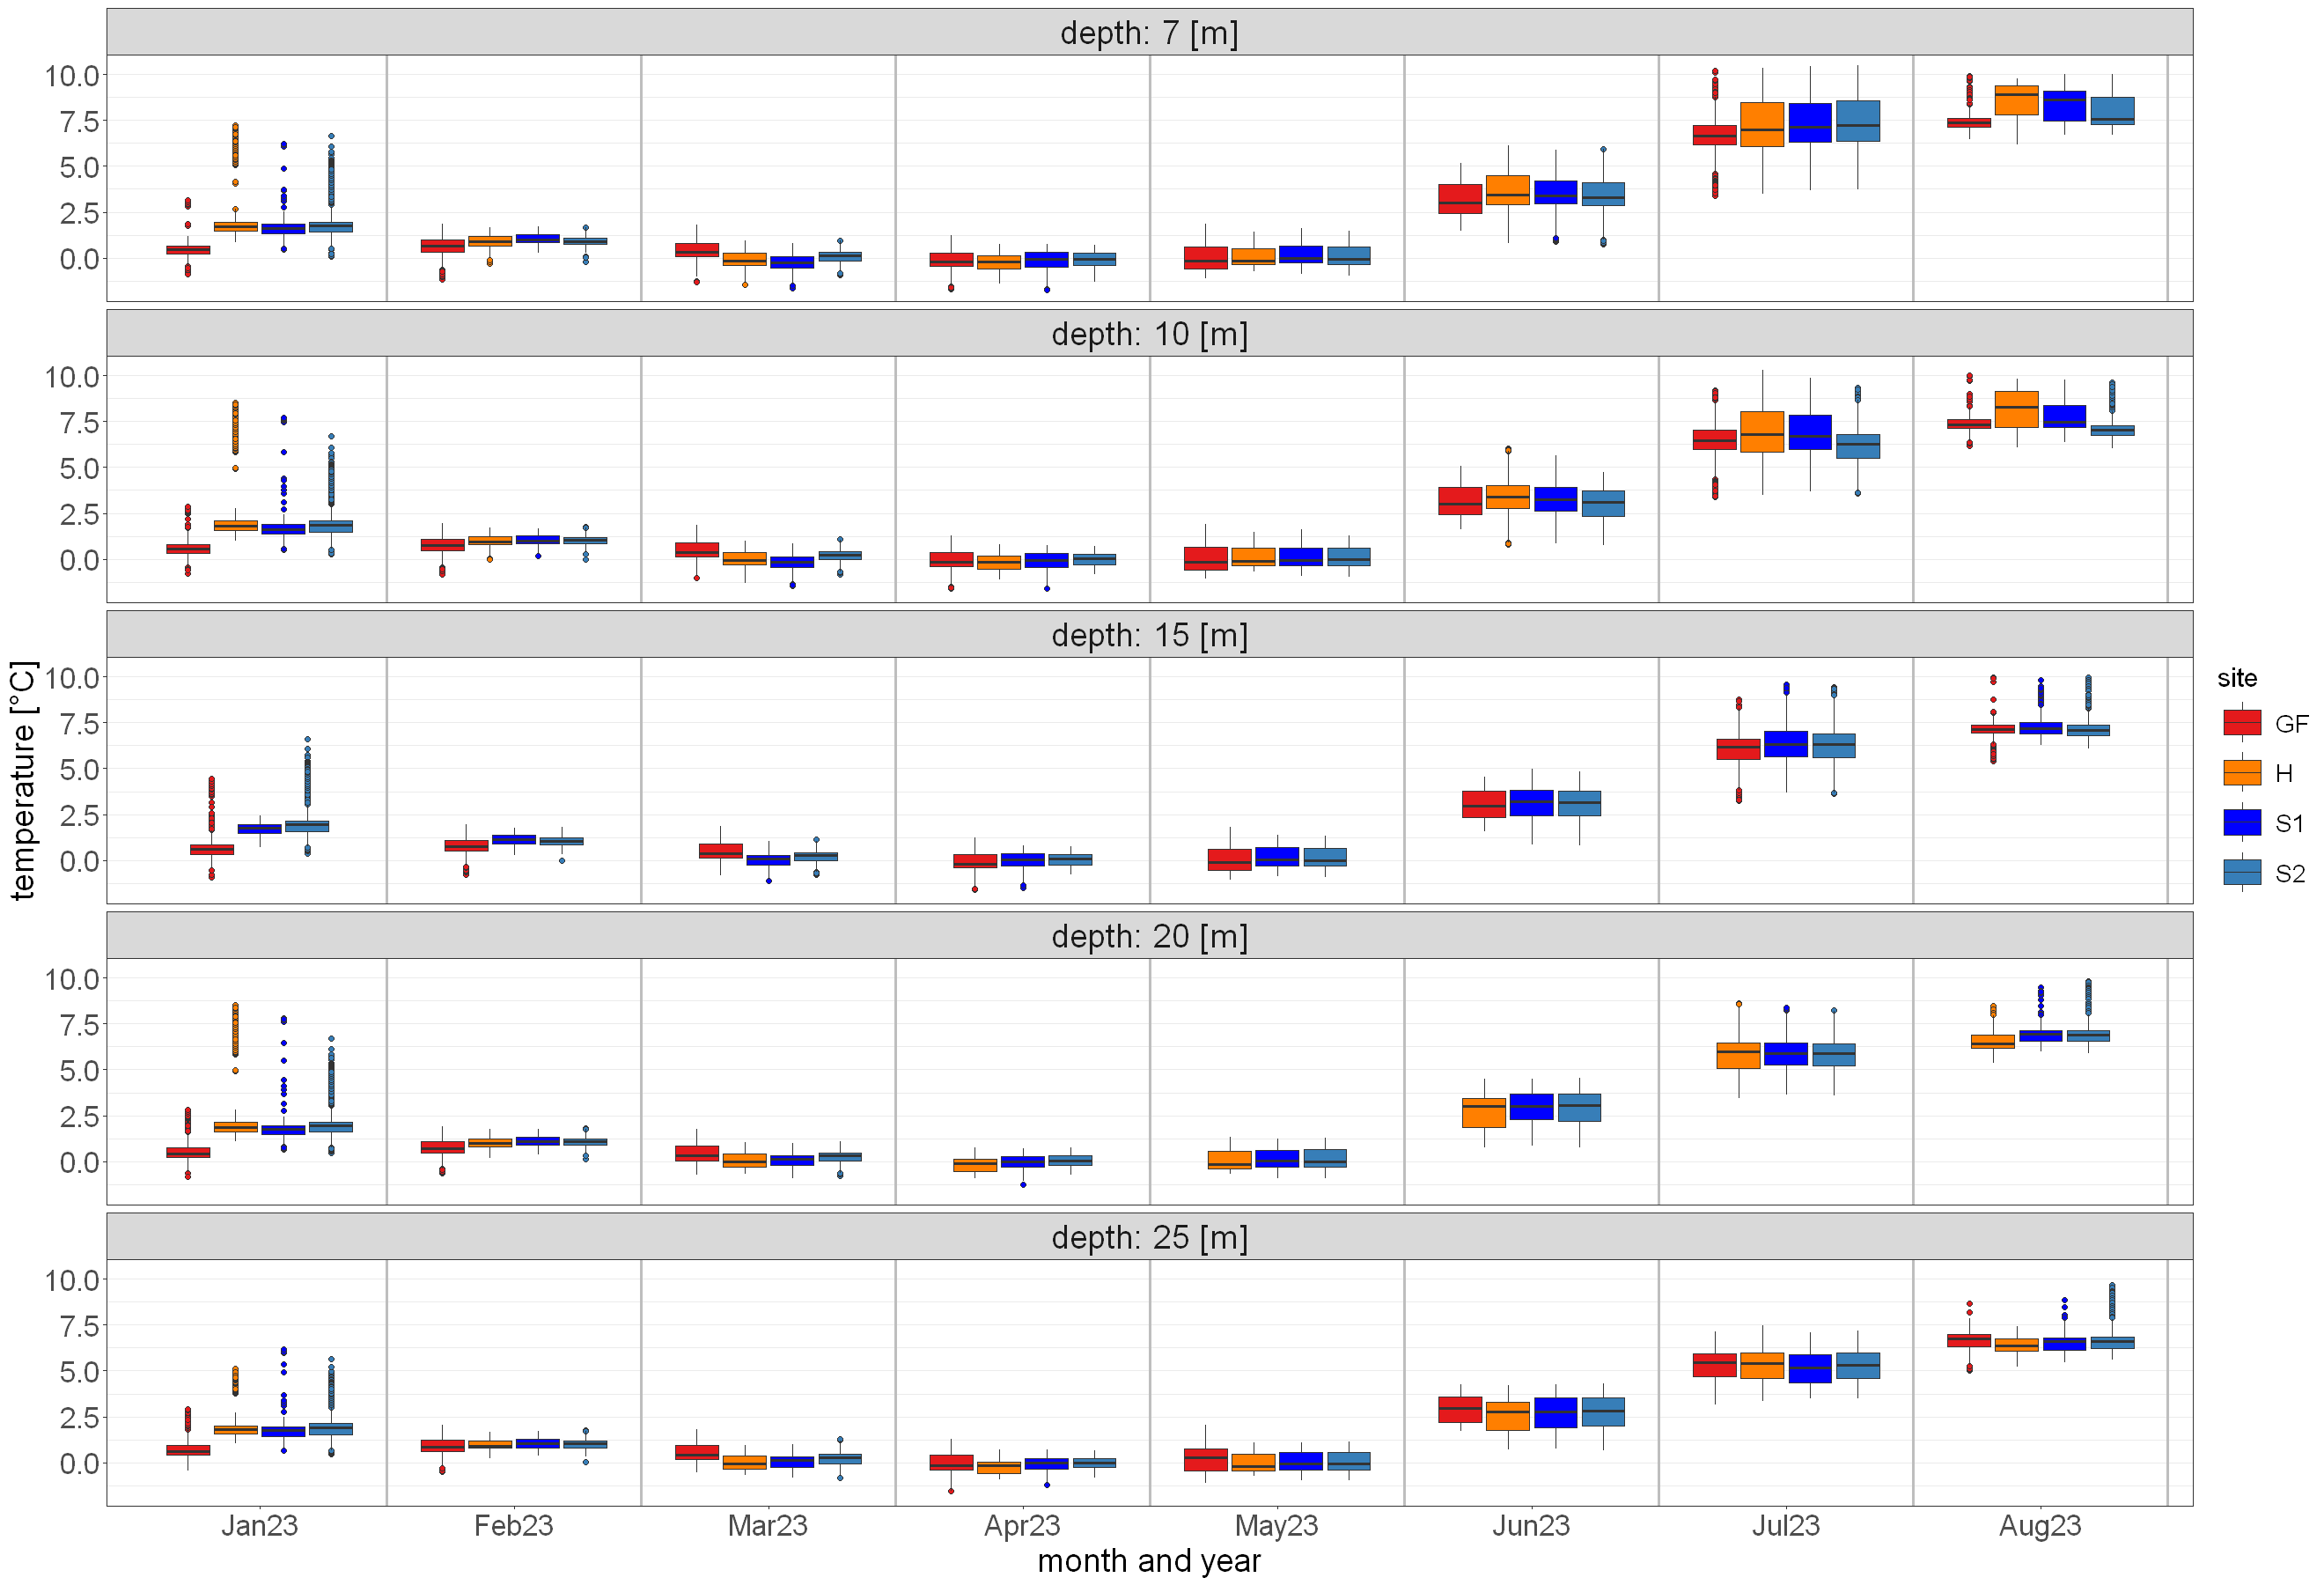

In [25]:
options(repr.plot.height=15,repr.plot.width=22)

tmp.df <- df.chem.merged %>% filter(c1)
tmp.df$m.yr.factor.tmp <- factor(tmp.df$m.yr.factor,levels = lev.c1, ordered = TRUE)
ggplot(tmp.df,
       aes(x=m.yr.factor.tmp,y=get(feat),fill=site)) + geom_boxplot(position = position_dodge2(preserve = "single"),outlier.shape = 21) +            
           scale_fill_manual(values=site.color) +
           facet_wrap(~depth,labeller = label_both,ncol=1) +
# labels set-up
           xlab("month and year") + ylab(feat.label) + scale_x_discrete(drop = FALSE)+
# viz adjustments
           geom_vline(xintercept=seq(1.5, length(levels(tmp.df$w.yr.factor))-0.5, 1),lwd=1, colour="gray") +
           boxplot_theme

if (flag.make.plots) {
    bp.fig <- 1 
    ggsave(paste0(IMG.path,"/boxplots/",feat,"_boxplots",bp.fig,".tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/boxplots/small/",feat,"_boxplots",bp.fig,".jpg"),height = 15, width = 22,dpi = 150)
}

tmp.df <- df.chem.merged %>% filter(c2)
tmp.df$m.yr.factor.tmp <- factor(tmp.df$m.yr.factor,levels = lev.c2, ordered = TRUE)
ggplot(tmp.df ,
       aes(x=m.yr.factor.tmp,y=get(feat),fill=site)) + geom_boxplot(position = position_dodge2(preserve = "single"),outlier.shape = 21) +            
           scale_fill_manual(values=site.color) +
           facet_wrap(~depth,labeller = label_both,ncol=1) + 
# labels set-up
           xlab("month and year") + ylab(feat.label) + scale_x_discrete(drop = FALSE)+
# viz adjustments
           geom_vline(xintercept=seq(1.5, length(levels(tmp.df$w.yr.factor))-0.5, 1),lwd=1, colour="gray") +
           boxplot_theme

if (flag.make.plots) {
    bp.fig <- 2 
    ggsave(paste0(IMG.path,"/boxplots/",feat,"_boxplots",bp.fig,".tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/boxplots/small/",feat,"_boxplots",bp.fig,".jpg"),height = 15, width = 22,dpi = 150)
}

tmp.df <- df.chem.merged %>% filter(c3)
tmp.df$m.yr.factor.tmp <- factor(tmp.df$m.yr.factor,levels = lev.c3, ordered = TRUE)
ggplot(tmp.df,
       aes(x=m.yr.factor.tmp,y=get(feat),fill=site)) + geom_boxplot(position = position_dodge2(preserve = "single"),outlier.shape = 21) +            
           scale_fill_manual(values=site.color) +
           facet_wrap(~depth,labeller = label_both,ncol=1) + 
# labels set-up
           xlab("month and year") + ylab(feat.label) + scale_x_discrete(drop = FALSE)+
# viz adjustments
           geom_vline(xintercept=seq(1.5, length(levels(tmp.df$w.yr.factor))-0.5, 1),lwd=1, colour="gray") +
           boxplot_theme

if (flag.make.plots) {
    bp.fig <- 3 
    ggsave(paste0(IMG.path,"/boxplots/",feat,"_boxplots",bp.fig,".tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/boxplots/small/",feat,"_boxplots",bp.fig,".jpg"),height = 15, width = 22,dpi = 150)
}

### Oxygen

In [26]:
feat.label <- "oxygen [mg/L]"
feat <- "oxygen"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 267900 rows containing non-finite outside the scale range
(`stat_bin()`)."


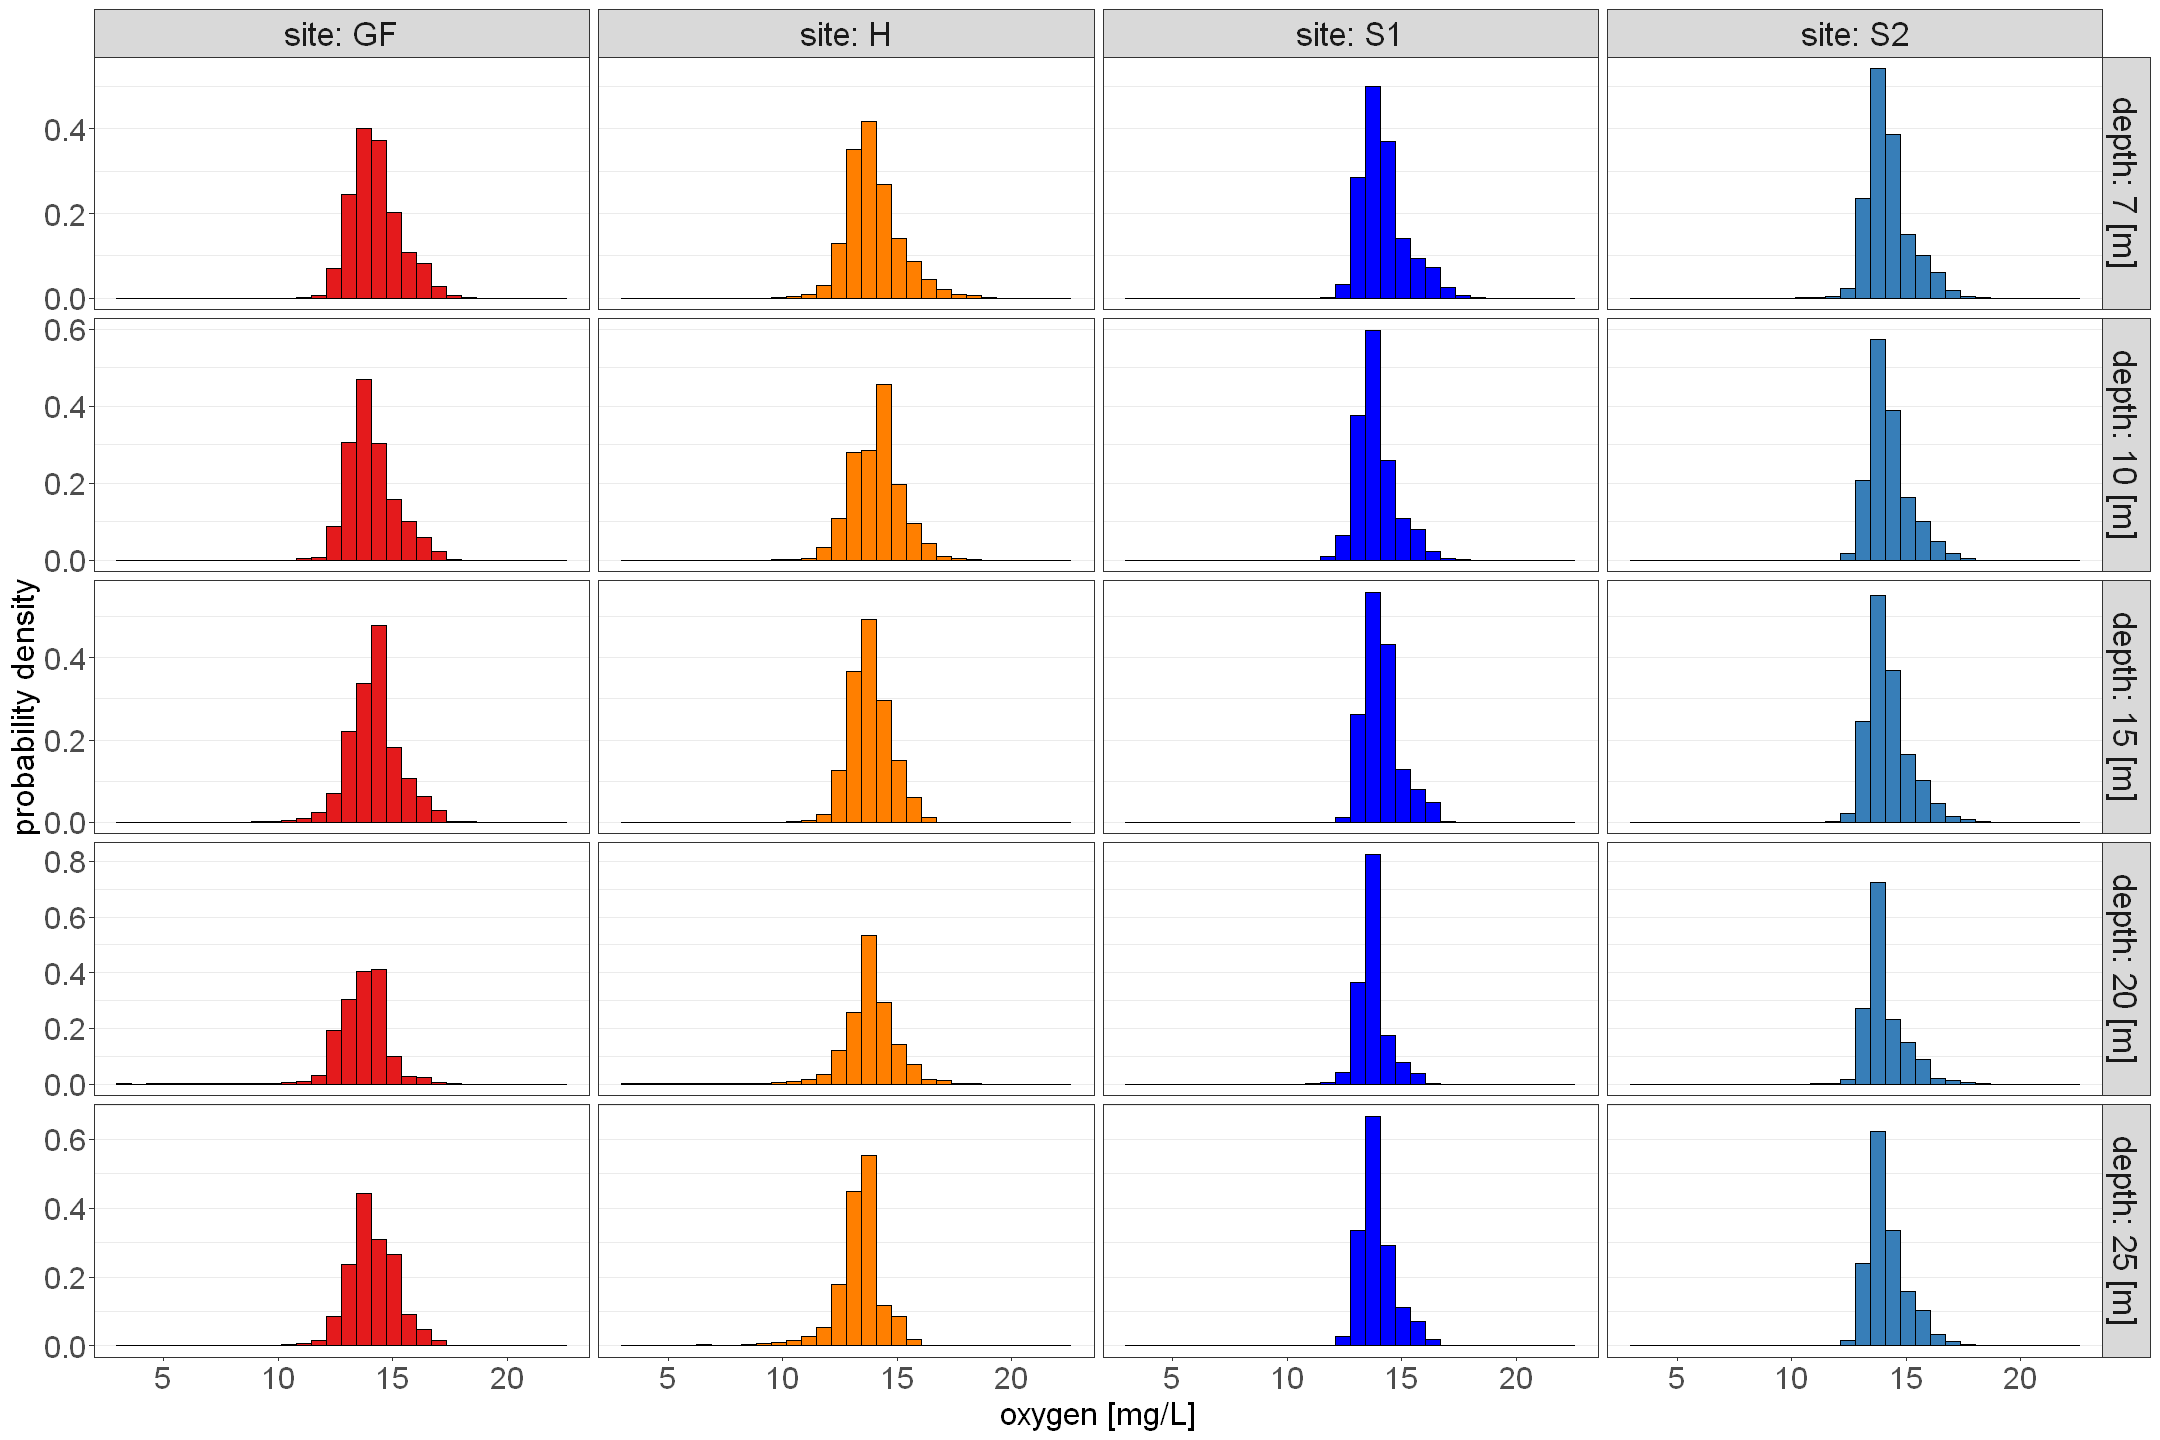

In [27]:
options(repr.plot.width=18,repr.plot.height=12)

ggplot(df.chem.merged ,aes(x=get(feat),y=after_stat(density),fill=site)) + geom_histogram(show.legend = FALSE,col="black") + 
facet_grid(depth~site,labeller = label_both,scale="free_y") +
scale_fill_manual(values=site.color) +
xlab(feat.label) + ylab("probability density")  +
hist_theme

if (flag.make.plots) {
    ggsave(paste0(IMG.path,"/hist/",feat,"_hist.tiff"),height = 12, width = 18,dpi = dpi.opt,compression = "lzw") # TIFF
    ggsave(paste0(IMG.path,"/hist/small/",feat,"_hist.jpg"),height = 12, width = 18,dpi = 150) # JPG
}

`summarise()` has grouped output by 'day', 'site'. You can override using the
`.groups` argument.
Warning message:
"Removed 267900 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 764 rows containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 5569 rows containing missing values or values outside the scale range
(`geom_point()`)."


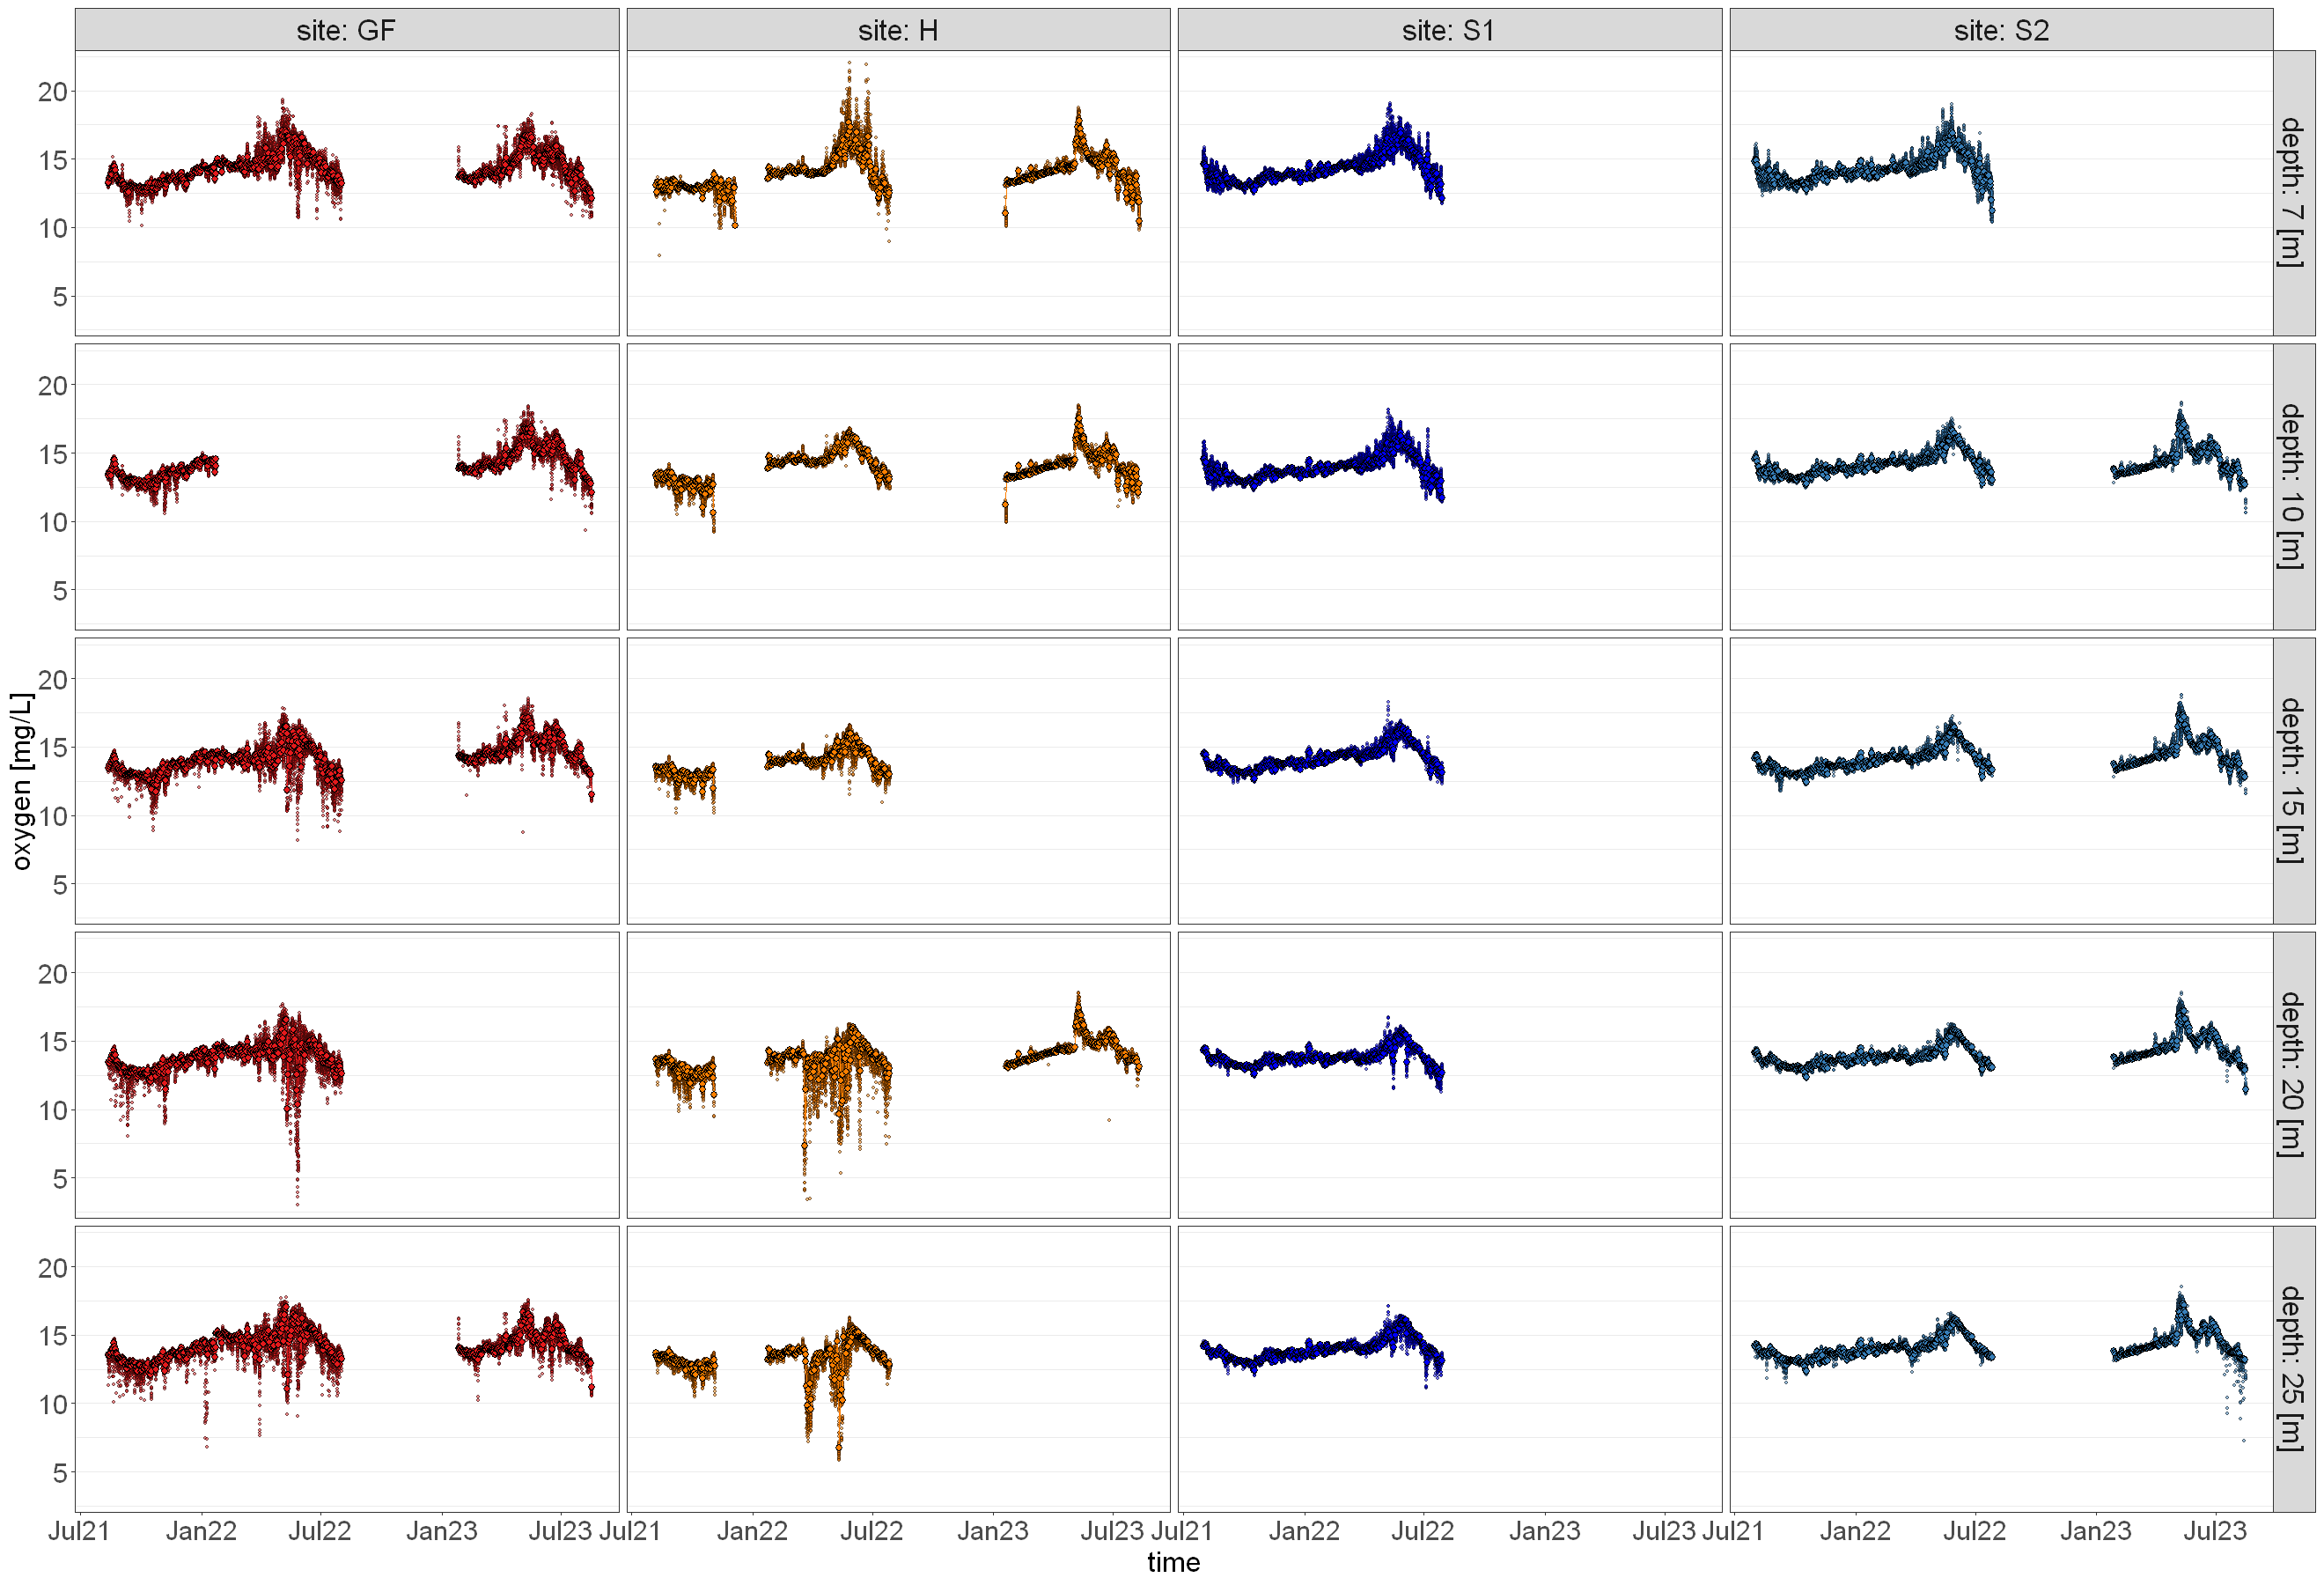

In [28]:
options(repr.plot.height=15,repr.plot.width=22)

df.days <- df.chem.merged %>% 
group_by(day=floor_date(date_time,unit="day"),site,depth) %>% 
summarize(means=mean(get(feat),na.rm = TRUE),medians=median(get(feat),na.rm = TRUE))

ggplot() +
geom_point(aes(x=date_time,y=get(feat),fill=site),data=df.chem.merged,alpha=0.5,shape=21,size=0.7) + 
geom_line(aes(x=day+ddays(0.5),y=medians,col=site),data=df.days,linewidth=0.5) + 
scale_color_manual(values=site.color) +
geom_point(aes(x=day+ddays(0.5),y=medians,fill=site),data=df.days,size=2,shape=21)+
scale_fill_manual(values=site.color) +
ylab(feat.label)+ xlab("time") +facet_grid(depth~site,labeller = label_both) + #,scales = "free" 

scale_x_datetime(date_labels = "%b%y") +

time_series_theme

if (flag.make.plots) {
    ggsave(paste0(IMG.path,"/time_series/",feat,"_time_series_grid.tiff"),height = 12, width = 20,dpi = dpi.opt,compression = "lzw") # TIFF
    ggsave(paste0(IMG.path,"/time_series/small/",feat,"_time_series_grid.jpg"),height = 12, width = 20,dpi = 150) # JPG
}

Warning message:
"Removed 22623 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 144641 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


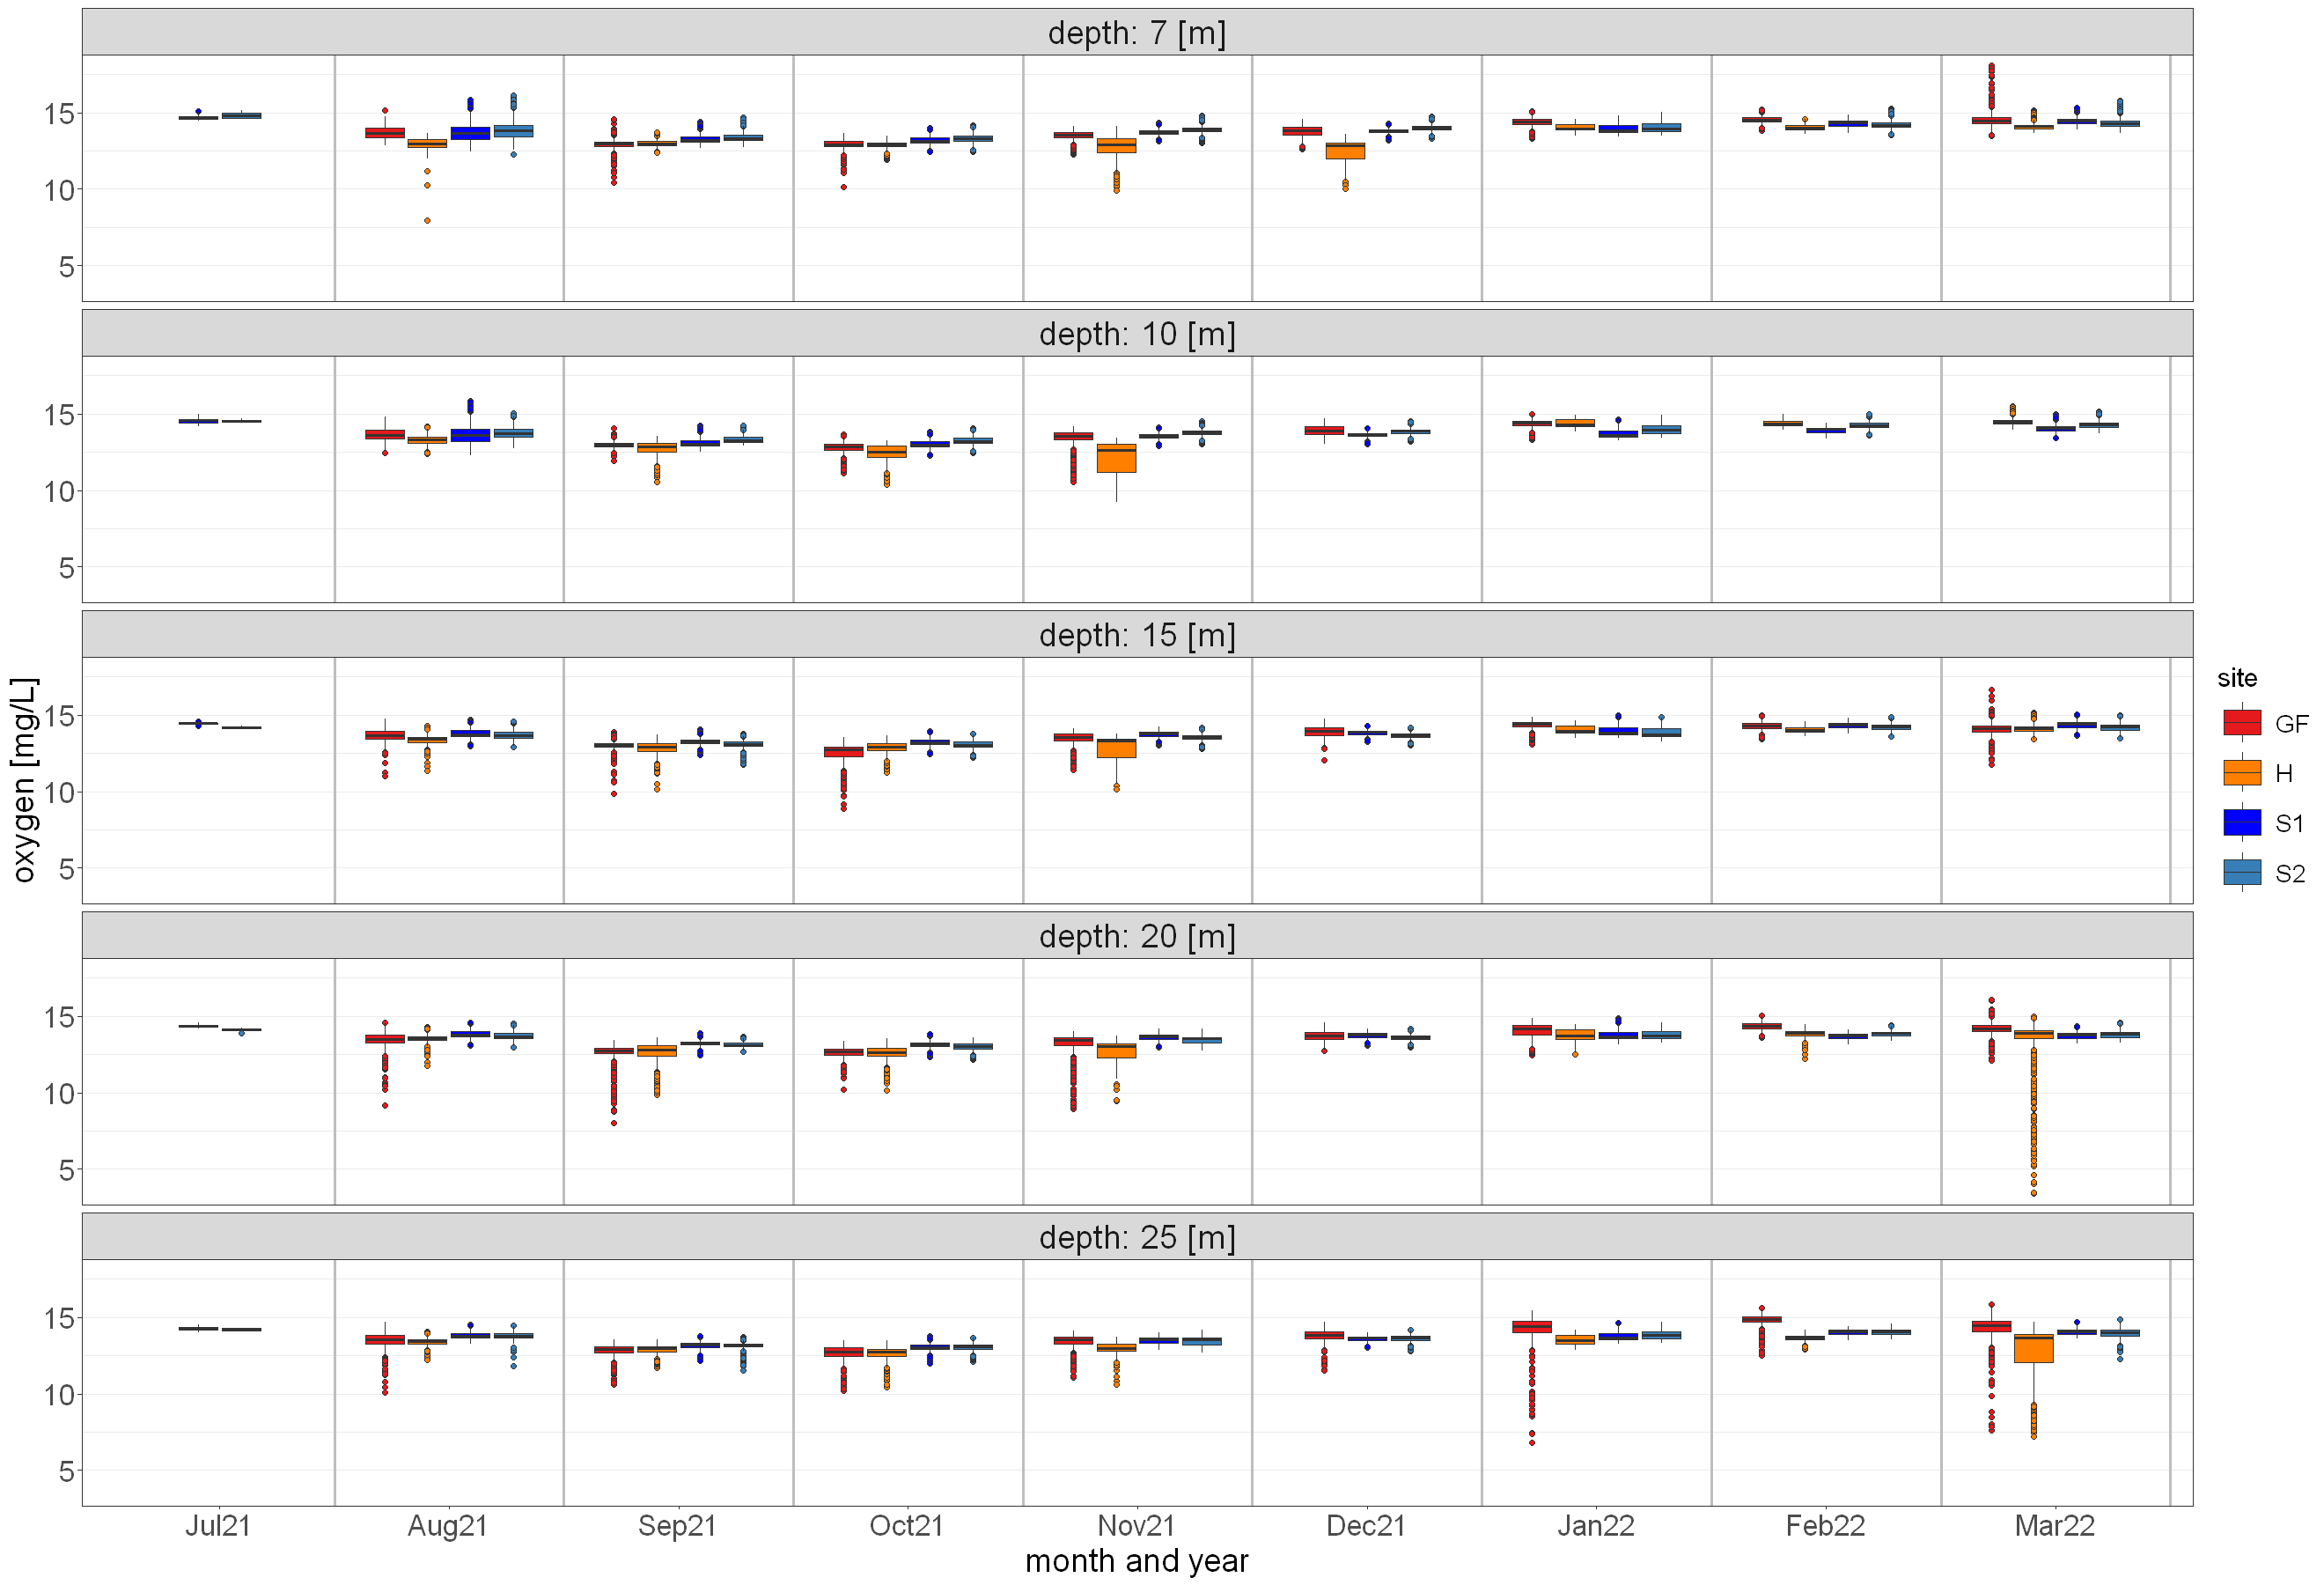

Warning message:
"Removed 100636 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


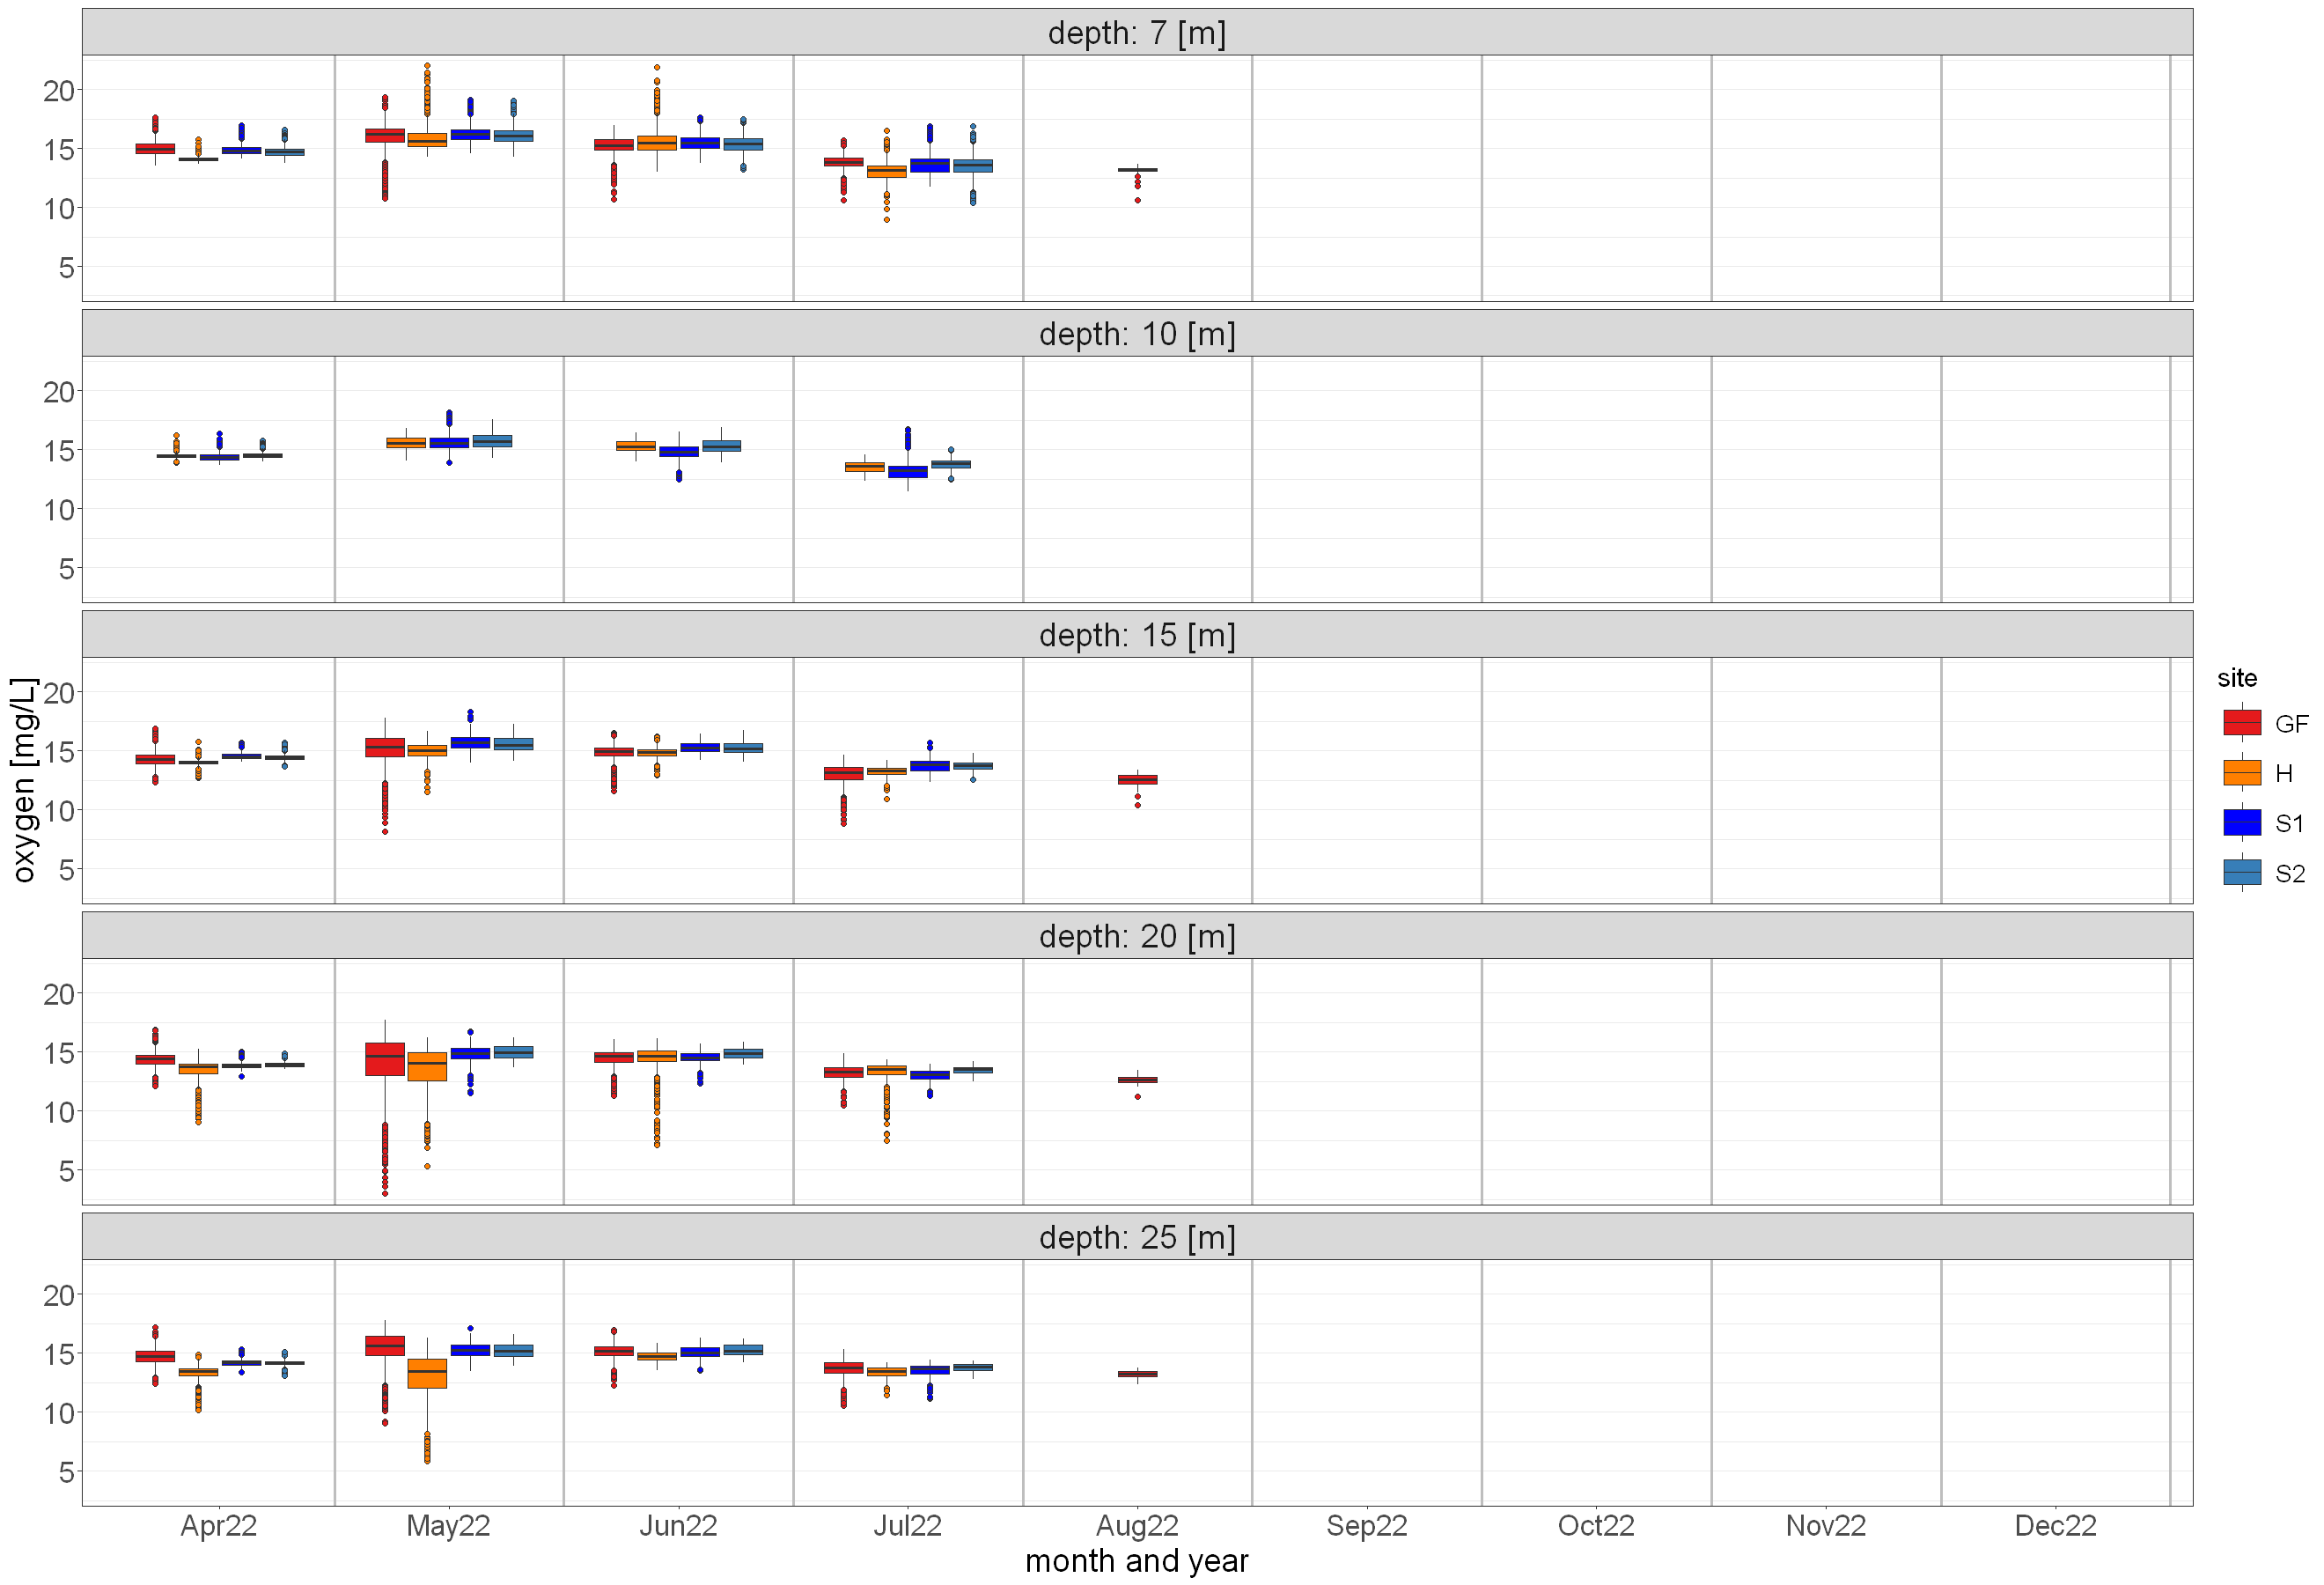

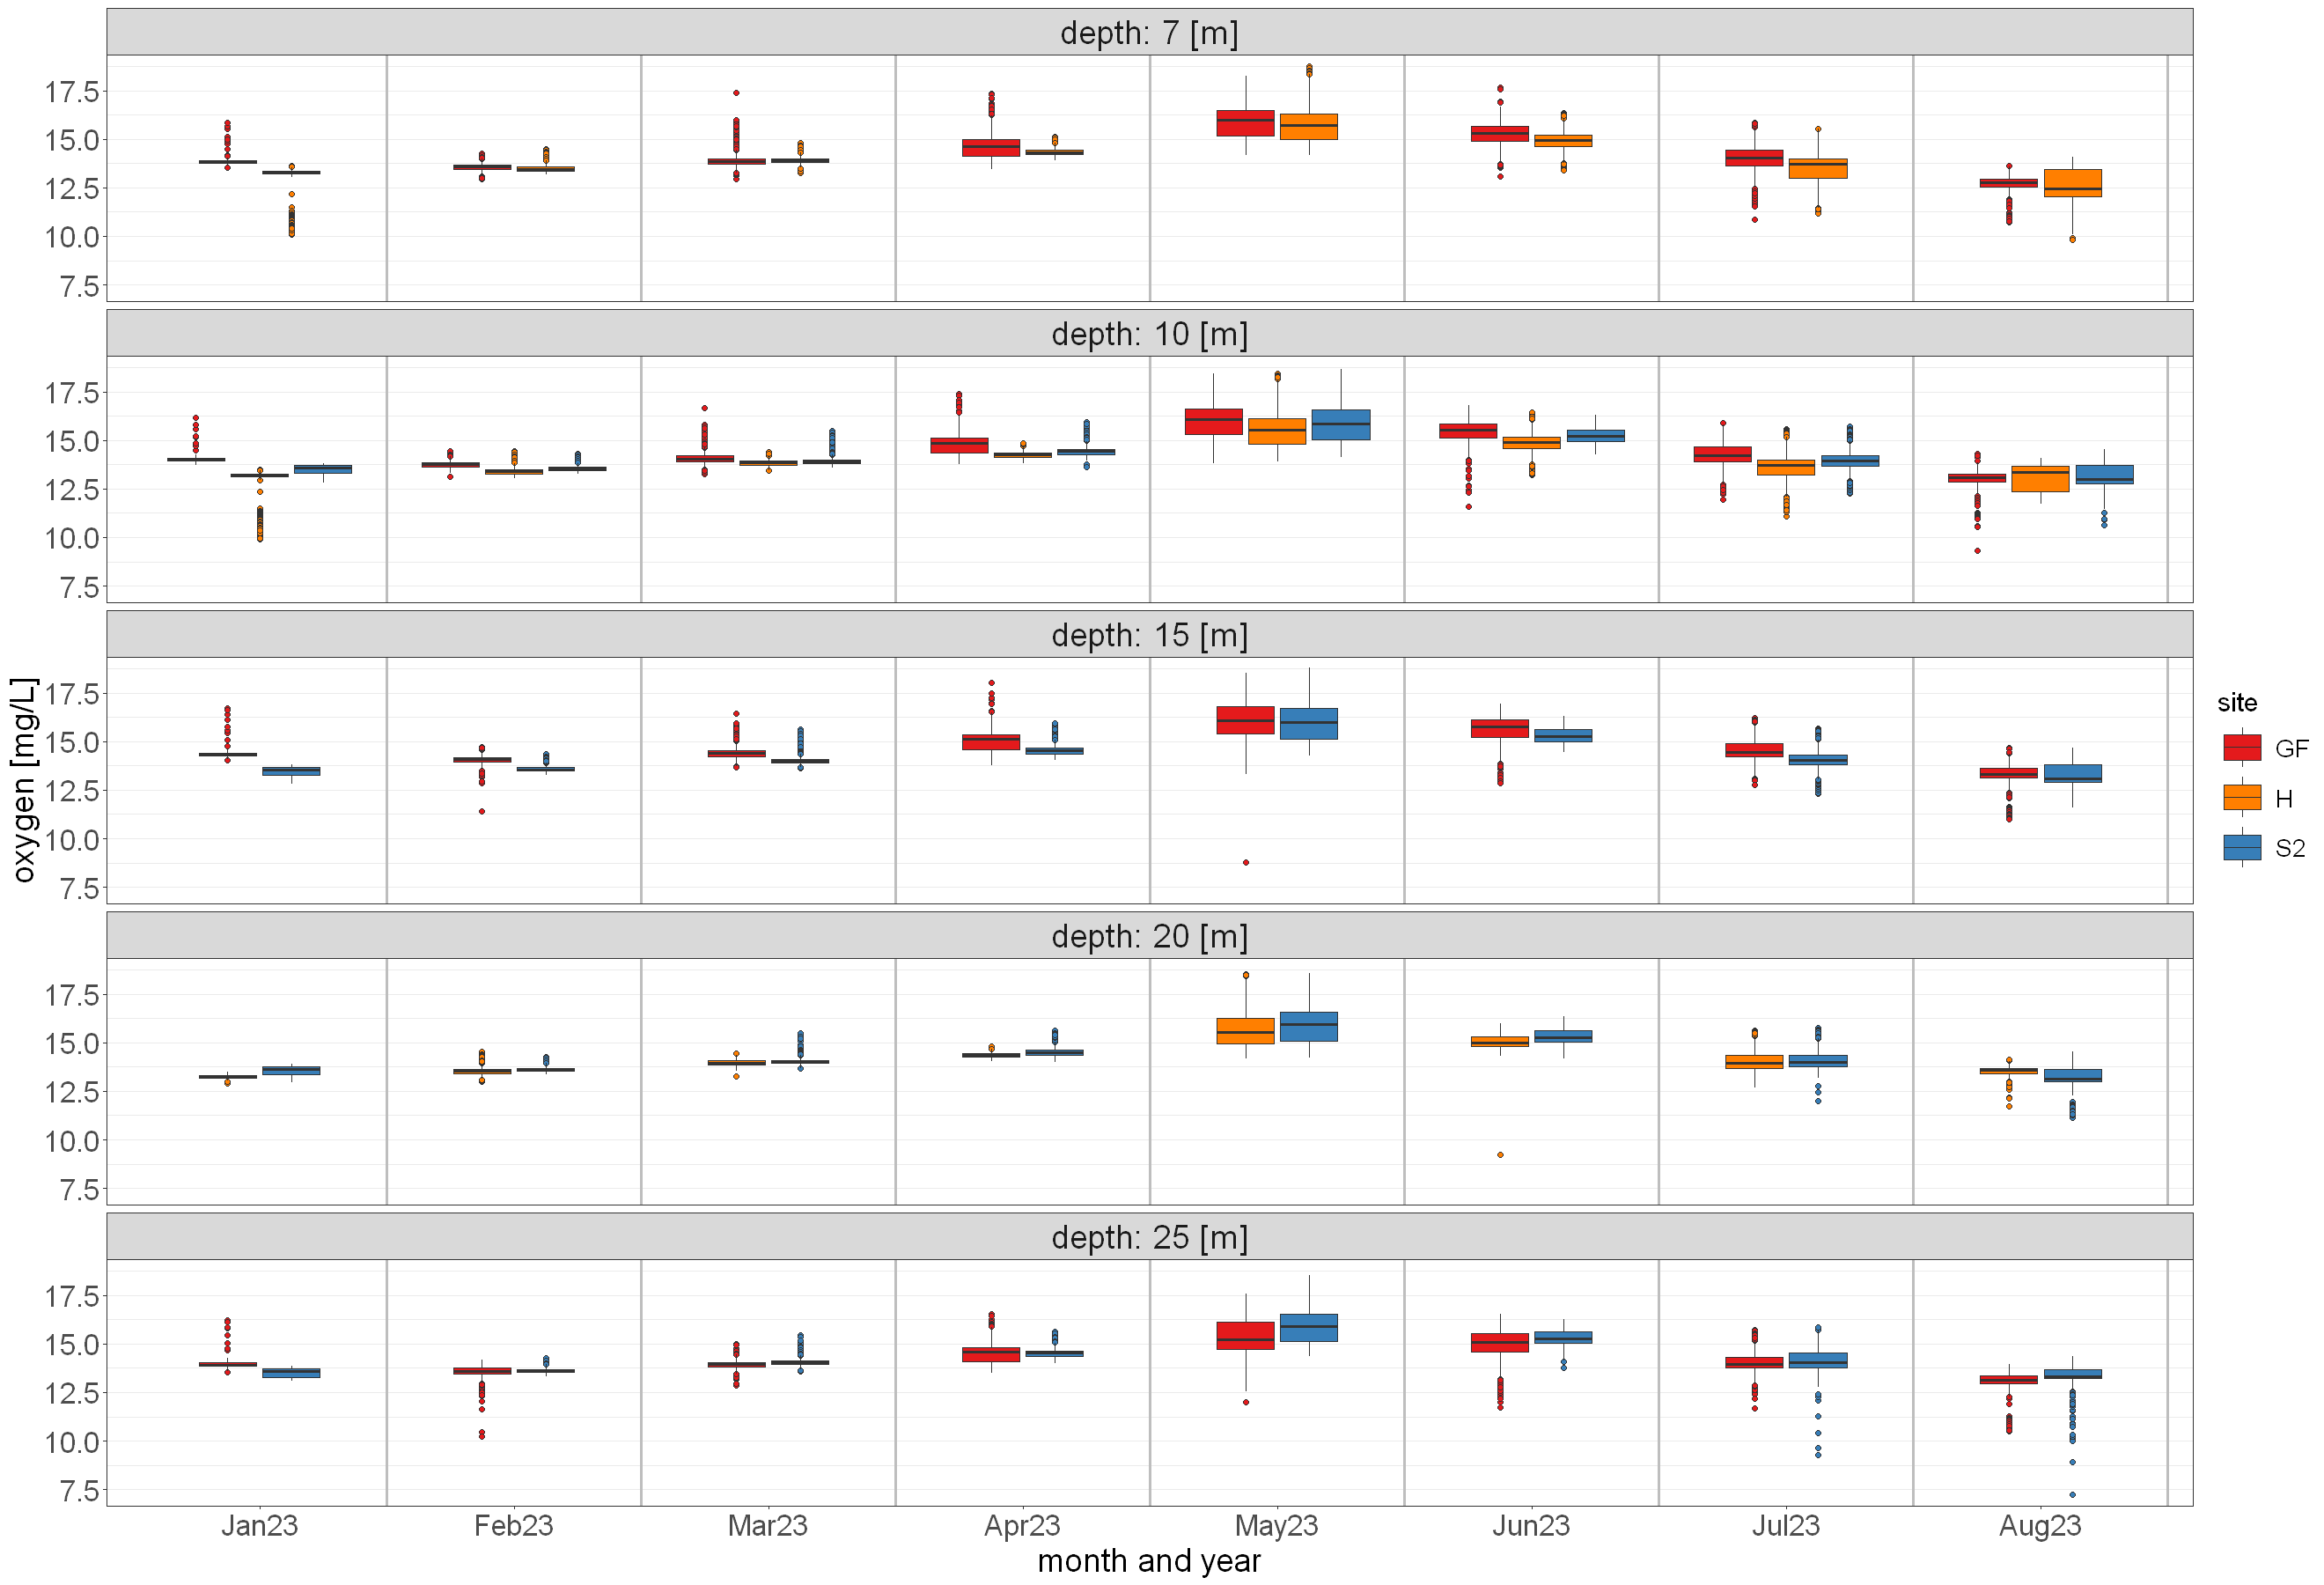

In [29]:
options(repr.plot.height=15,repr.plot.width=22)

tmp.df <- df.chem.merged %>% filter(c1)
tmp.df$m.yr.factor.tmp <- factor(tmp.df$m.yr.factor,levels = lev.c1, ordered = TRUE)
ggplot(tmp.df,
       aes(x=m.yr.factor.tmp,y=get(feat),fill=site)) + geom_boxplot(position = position_dodge2(preserve = "single"),outlier.shape = 21) +            
           scale_fill_manual(values=site.color) +
           facet_wrap(~depth,labeller = label_both,ncol=1) +
# labels set-up
           xlab("month and year") + ylab(feat.label) + scale_x_discrete(drop = FALSE)+
# viz adjustments
           geom_vline(xintercept=seq(1.5, length(levels(tmp.df$w.yr.factor))-0.5, 1),lwd=1, colour="gray") +
           boxplot_theme

if (flag.make.plots) {
    bp.fig <- 1 
    ggsave(paste0(IMG.path,"/boxplots/",feat,"_boxplots",bp.fig,".tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/boxplots/small/",feat,"_boxplots",bp.fig,".jpg"),height = 15, width = 22,dpi = 150)
}

tmp.df <- df.chem.merged %>% filter(c2)
tmp.df$m.yr.factor.tmp <- factor(tmp.df$m.yr.factor,levels = lev.c2, ordered = TRUE)
ggplot(tmp.df ,
       aes(x=m.yr.factor.tmp,y=get(feat),fill=site)) + geom_boxplot(position = position_dodge2(preserve = "single"),outlier.shape = 21) +            
           scale_fill_manual(values=site.color) +
           facet_wrap(~depth,labeller = label_both,ncol=1) + 
# labels set-up
           xlab("month and year") + ylab(feat.label) + scale_x_discrete(drop = FALSE)+
# viz adjustments
           geom_vline(xintercept=seq(1.5, length(levels(tmp.df$w.yr.factor))-0.5, 1),lwd=1, colour="gray") +
           boxplot_theme

if (flag.make.plots) {
    bp.fig <- 2 
    ggsave(paste0(IMG.path,"/boxplots/",feat,"_boxplots",bp.fig,".tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/boxplots/small/",feat,"_boxplots",bp.fig,".jpg"),height = 15, width = 22,dpi = 150)
}

tmp.df <- df.chem.merged %>% filter(c3)
tmp.df$m.yr.factor.tmp <- factor(tmp.df$m.yr.factor,levels = lev.c3, ordered = TRUE)
ggplot(tmp.df,
       aes(x=m.yr.factor.tmp,y=get(feat),fill=site)) + geom_boxplot(position = position_dodge2(preserve = "single"),outlier.shape = 21) +            
           scale_fill_manual(values=site.color) +
           facet_wrap(~depth,labeller = label_both,ncol=1) + 
# labels set-up
           xlab("month and year") + ylab(feat.label) + scale_x_discrete(drop = FALSE)+
# viz adjustments
           geom_vline(xintercept=seq(1.5, length(levels(tmp.df$w.yr.factor))-0.5, 1),lwd=1, colour="gray") +
           boxplot_theme

if (flag.make.plots) {
    bp.fig <- 3 
    ggsave(paste0(IMG.path,"/boxplots/",feat,"_boxplots",bp.fig,".tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/boxplots/small/",feat,"_boxplots",bp.fig,".jpg"),height = 15, width = 22,dpi = 150)
}

### Light

In [30]:
feat.label <- "light [lux]"
feat <- "light"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


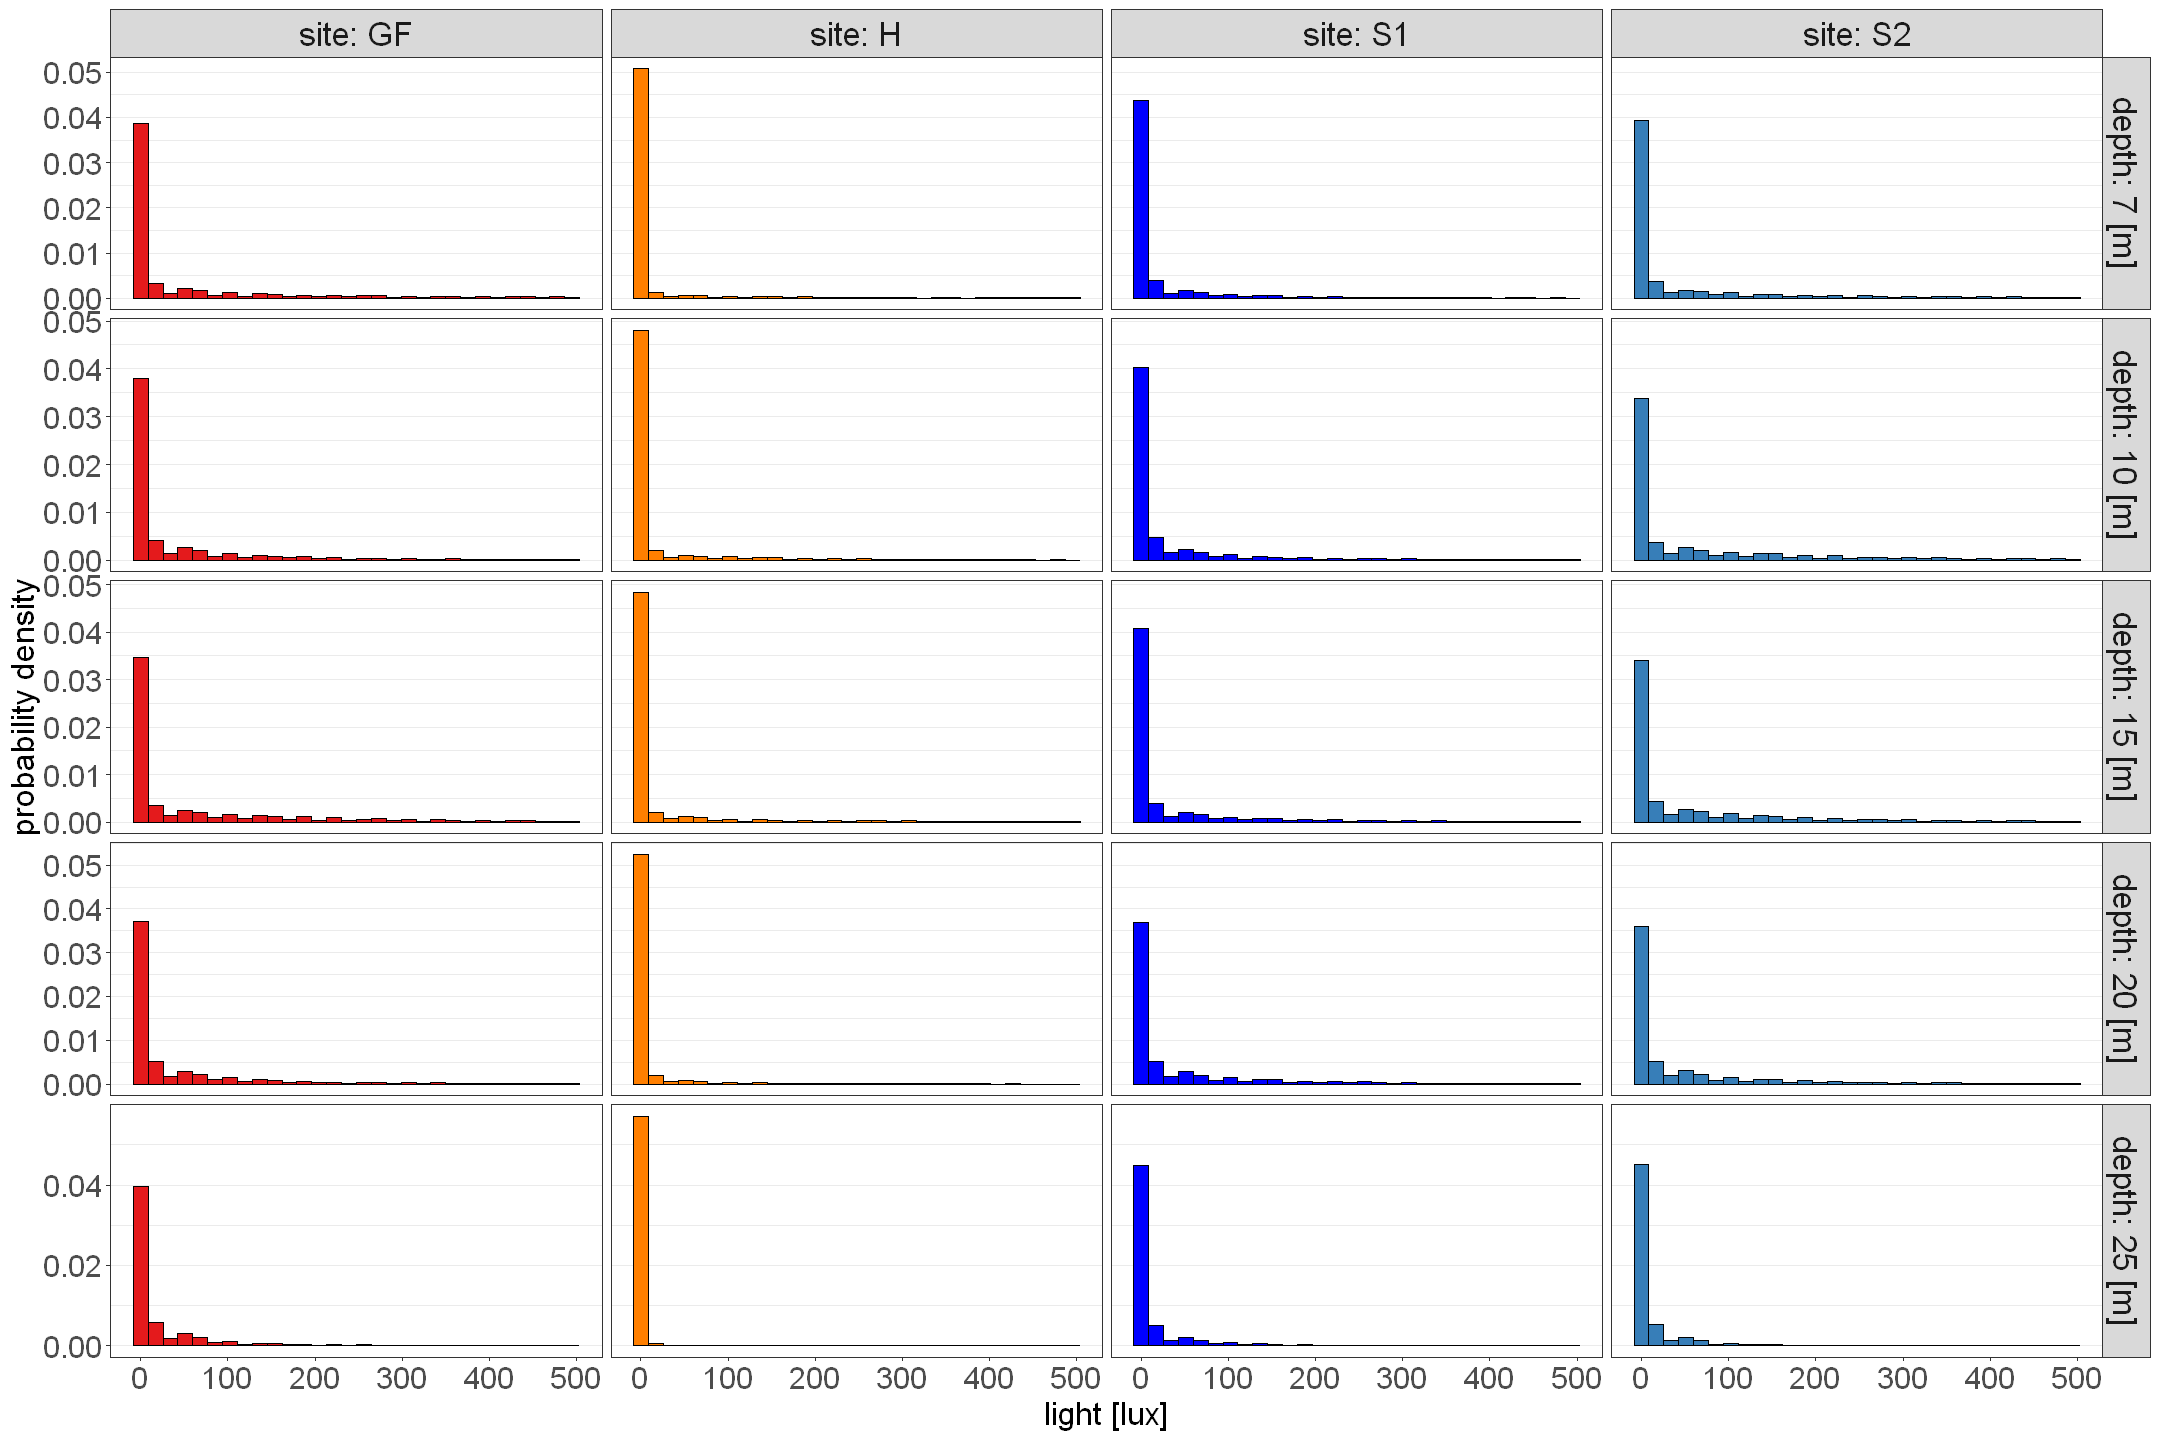

In [31]:
options(repr.plot.width=18,repr.plot.height=12)

ggplot(df.chem.merged %>% filter(get(feat) <= 500),aes(x=get(feat),y=after_stat(density),fill=site)) + geom_histogram(show.legend = FALSE,col="black") + 
facet_grid(depth~site,labeller = label_both,scale="free_y") +
scale_fill_manual(values=site.color) +
xlab(feat.label) + ylab("probability density")  + 
hist_theme

if (flag.make.plots) {
    ggsave(paste0(IMG.path,"/hist/",feat,"_hist.tiff"),height = 12, width = 18,dpi = dpi.opt,compression = "lzw") # TIFF
    ggsave(paste0(IMG.path,"/hist/small/",feat,"_hist.jpg"),height = 12, width = 18,dpi = 150) # JPG
}

#### Histogram for data with removed zeros

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


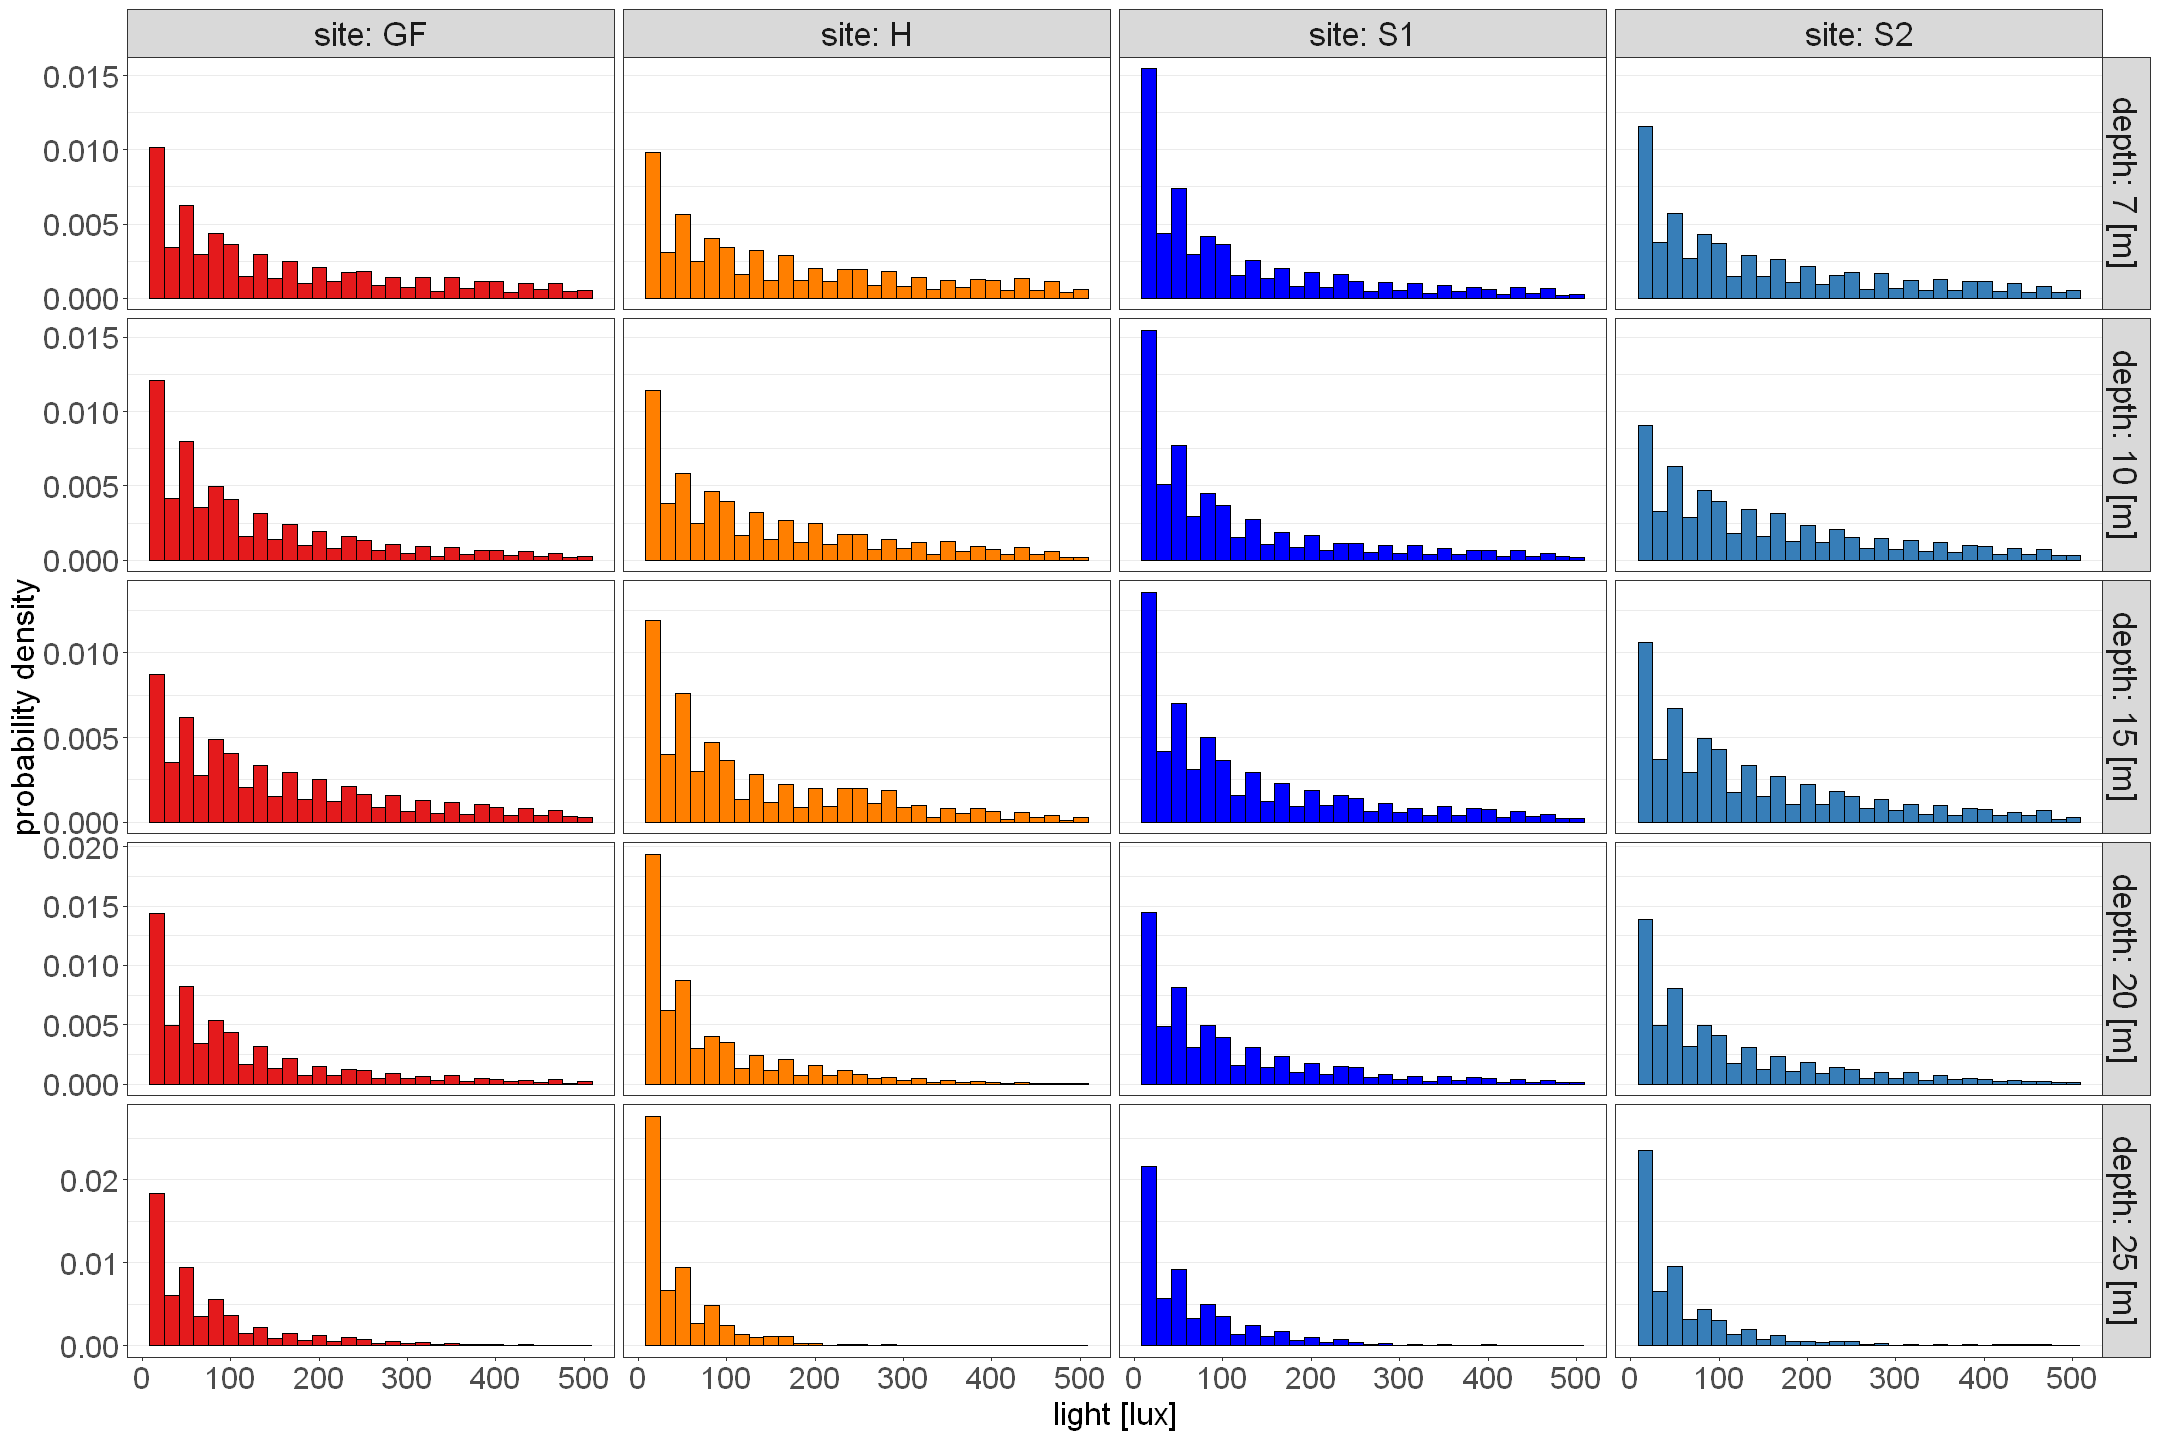

In [32]:
options(repr.plot.width=18,repr.plot.height=12)

ggplot(df.chem.merged %>% filter(get(feat)>0 & get(feat) <= 500),aes(x=get(feat),y=after_stat(density),fill=site)) + geom_histogram(show.legend = FALSE,col="black") + 
facet_grid(depth~site,labeller = label_both,scale="free_y") +
scale_fill_manual(values=site.color) +
xlab(feat.label) + ylab("probability density")  + 
hist_theme

if (flag.make.plots) {
   # ggsave(paste0(IMG.path,"/hist/",feat,"_hist.tiff"),height = 12, width = 18,dpi = dpi.opt,compression = "lzw") # TIFF
   # ggsave(paste0(IMG.path,"/hist/small/",feat,"_hist.jpg"),height = 12, width = 18,dpi = 150) # JPG
}

`summarise()` has grouped output by 'day', 'site'. You can override using the
`.groups` argument.
Warning message:
"Removed 37178 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 3 rows containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 770 rows containing missing values or values outside the scale range
(`geom_point()`)."


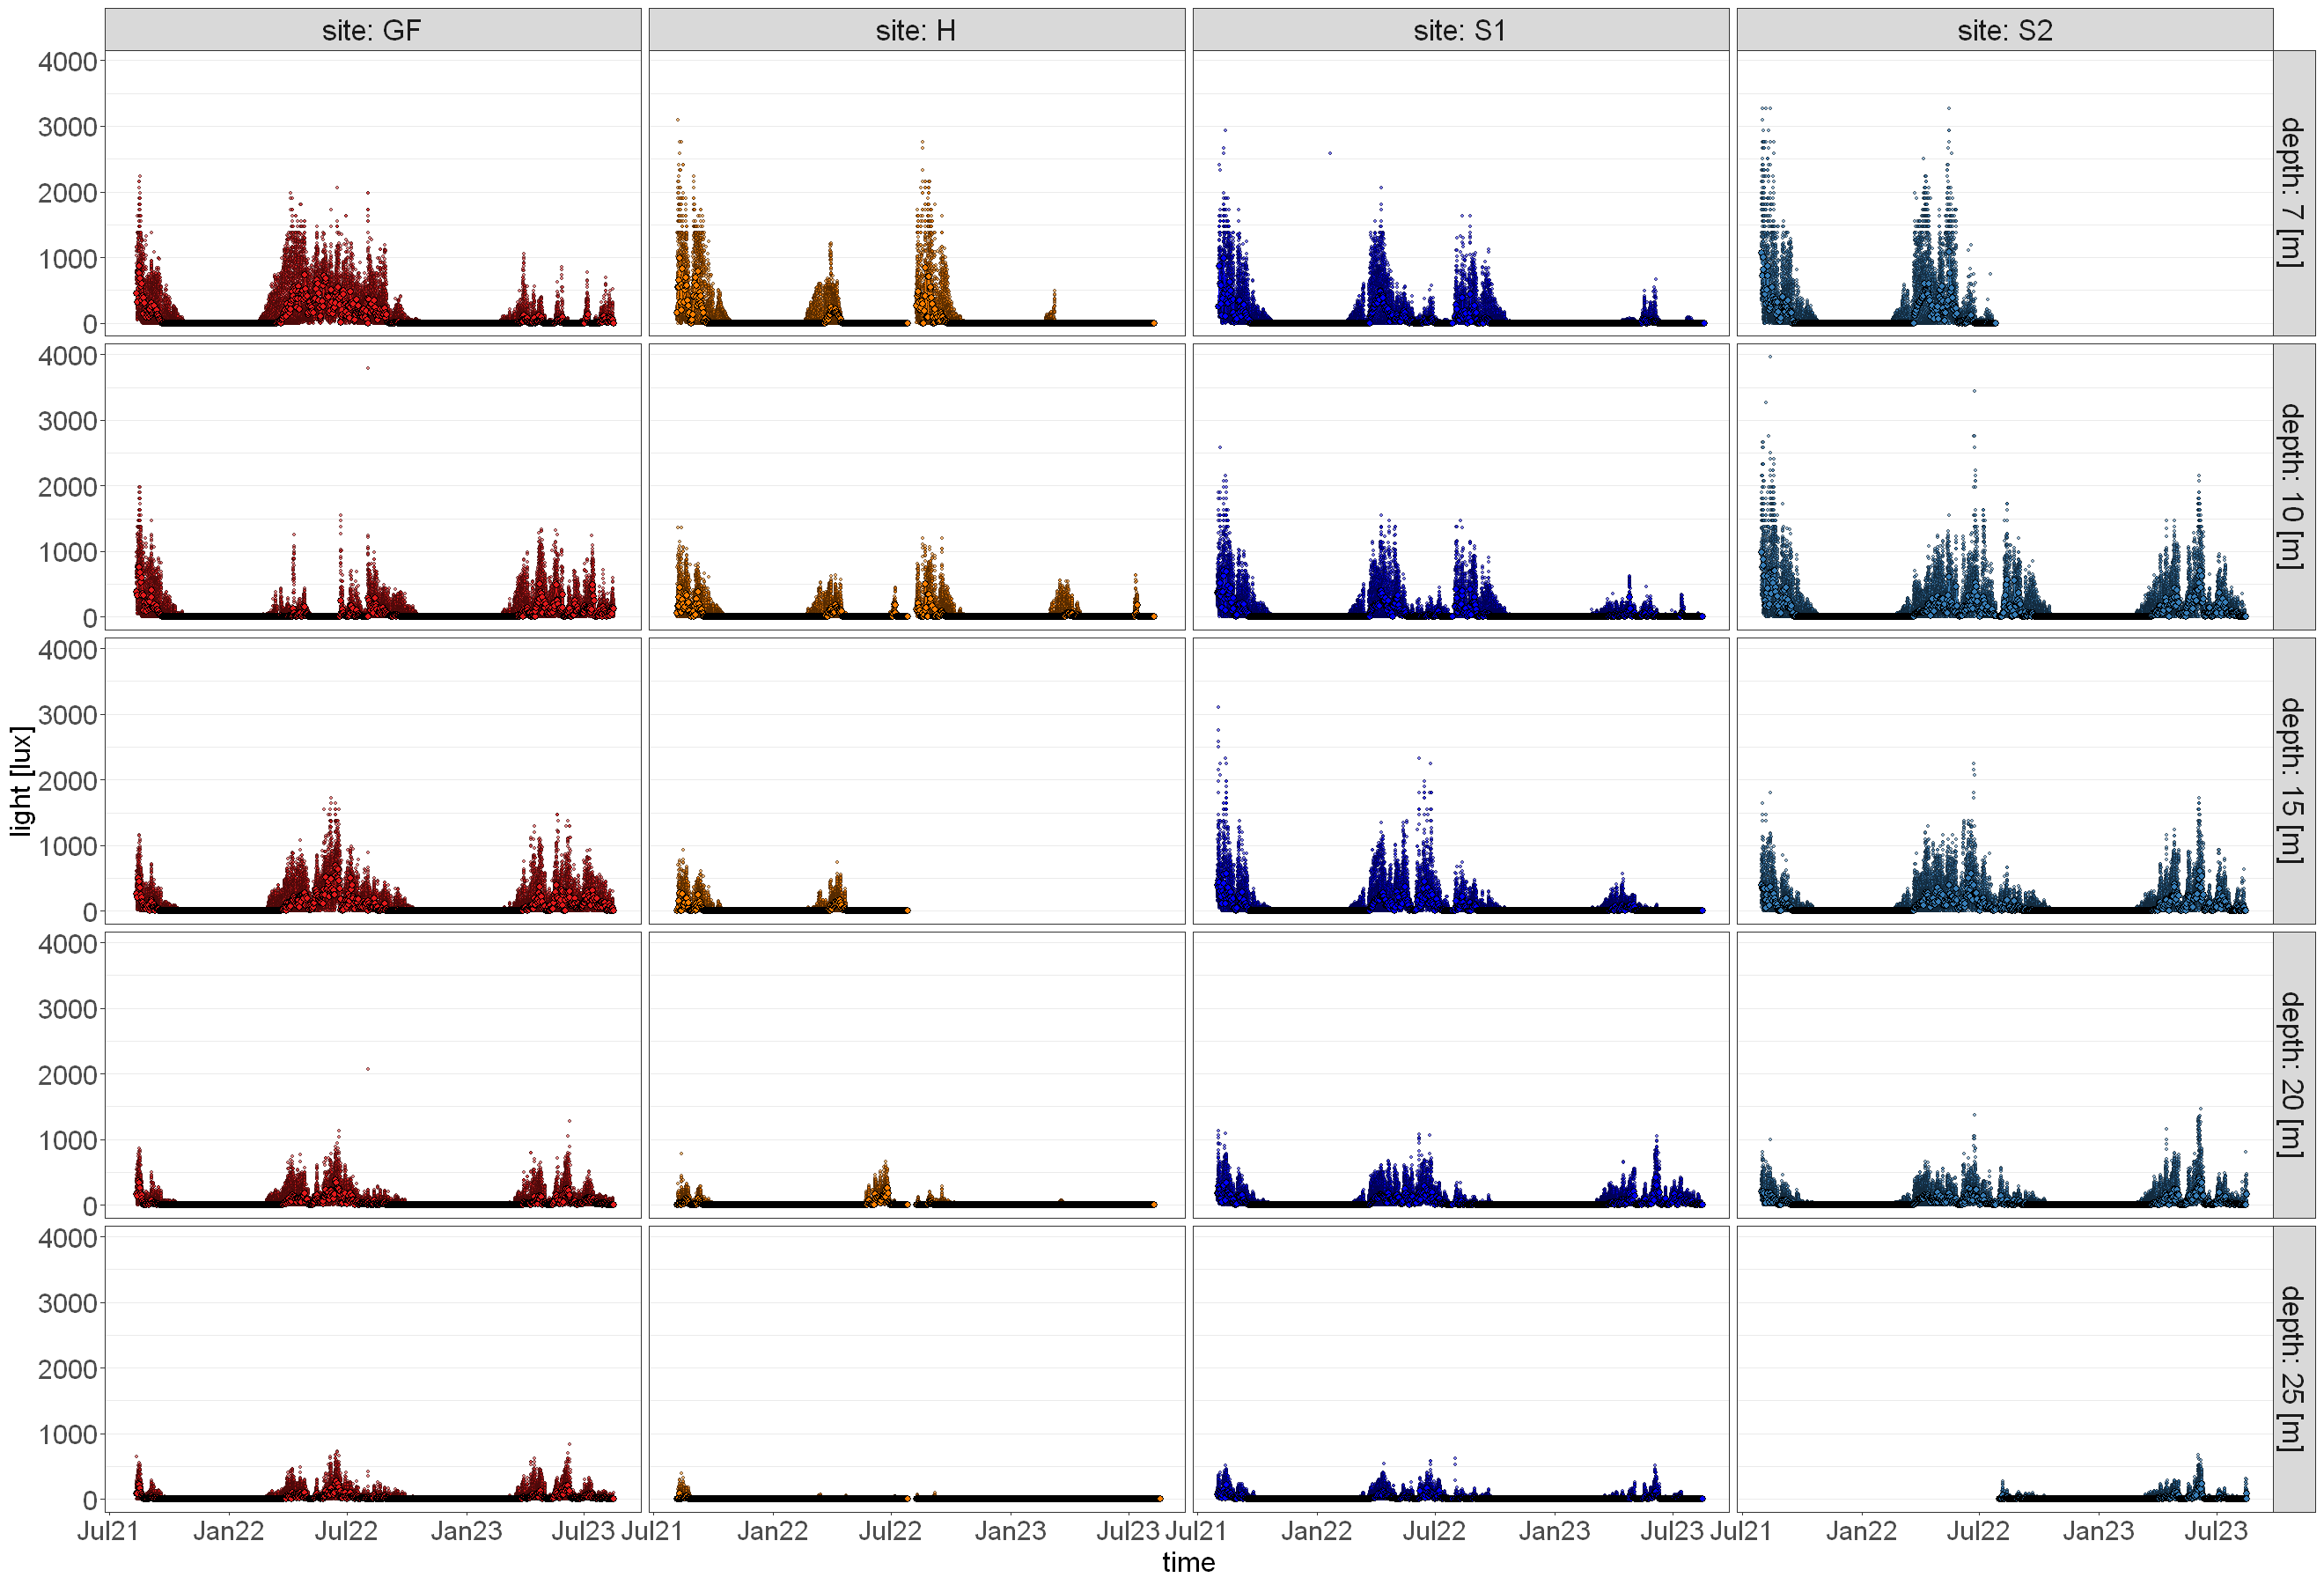

In [33]:
options(repr.plot.height=15,repr.plot.width=22)

df.days <- df.chem.merged %>% 
group_by(day=floor_date(date_time,unit="day"),site,depth) %>% 
summarize(means=mean(get(feat),na.rm = TRUE),medians=median(get(feat),na.rm = TRUE))

ggplot() +
geom_point(aes(x=date_time,y=get(feat),fill=site),data=df.chem.merged,alpha=0.5,shape=21,size=0.7) + 
geom_line(aes(x=day+ddays(0.5),y=medians,col=site),data=df.days,linewidth=0.5) + 
scale_color_manual(values=site.color) +
geom_point(aes(x=day+ddays(0.5),y=medians,fill=site),data=df.days,size=2,shape=21)+
scale_fill_manual(values=site.color) +
ylab(feat.label)+ xlab("time") +facet_grid(depth~site,labeller = label_both) + #,scales = "free" 

scale_x_datetime(date_labels = "%b%y") +

time_series_theme

if (flag.make.plots) {
    ggsave(paste0(IMG.path,"/time_series/",feat,"_time_series_grid.tiff"),height = 12, width = 20,dpi = dpi.opt,compression = "lzw") # TIFF
    ggsave(paste0(IMG.path,"/time_series/small/",feat,"_time_series_grid.jpg"),height = 12, width = 20,dpi = 150) # JPG
}

Warning message:
"Removed 11840 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 13777 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


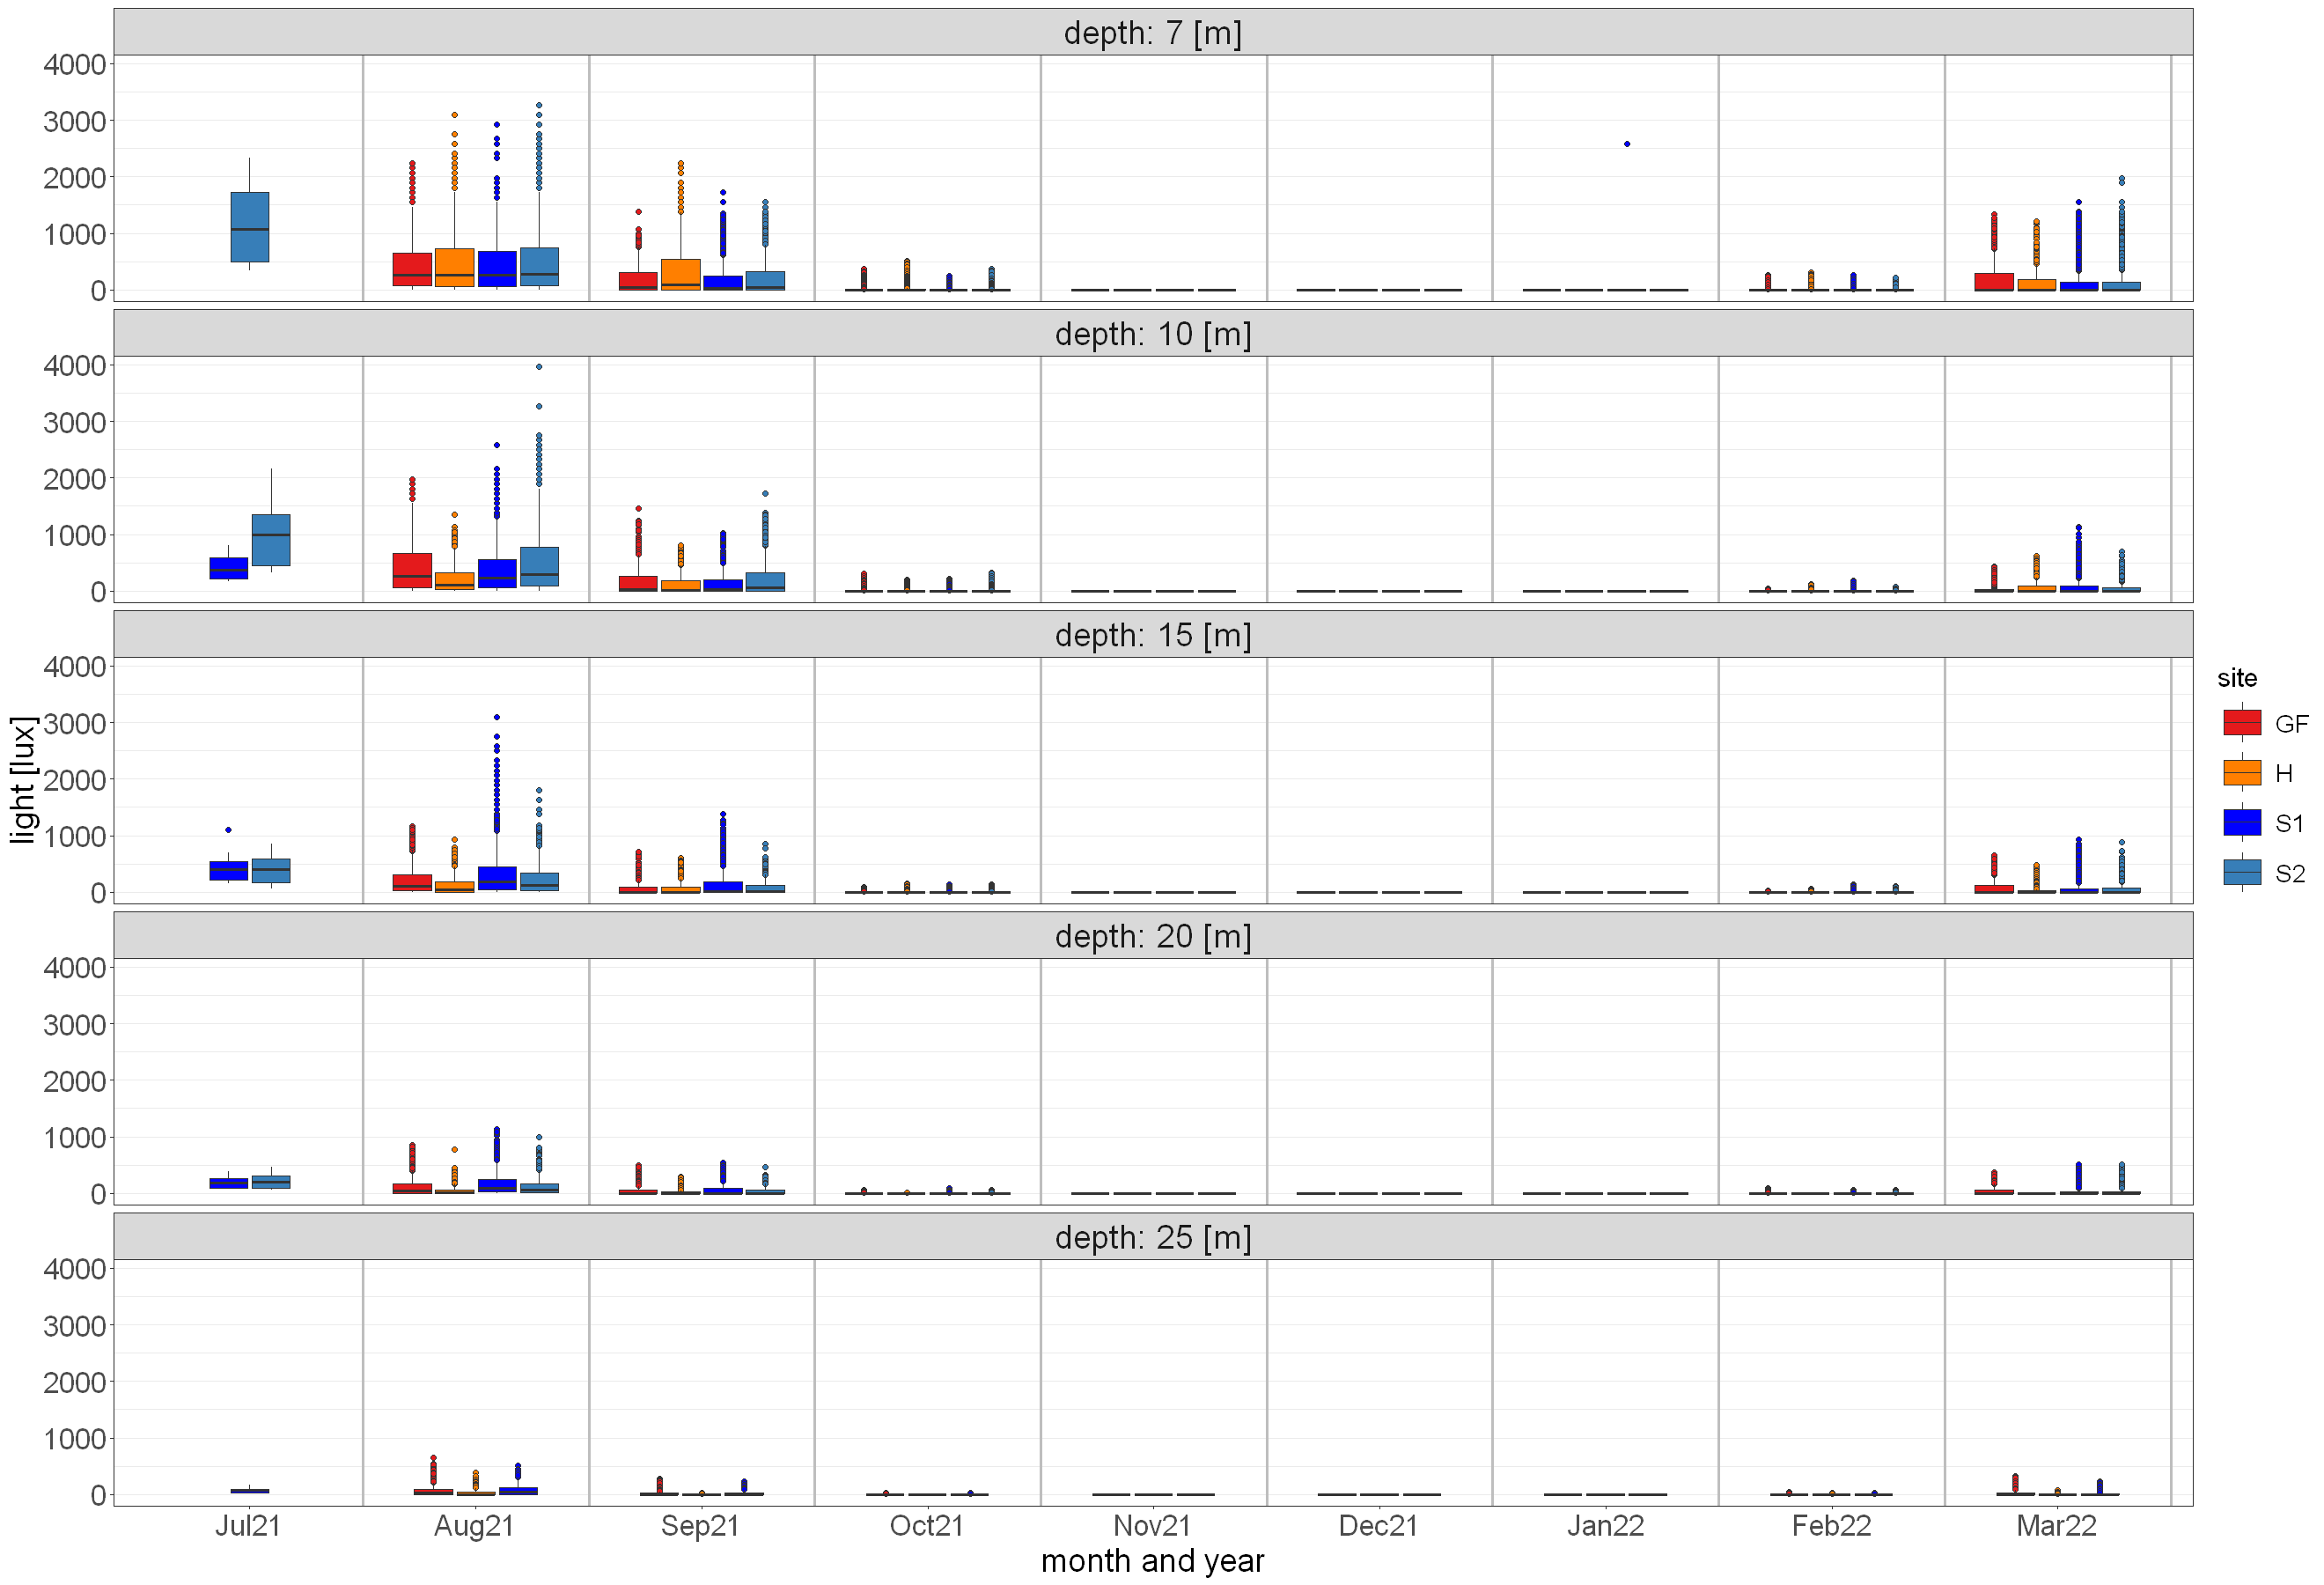

Warning message:
"Removed 11561 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


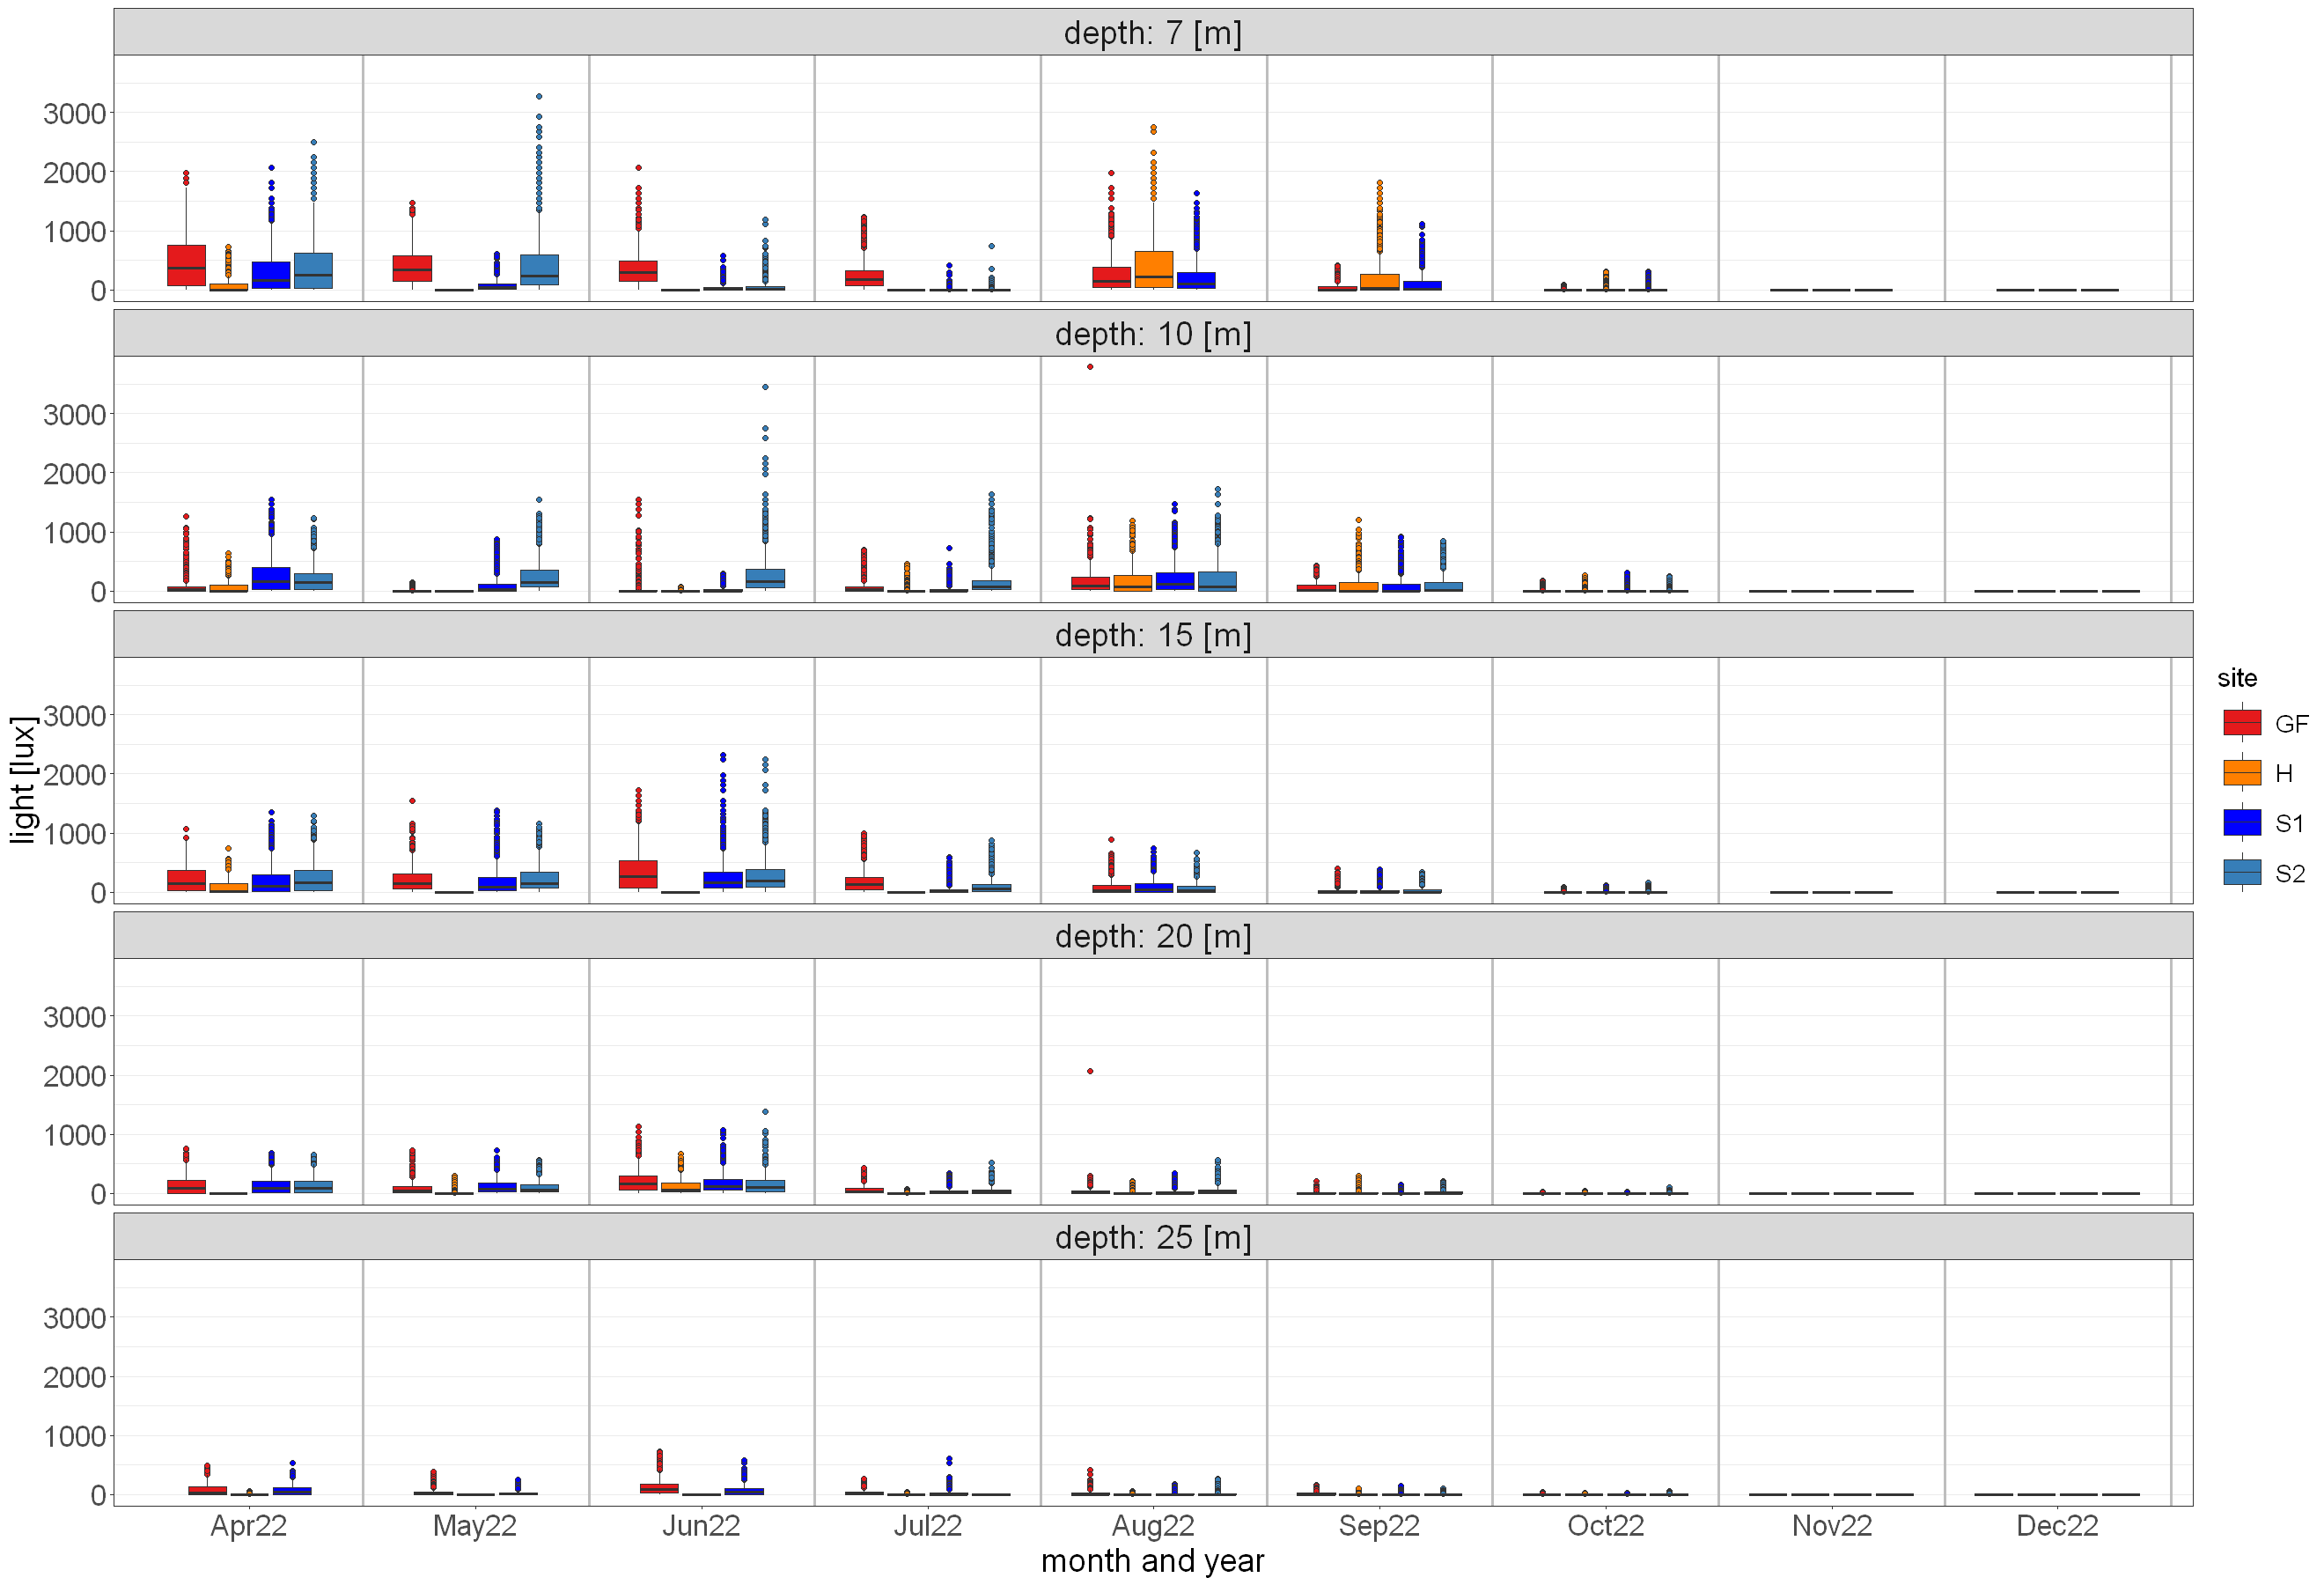

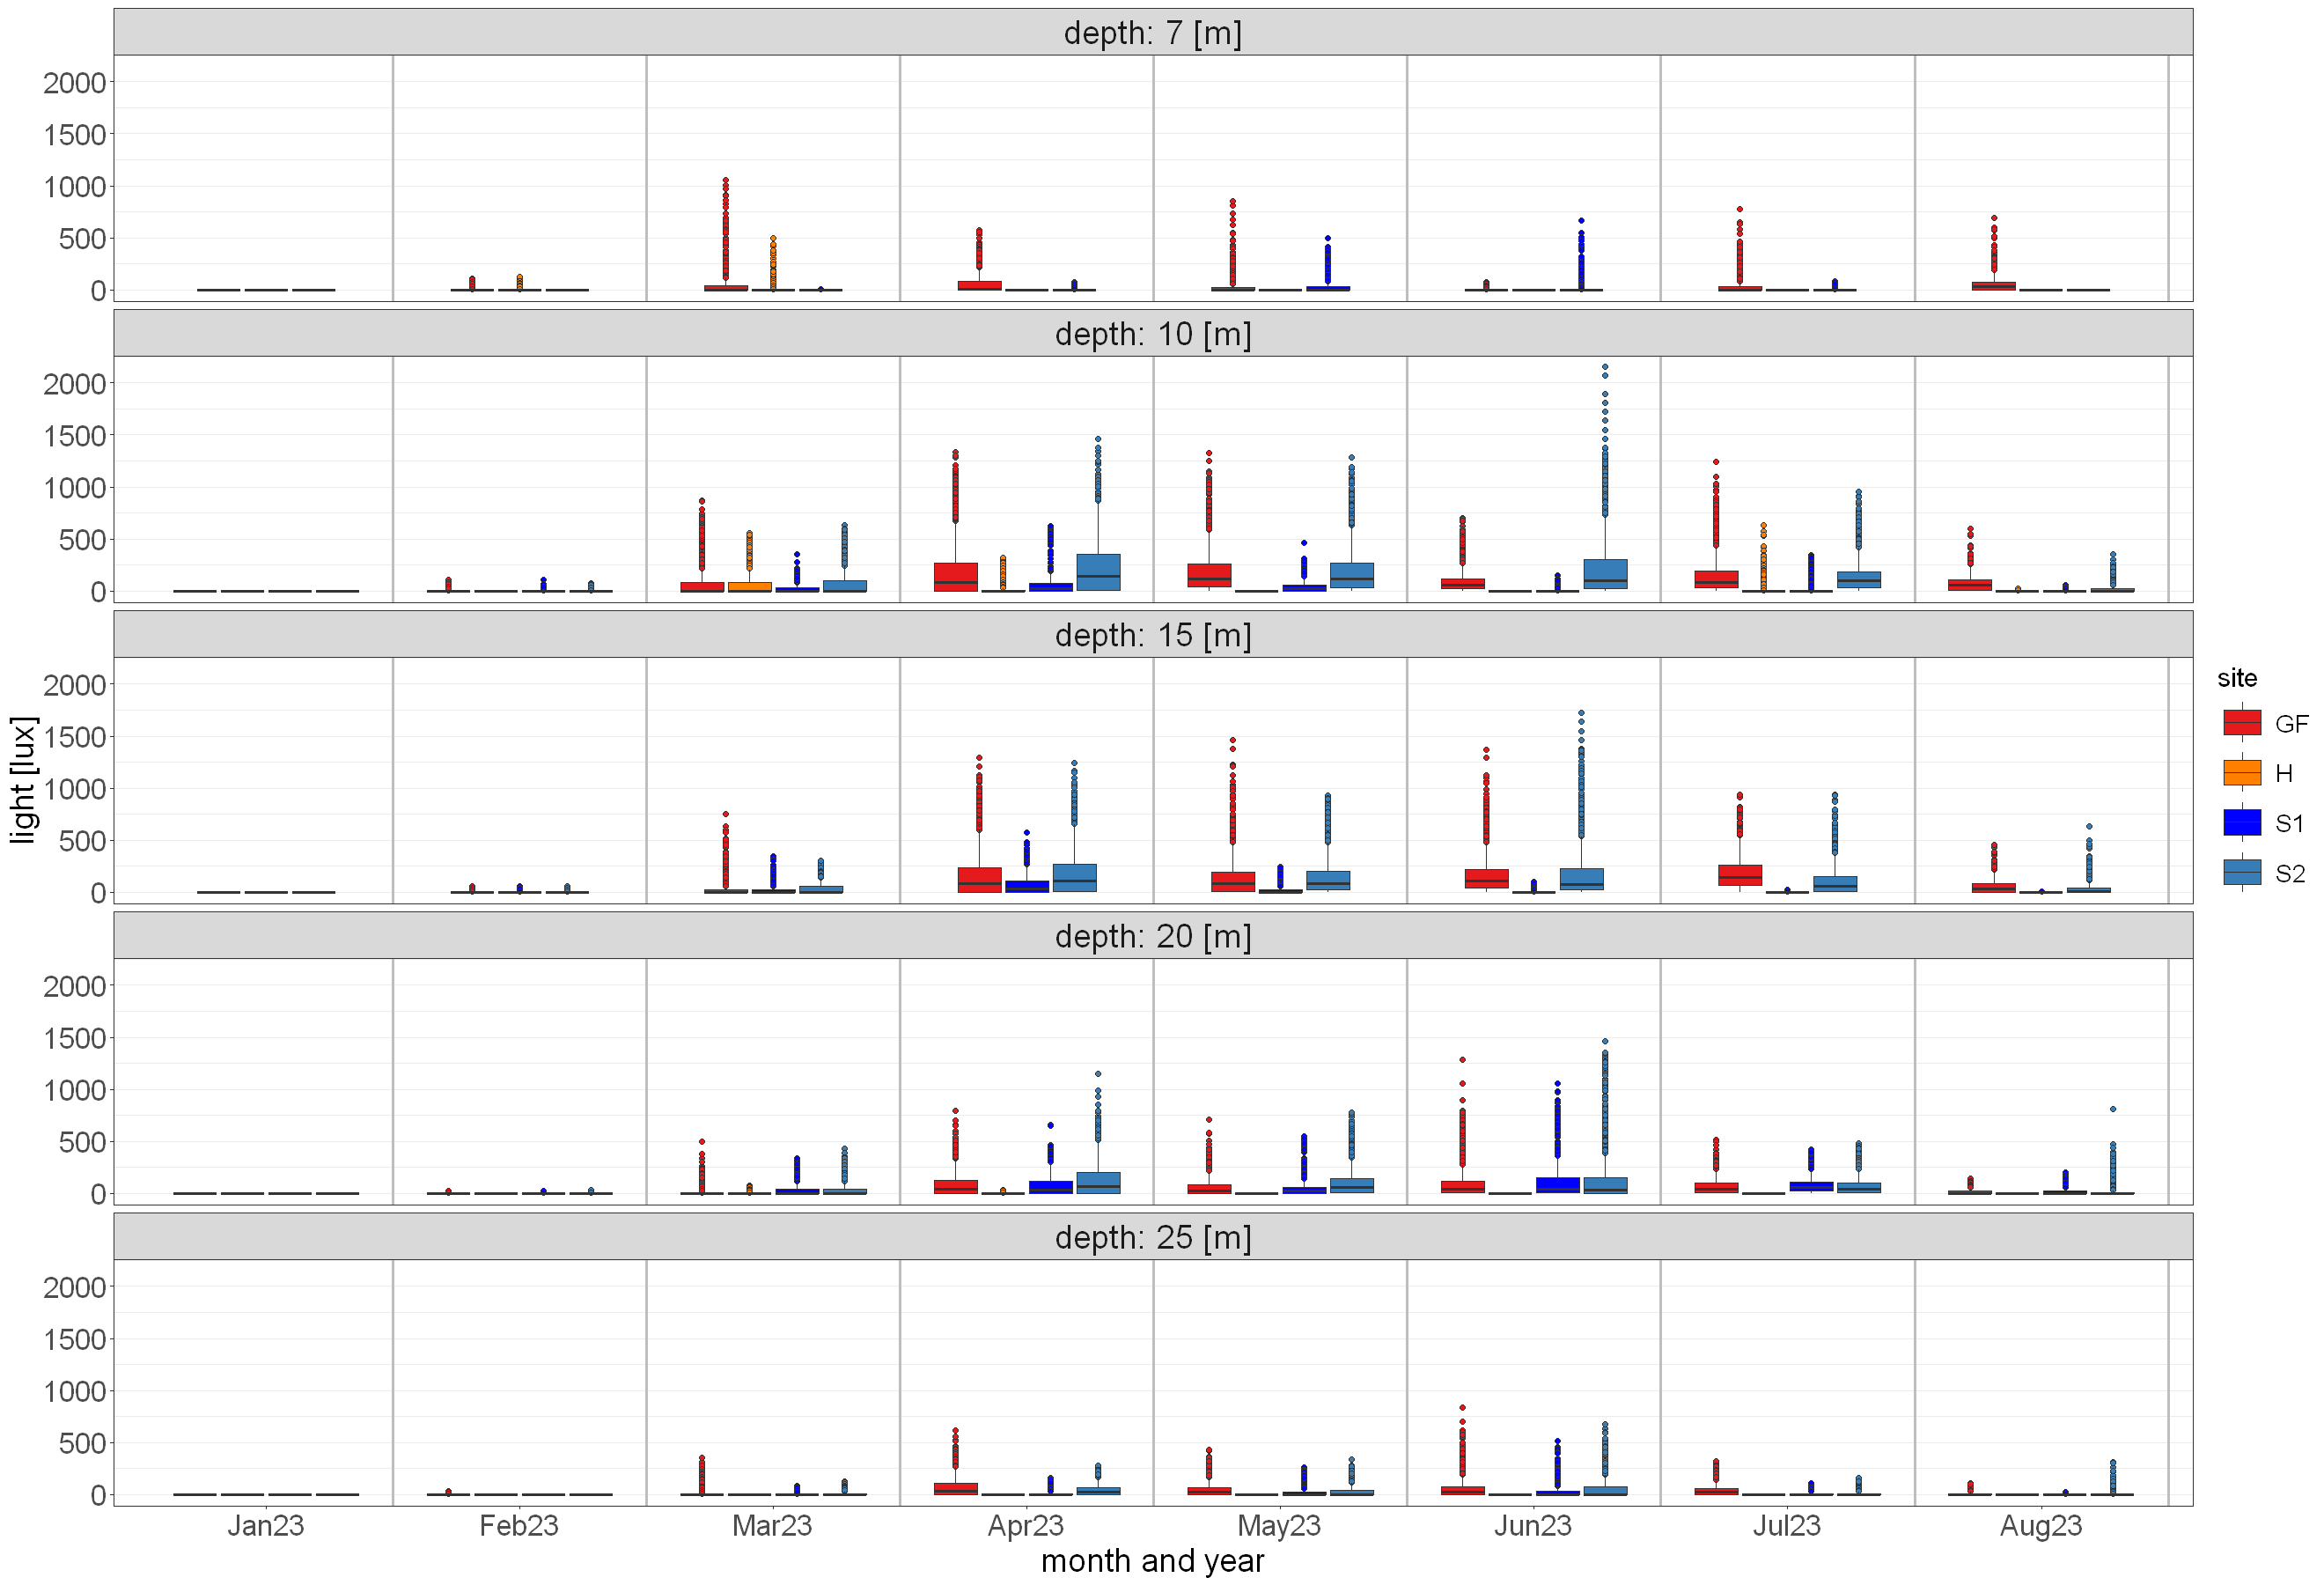

In [34]:
options(repr.plot.height=15,repr.plot.width=22)

tmp.df <- df.chem.merged %>% filter(c1)
tmp.df$m.yr.factor.tmp <- factor(tmp.df$m.yr.factor,levels = lev.c1, ordered = TRUE)
ggplot(tmp.df,
       aes(x=m.yr.factor.tmp,y=get(feat),fill=site)) + geom_boxplot(position = position_dodge2(preserve = "single"),outlier.shape = 21) +            
           scale_fill_manual(values=site.color) +
           facet_wrap(~depth,labeller = label_both,ncol=1) +
# labels set-up
           xlab("month and year") + ylab(feat.label) + scale_x_discrete(drop = FALSE)+
# viz adjustments
           geom_vline(xintercept=seq(1.5, length(levels(tmp.df$w.yr.factor))-0.5, 1),lwd=1, colour="gray") +
           boxplot_theme

if (flag.make.plots) {
    bp.fig <- 1 
    ggsave(paste0(IMG.path,"/boxplots/",feat,"_boxplots",bp.fig,".tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
    ggsave(paste0(IMG.path,"/boxplots/small/",feat,"_boxplots",bp.fig,".jpg"),height = 15, width = 22,dpi = 150)
}

tmp.df <- df.chem.merged %>% filter(c2)
tmp.df$m.yr.factor.tmp <- factor(tmp.df$m.yr.factor,levels = lev.c2, ordered = TRUE)
ggplot(tmp.df ,
       aes(x=m.yr.factor.tmp,y=get(feat),fill=site)) + geom_boxplot(position = position_dodge2(preserve = "single"),outlier.shape = 21) +            
           scale_fill_manual(values=site.color) +
           facet_wrap(~depth,labeller = label_both,ncol=1) + 
# labels set-up
           xlab("month and year") + ylab(feat.label) + scale_x_discrete(drop = FALSE)+
# viz adjustments
           geom_vline(xintercept=seq(1.5, length(levels(tmp.df$w.yr.factor))-0.5, 1),lwd=1, colour="gray") +
           boxplot_theme

if (flag.make.plots) {
     bp.fig <- 2 
     ggsave(paste0(IMG.path,"/boxplots/",feat,"_boxplots",bp.fig,".tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
     ggsave(paste0(IMG.path,"/boxplots/small/",feat,"_boxplots",bp.fig,".jpg"),height = 15, width = 22,dpi = 150)
}

tmp.df <- df.chem.merged %>% filter(c3)
tmp.df$m.yr.factor.tmp <- factor(tmp.df$m.yr.factor,levels = lev.c3, ordered = TRUE)
ggplot(tmp.df,
       aes(x=m.yr.factor.tmp,y=get(feat),fill=site)) + geom_boxplot(position = position_dodge2(preserve = "single"),outlier.shape = 21) +            
           scale_fill_manual(values=site.color) +
           facet_wrap(~depth,labeller = label_both,ncol=1) + 
# labels set-up
           xlab("month and year") + ylab(feat.label) + scale_x_discrete(drop = FALSE)+
# viz adjustments
           geom_vline(xintercept=seq(1.5, length(levels(tmp.df$w.yr.factor))-0.5, 1),lwd=1, colour="gray") +
           boxplot_theme

if (flag.make.plots) {
     bp.fig <- 3 
     ggsave(paste0(IMG.path,"/boxplots/",feat,"_boxplots",bp.fig,".tiff"),height = 15, width = 22,dpi = dpi.opt,compression = "lzw")
     ggsave(paste0(IMG.path,"/boxplots/small/",feat,"_boxplots",bp.fig,".jpg"),height = 15, width = 22,dpi = 150)
}